In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Statistical Methods/spambase.data', sep=',', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [3]:
columns = ["word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
           "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
           "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
           "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
           "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
           "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
           "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
           "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
           "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
           "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
           "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
           "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_hash", "capital_run_length_average",
           "capital_run_length_longest", "capital_run_length_total", "spam"]

In [4]:
df.columns = columns
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_hash,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
df['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

In [6]:
print(df.describe())

       word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
count     4601.000000        4601.000000    4601.000000   4601.000000   
mean         0.104553           0.213015       0.280656      0.065425   
std          0.305358           1.290575       0.504143      1.395151   
min          0.000000           0.000000       0.000000      0.000000   
25%          0.000000           0.000000       0.000000      0.000000   
50%          0.000000           0.000000       0.000000      0.000000   
75%          0.000000           0.000000       0.420000      0.000000   
max          4.540000          14.280000       5.100000     42.810000   

       word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
count    4601.000000     4601.000000       4601.000000         4601.000000   
mean        0.312223        0.095901          0.114208            0.105295   
std         0.672513        0.273824          0.391441            0.401071   
min         0.000000        0.

In [7]:
print("null values:")
df.isna().sum()

null values:


word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

<ipython-input-8-631bde98fe4b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))


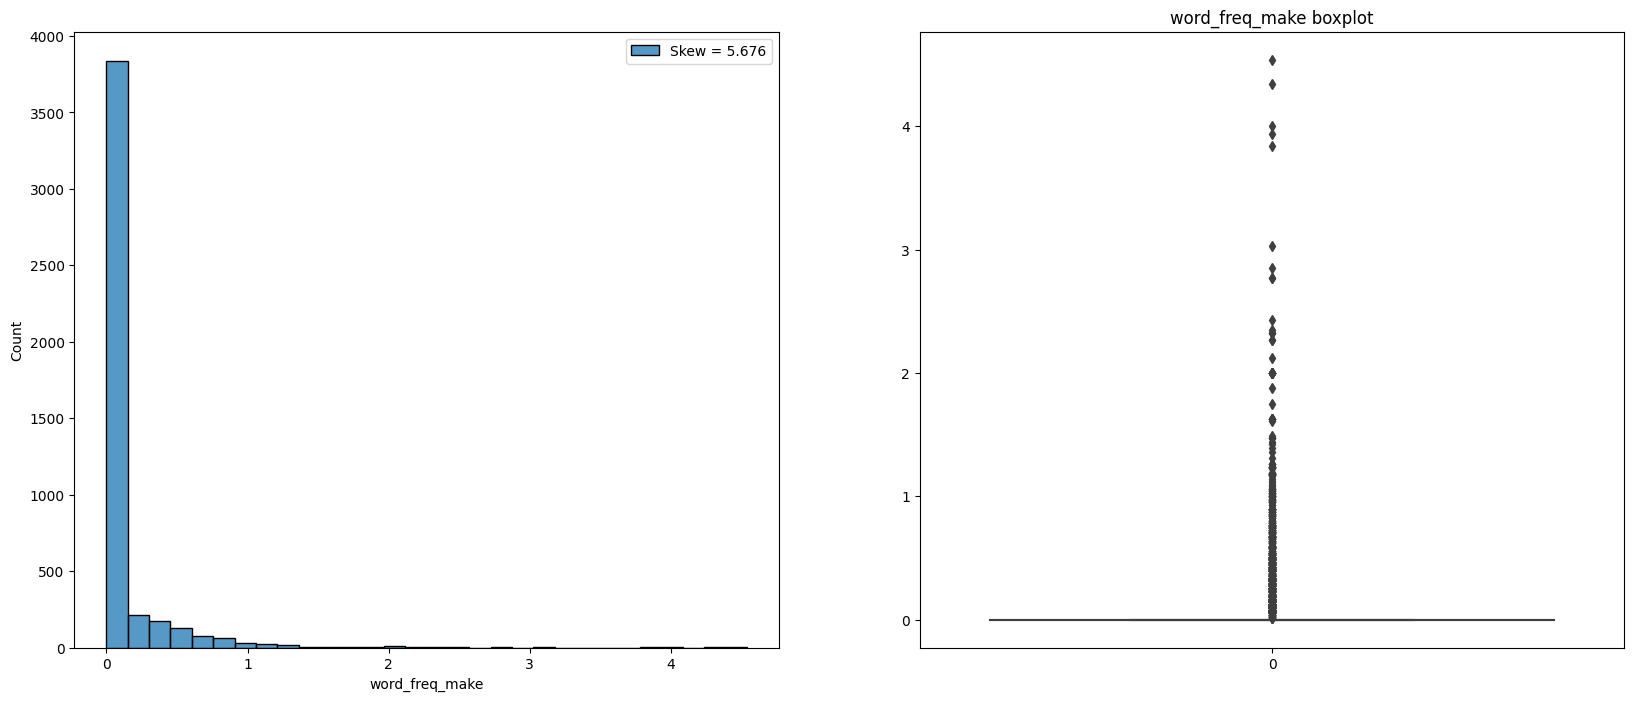

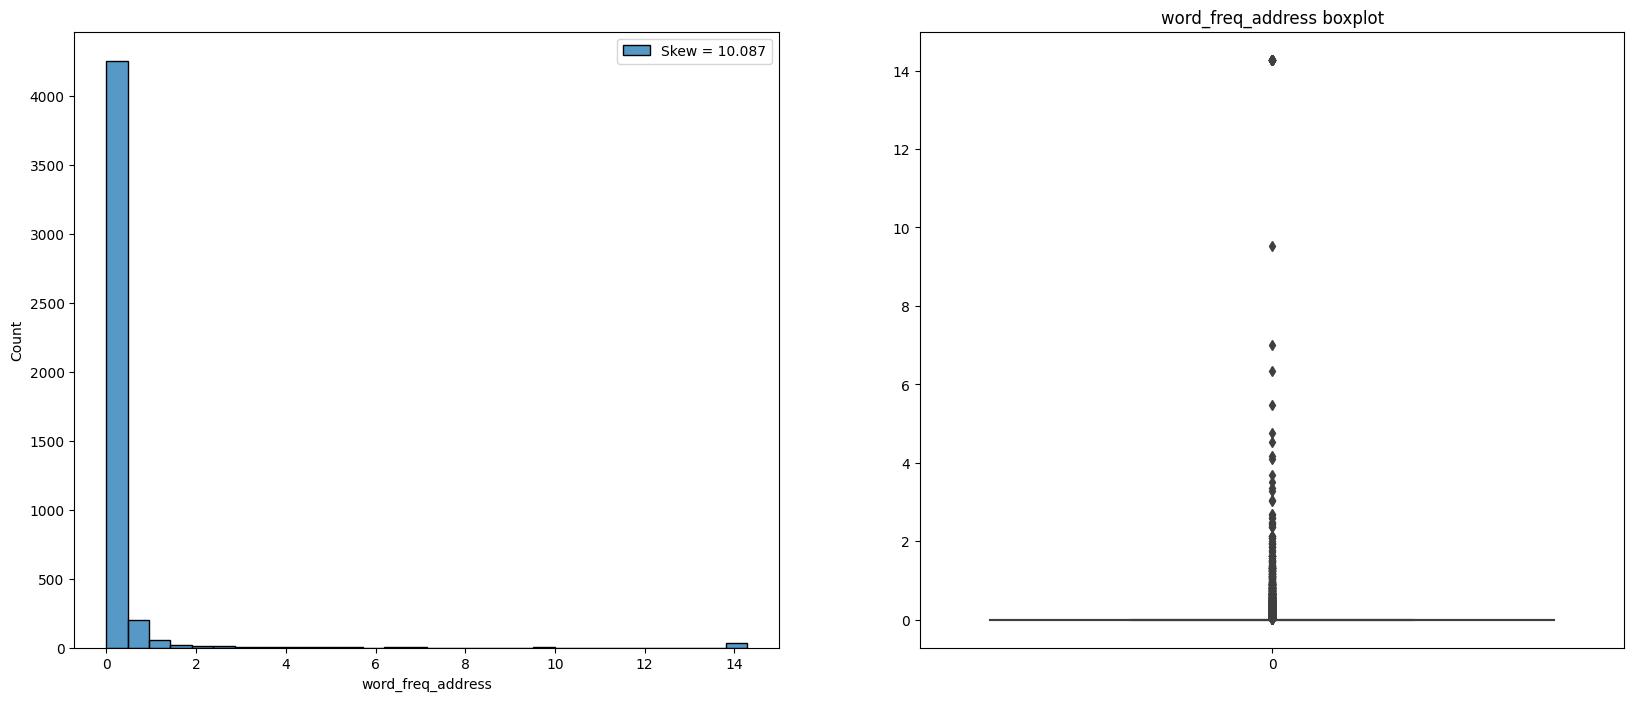

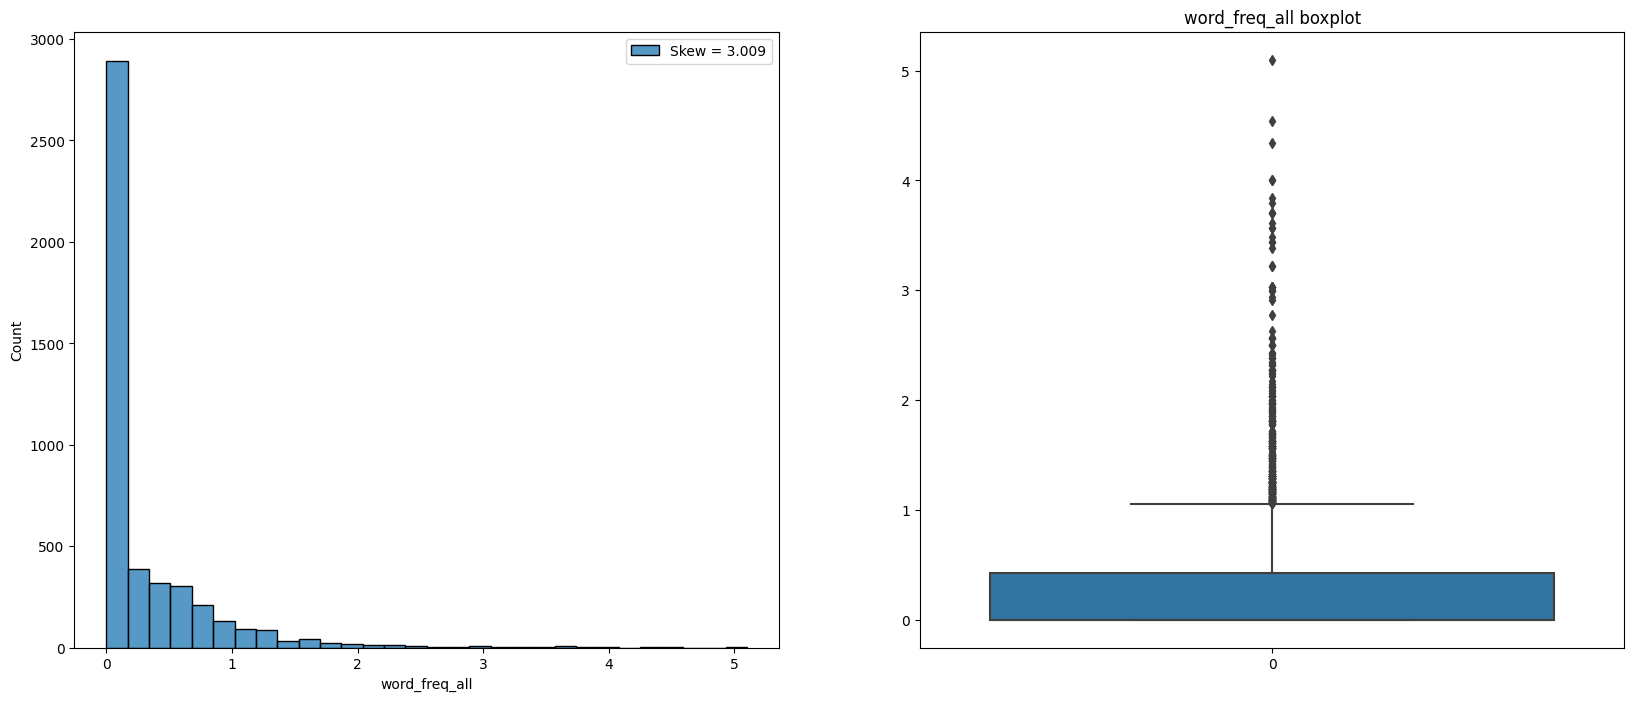

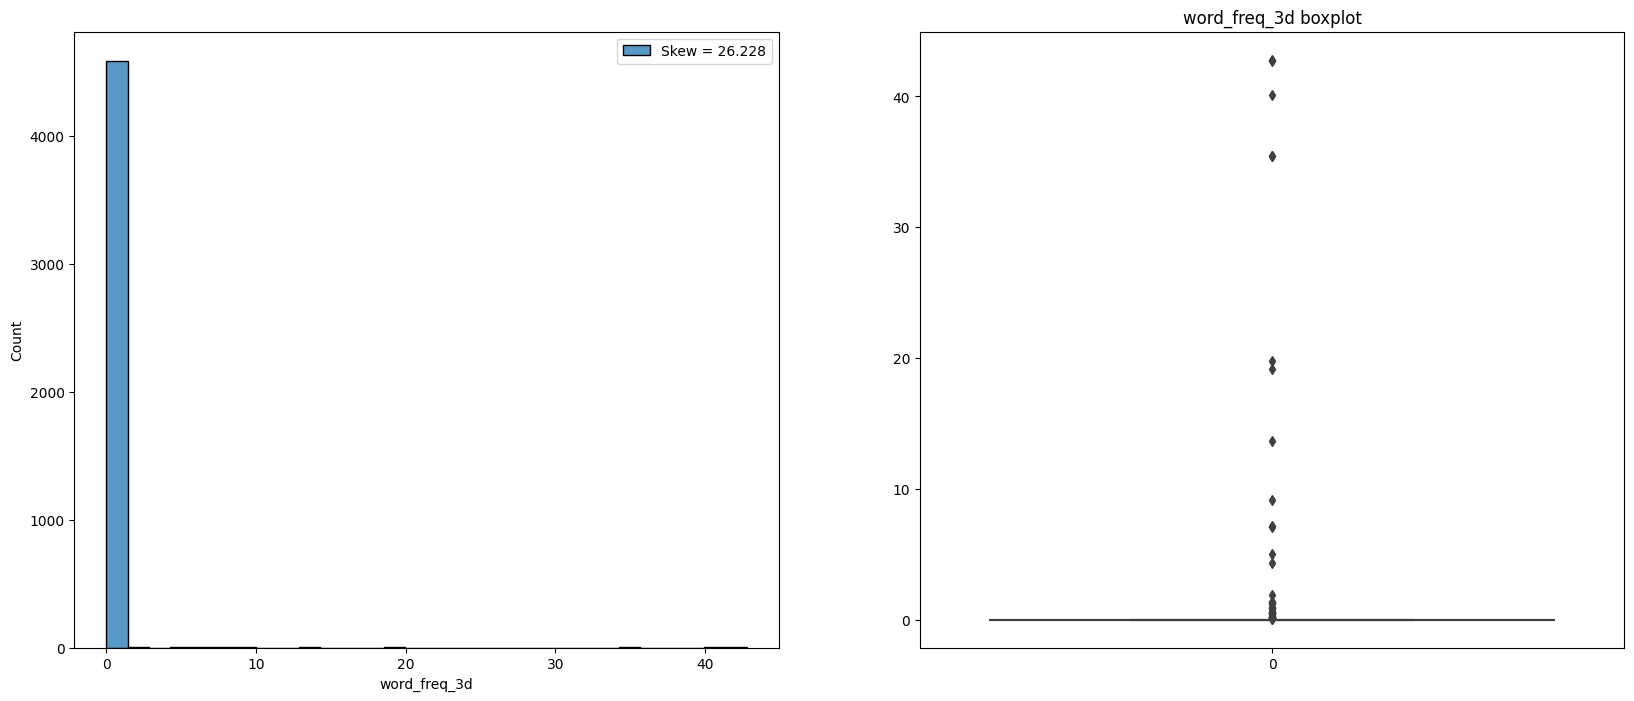

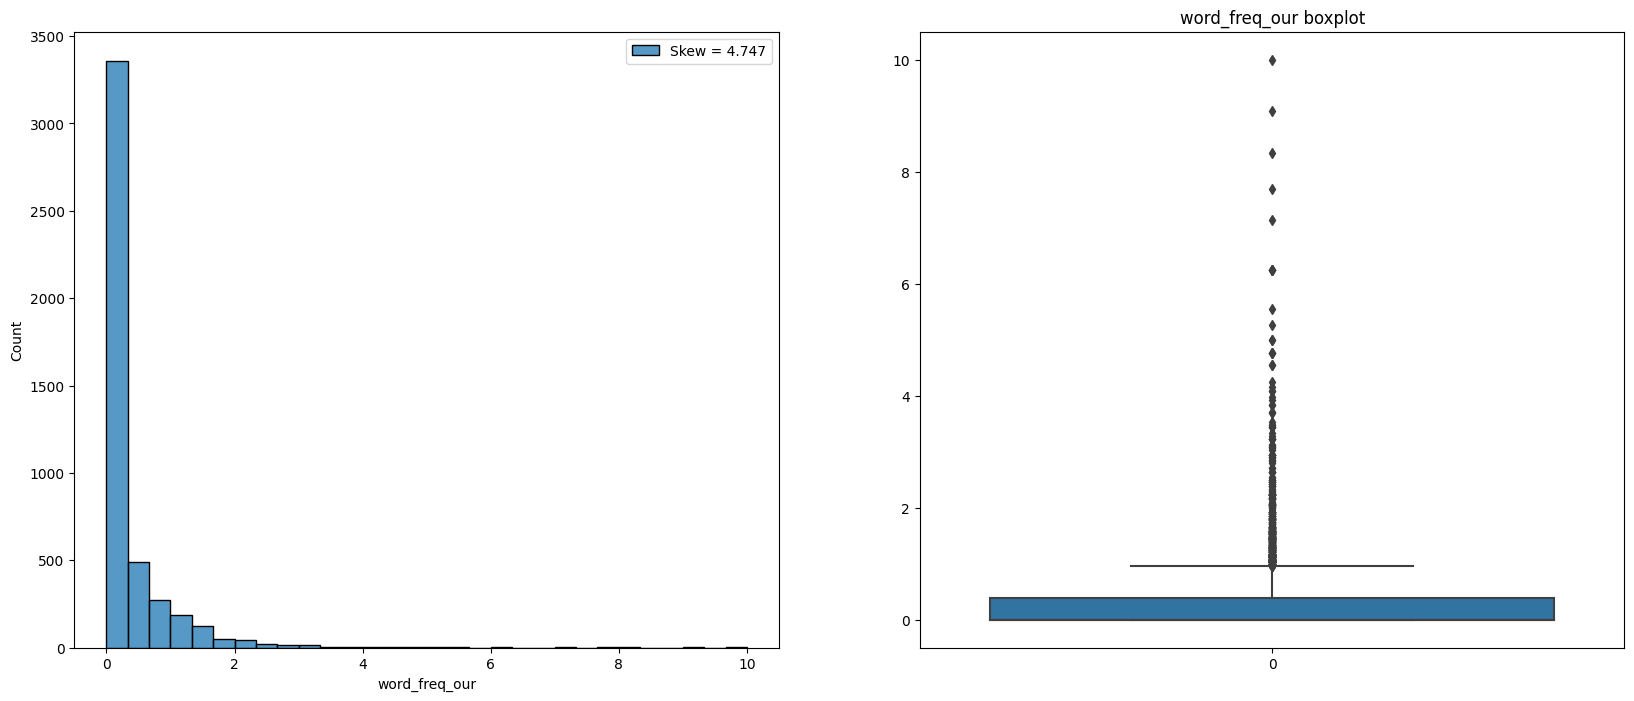

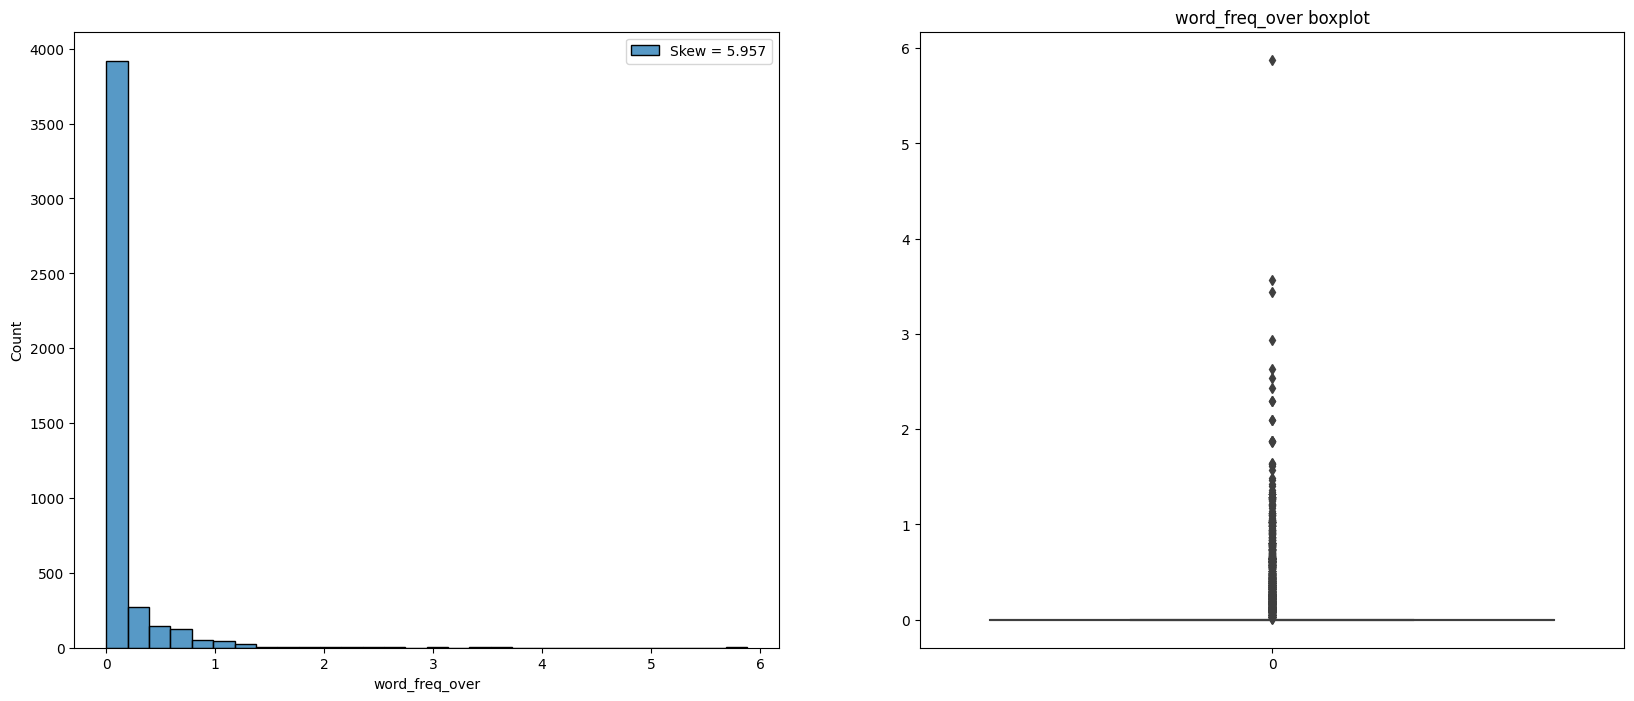

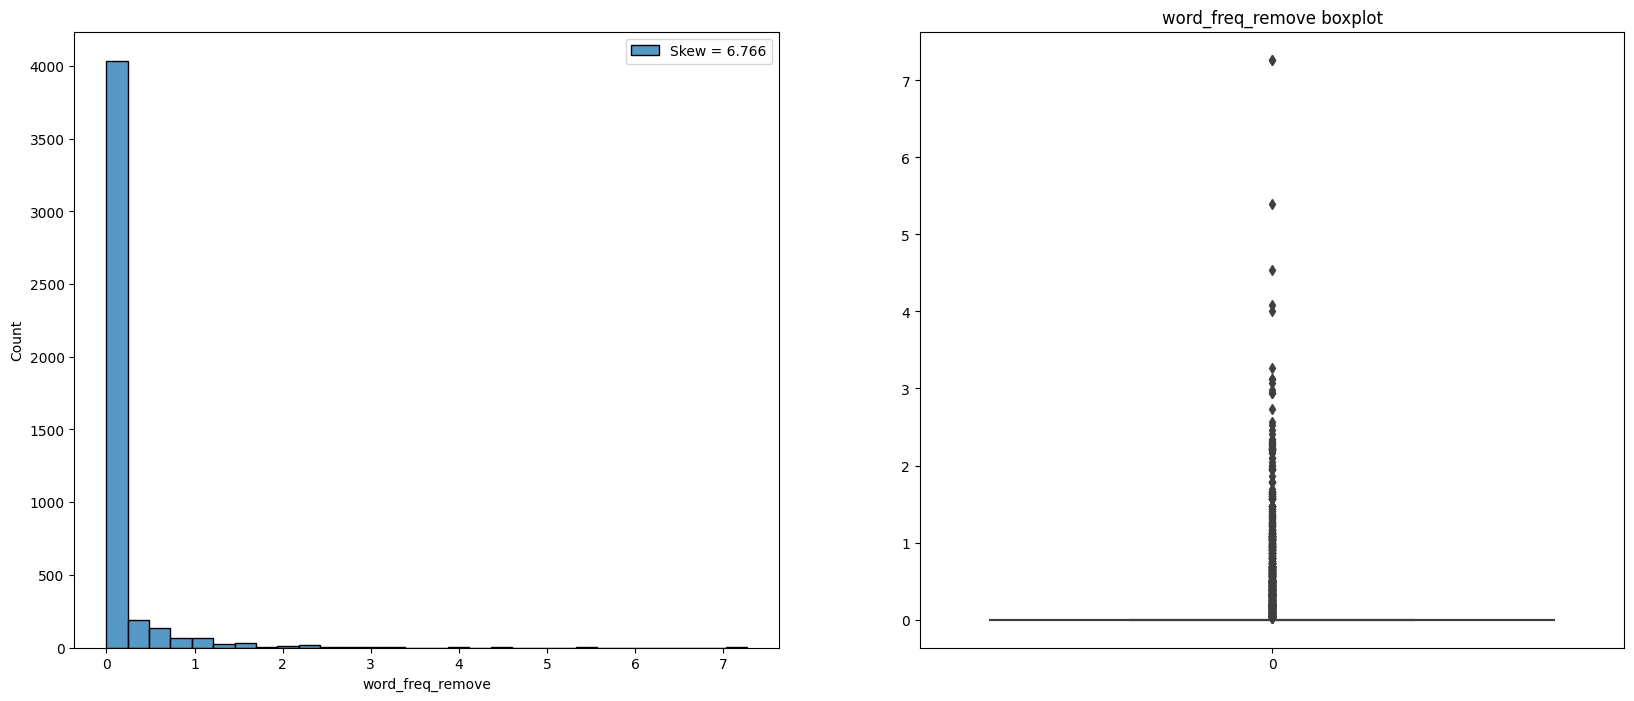

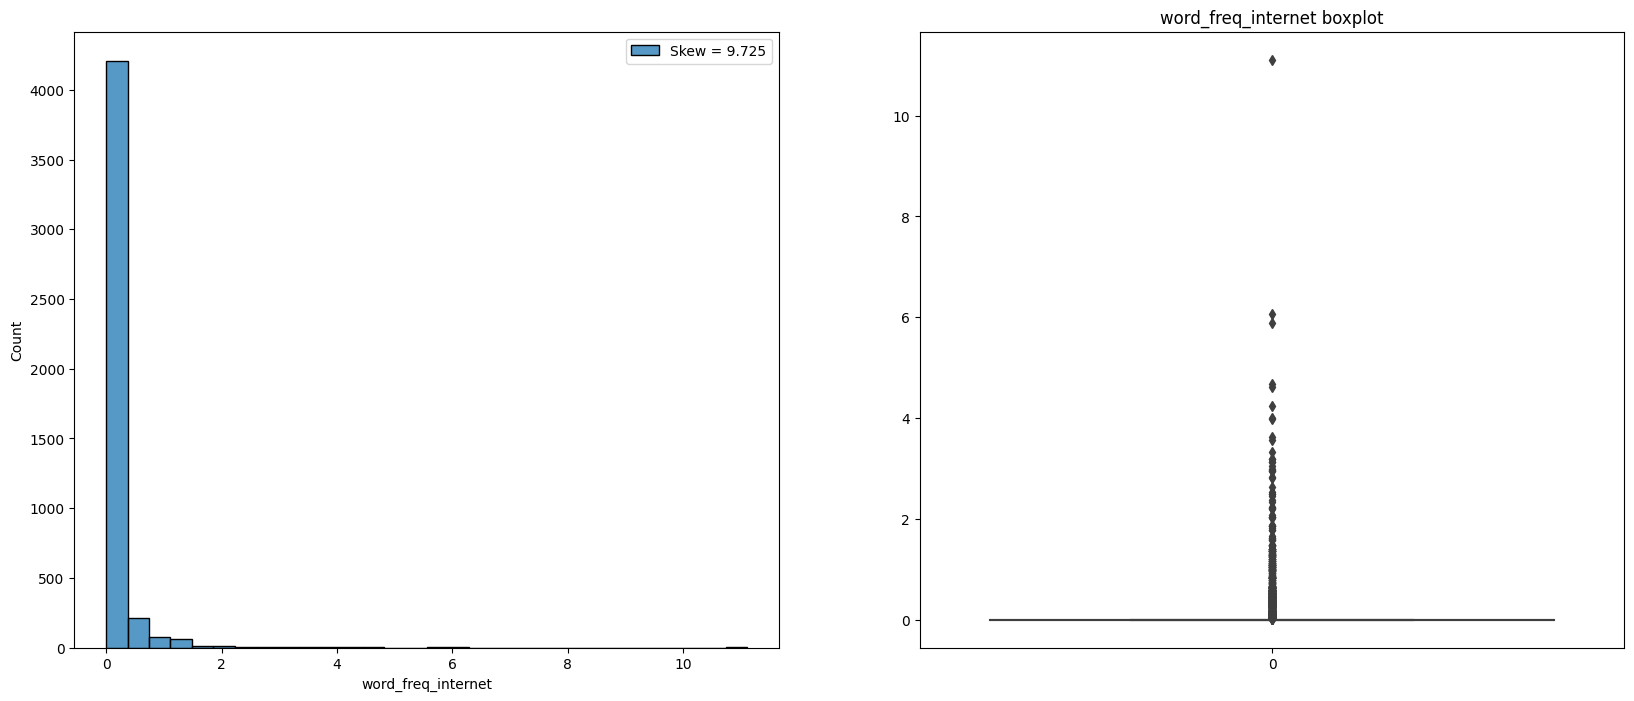

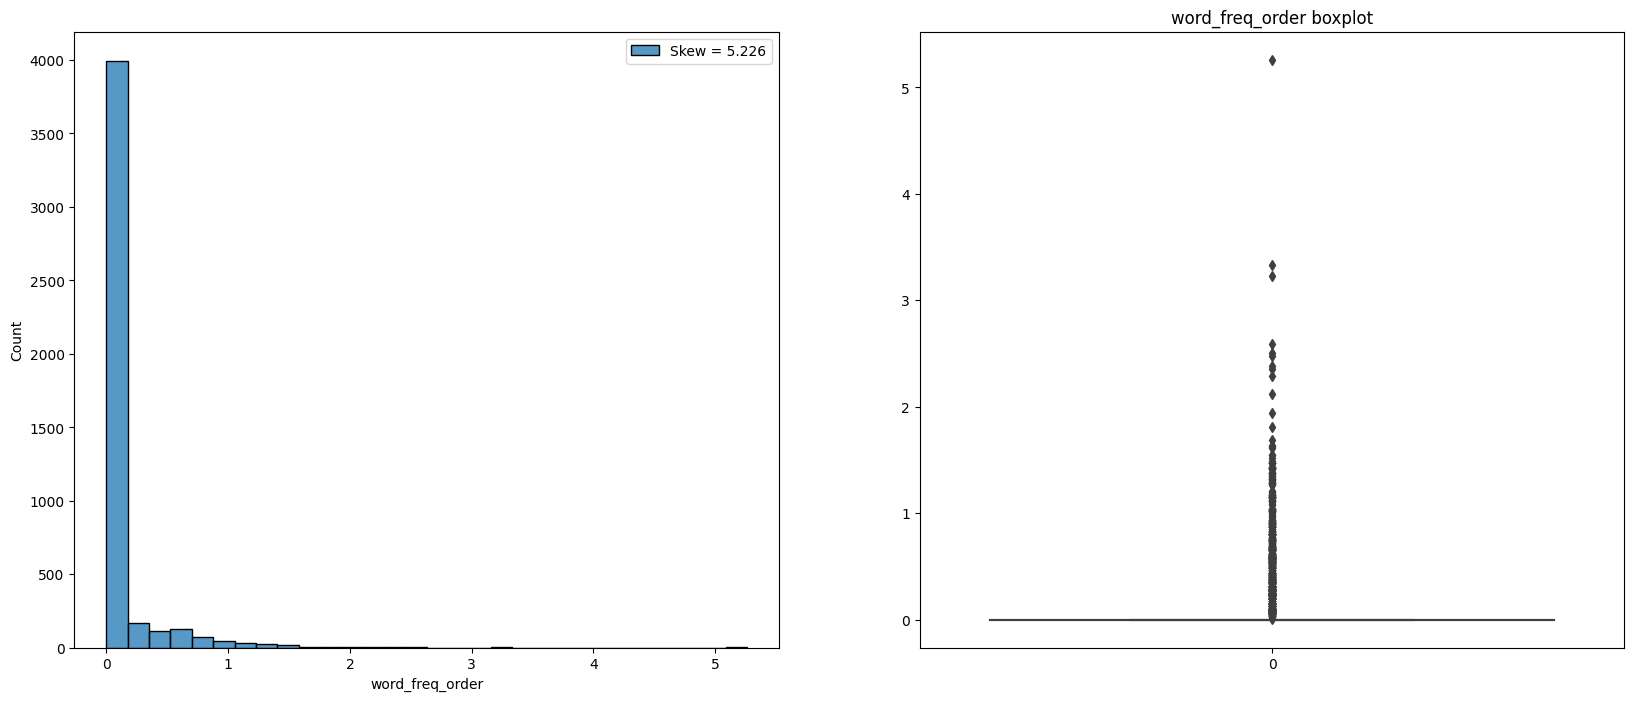

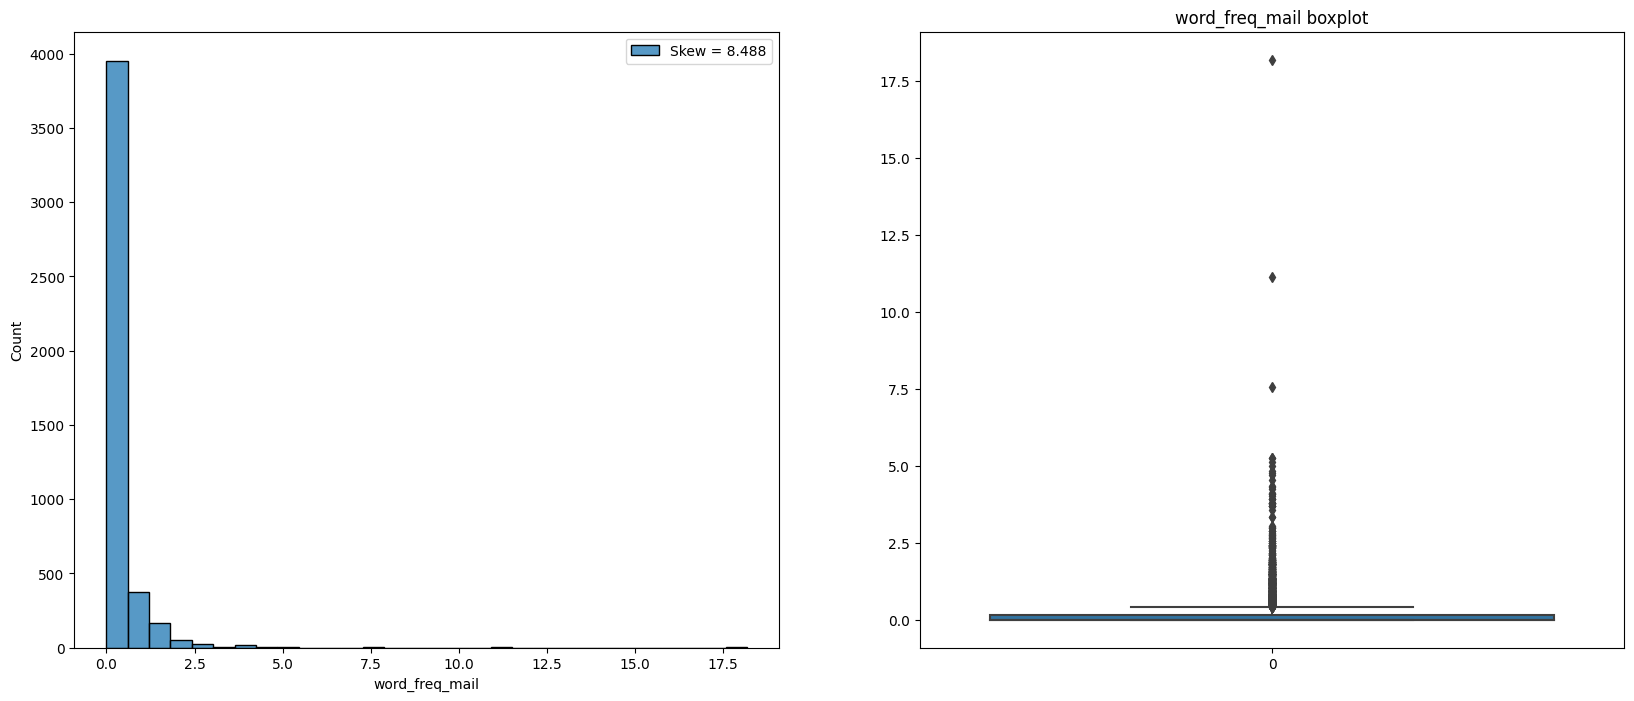

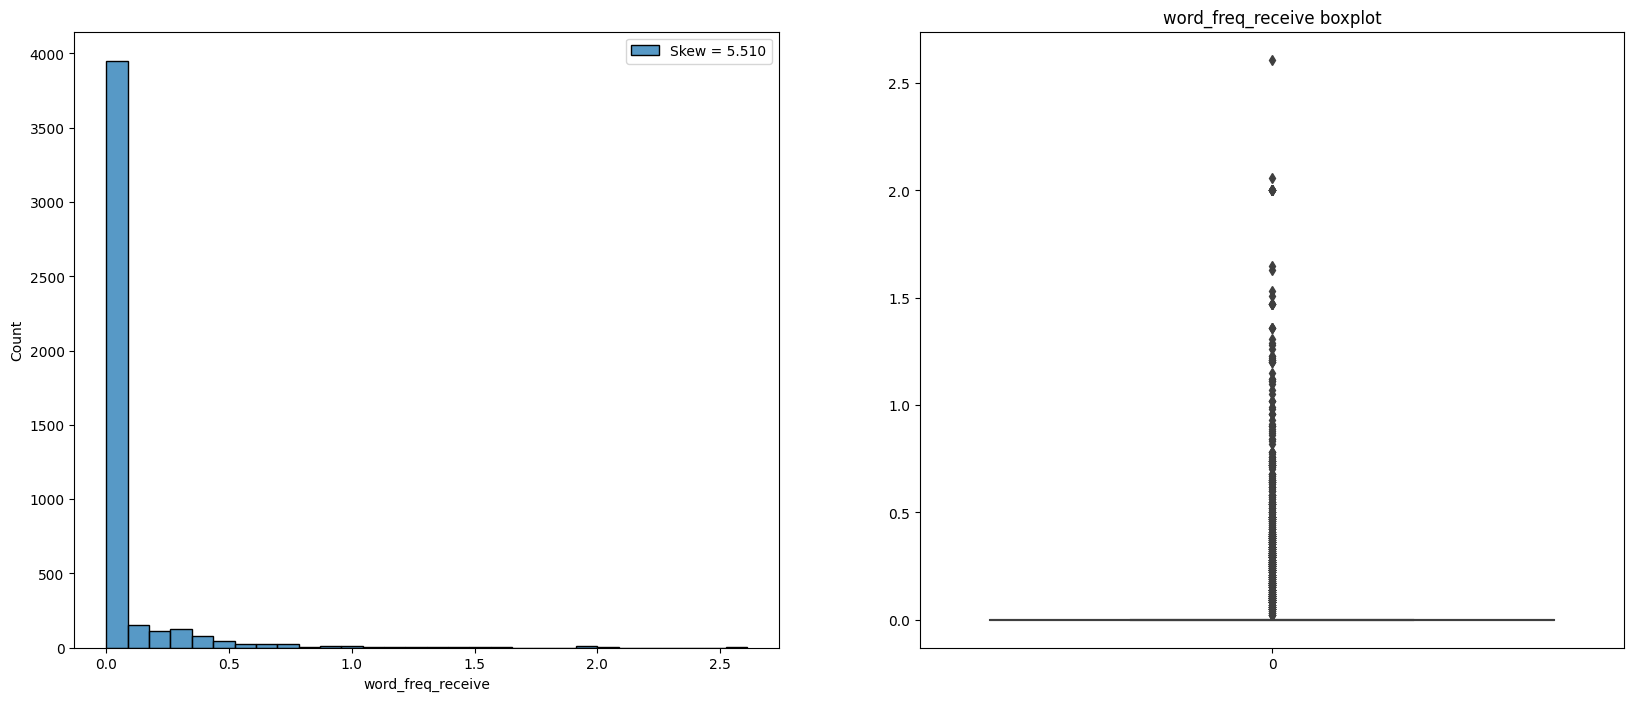

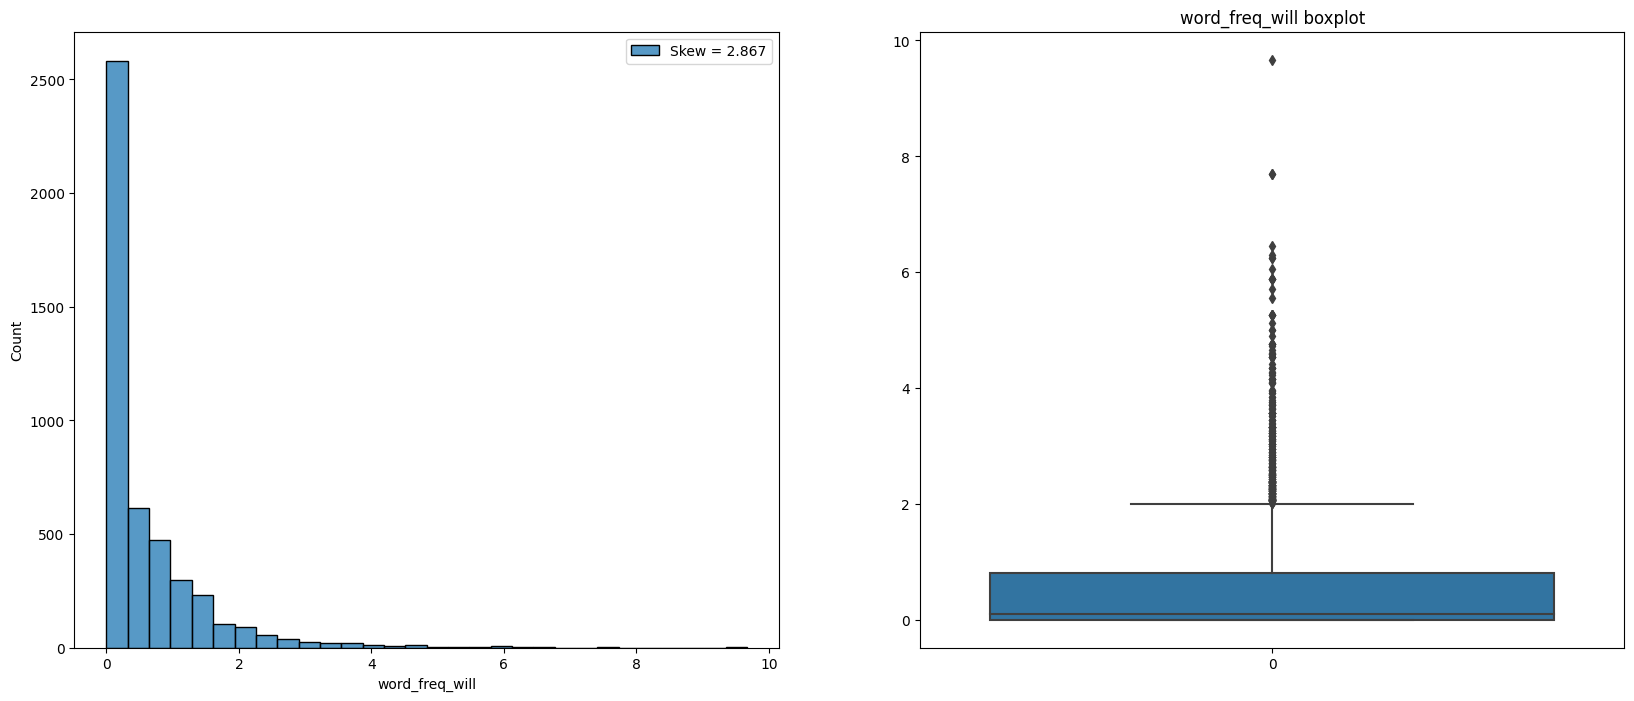

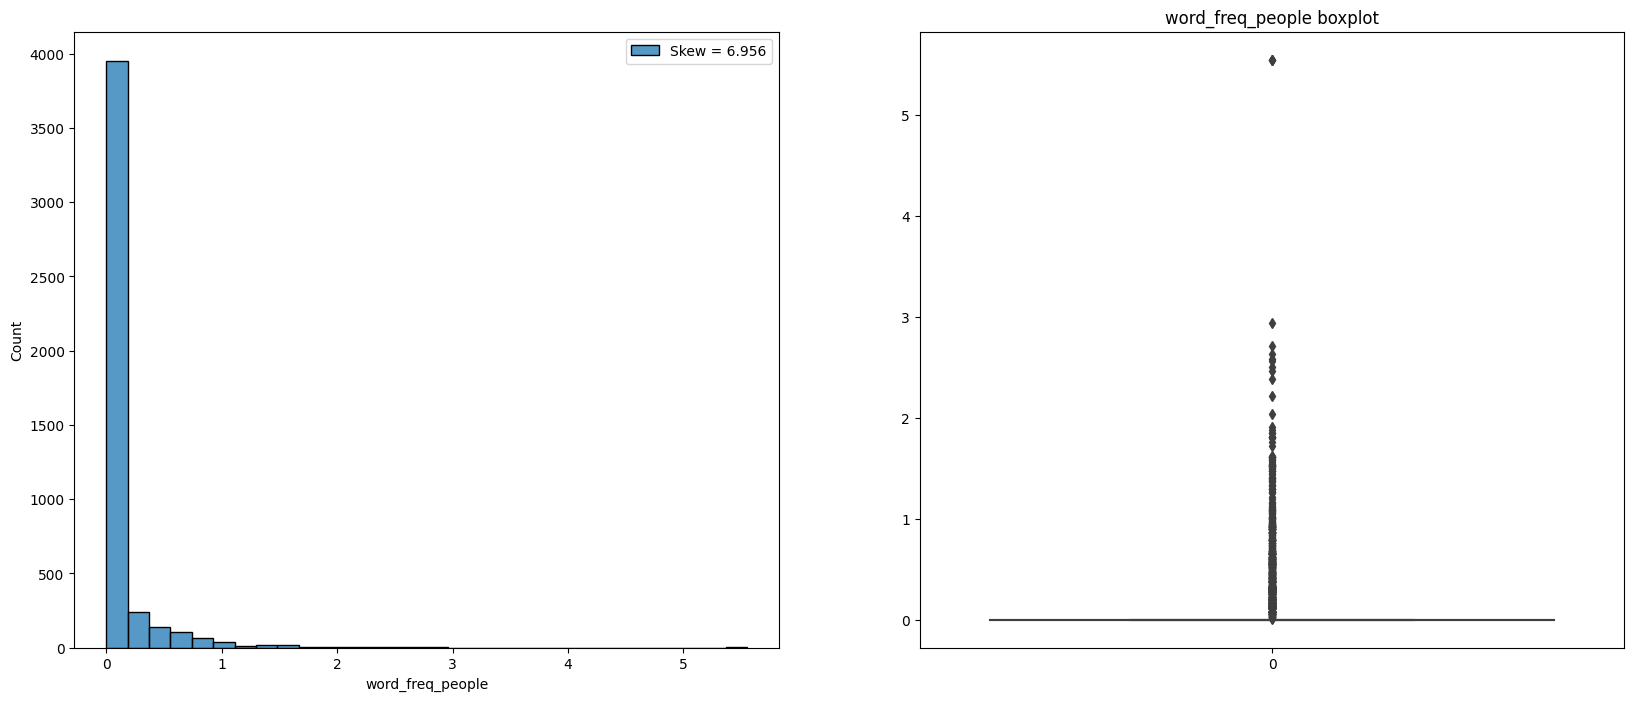

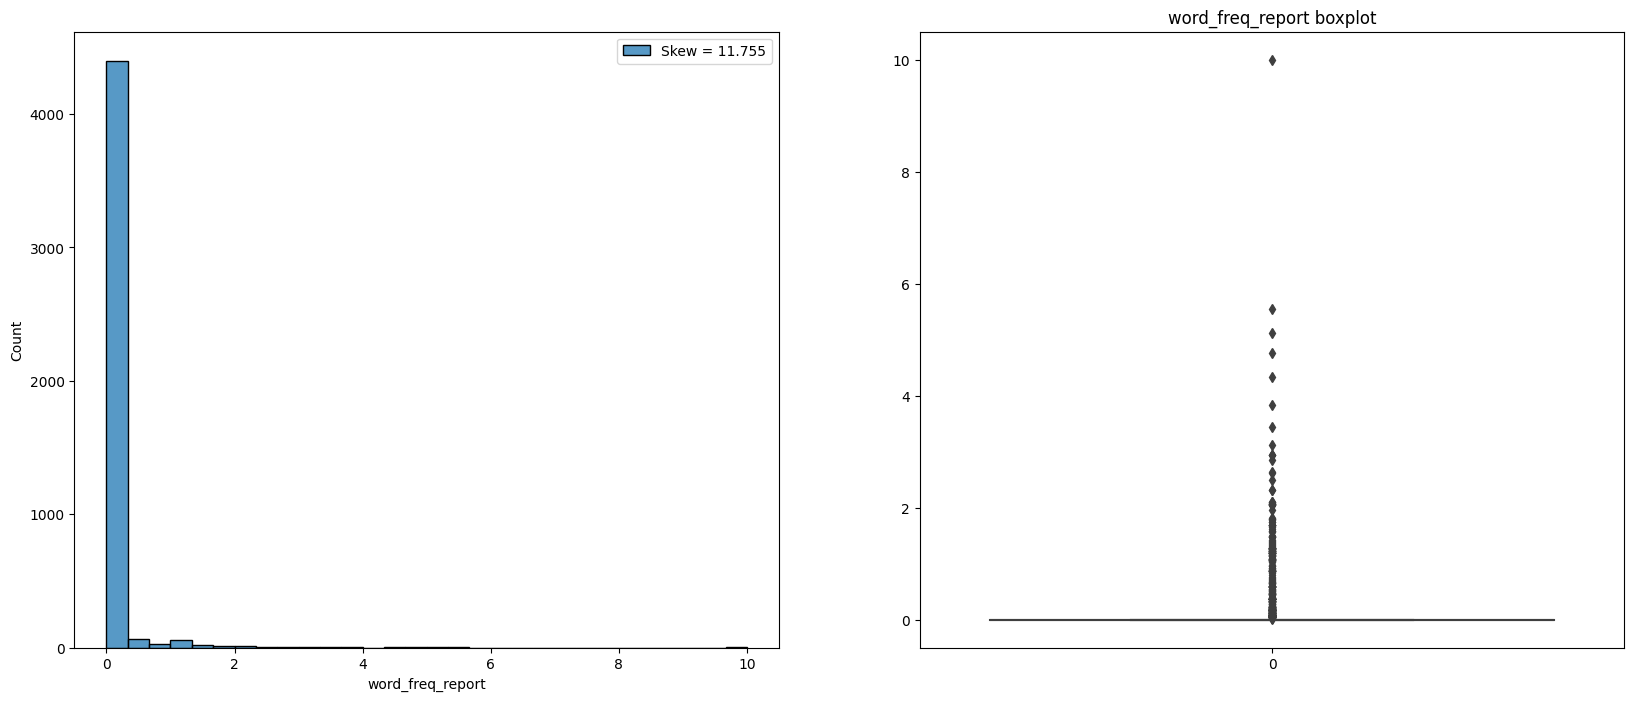

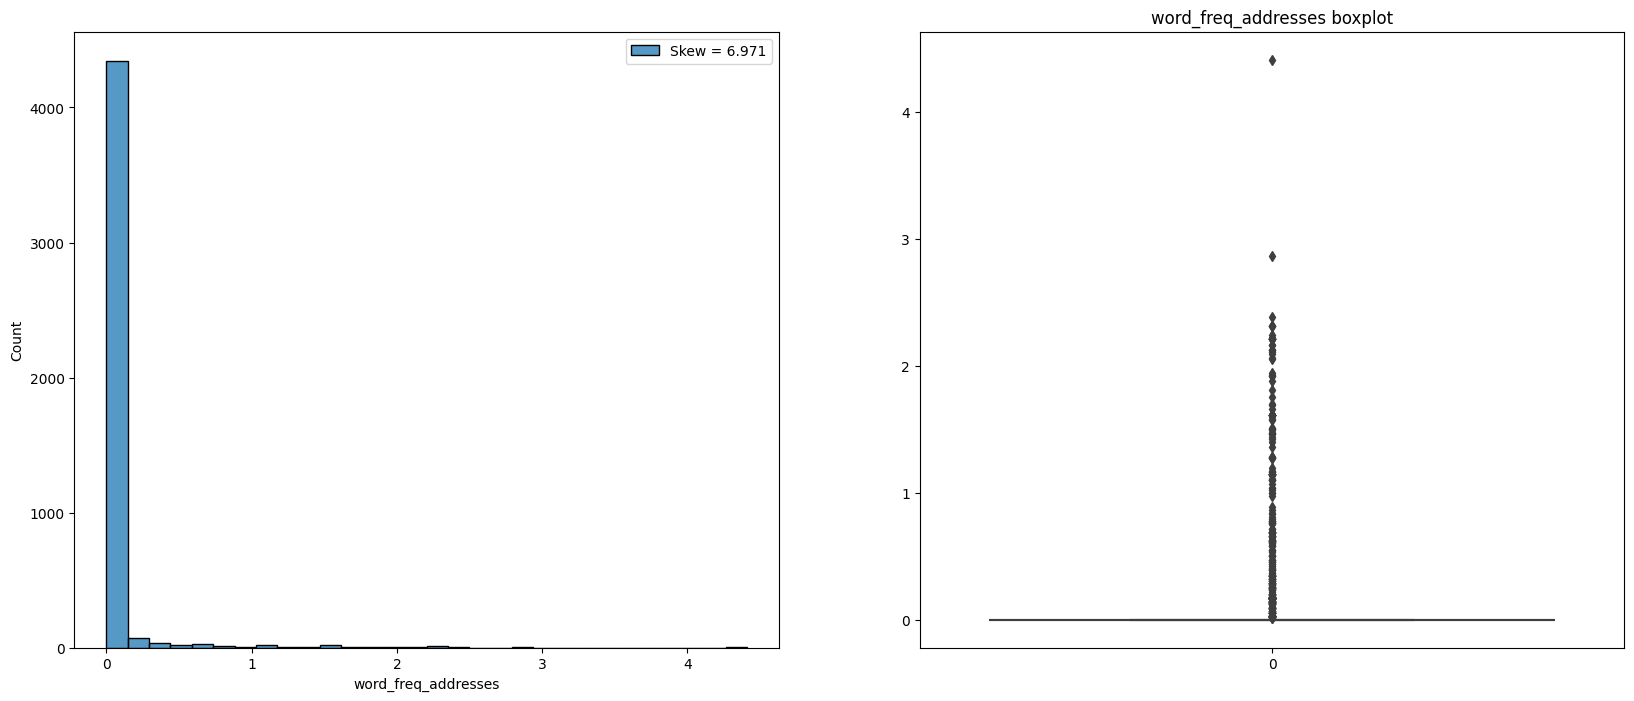

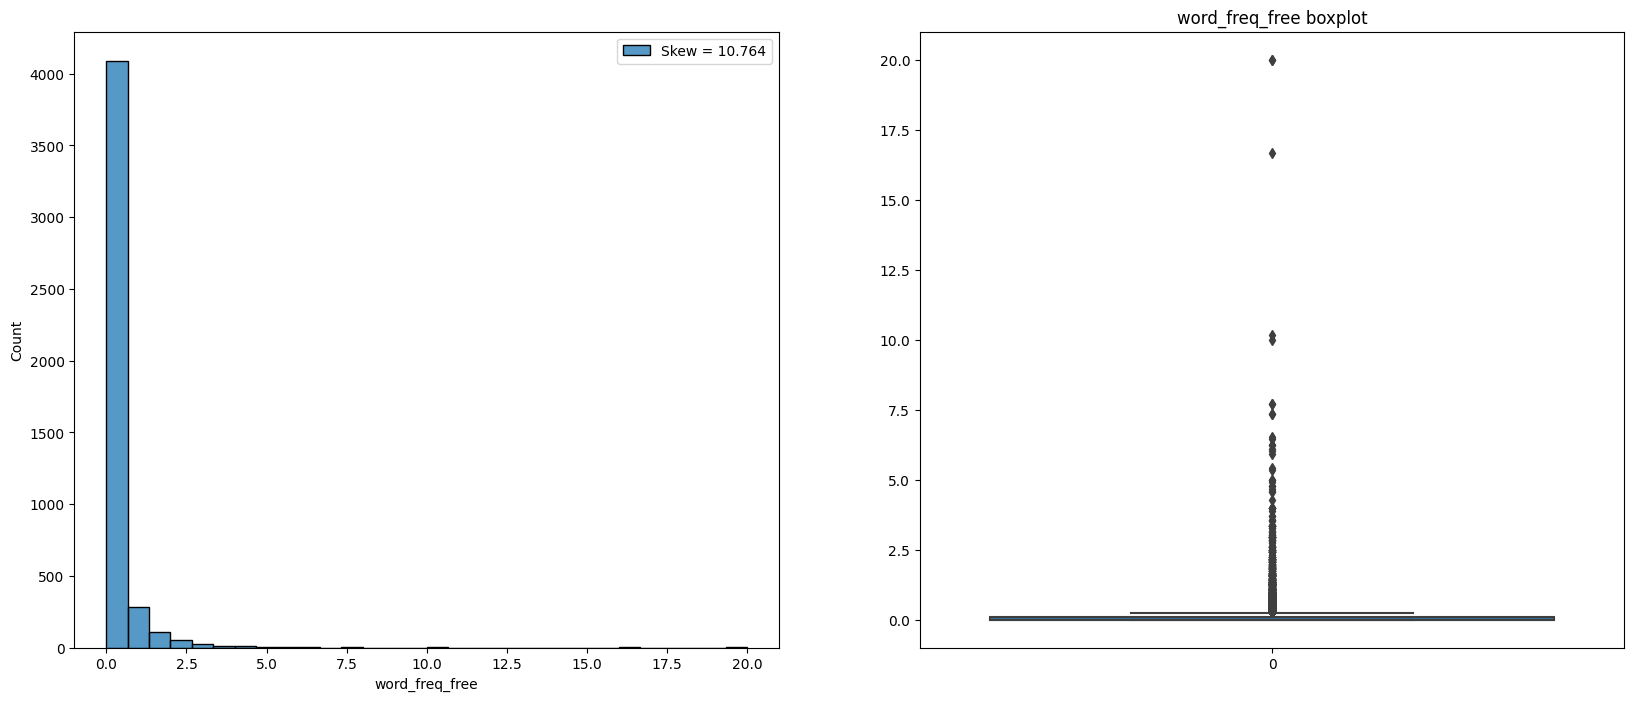

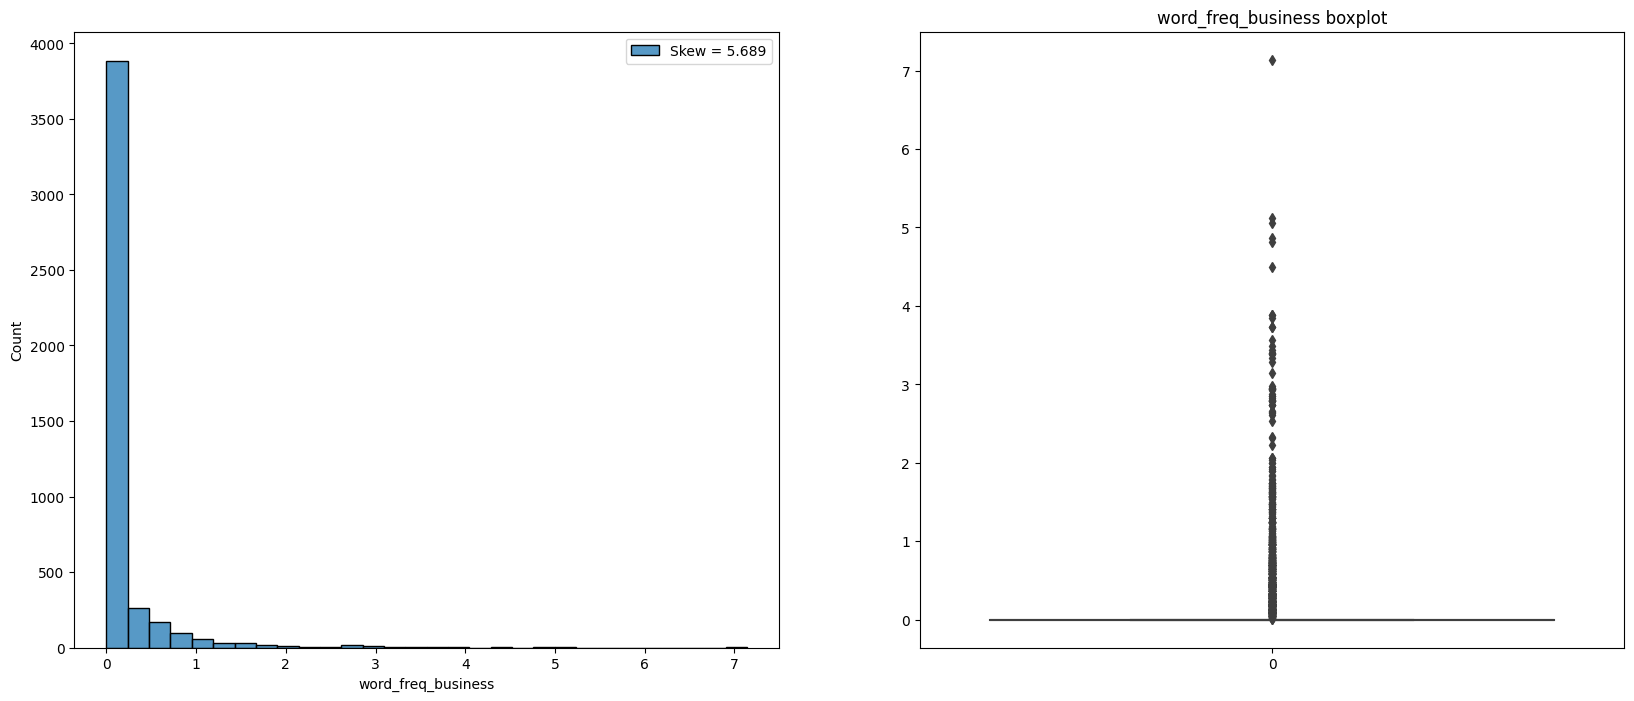

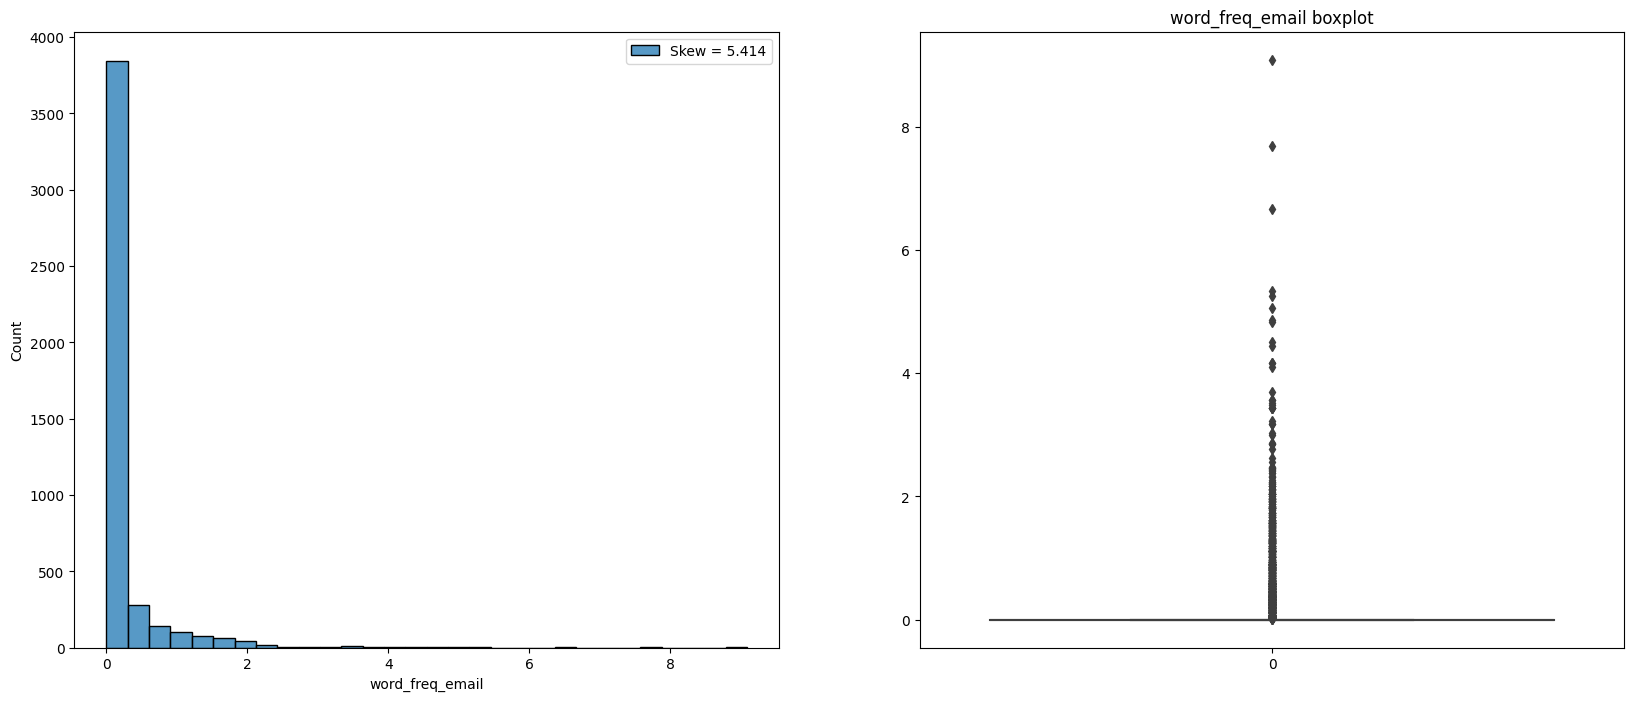

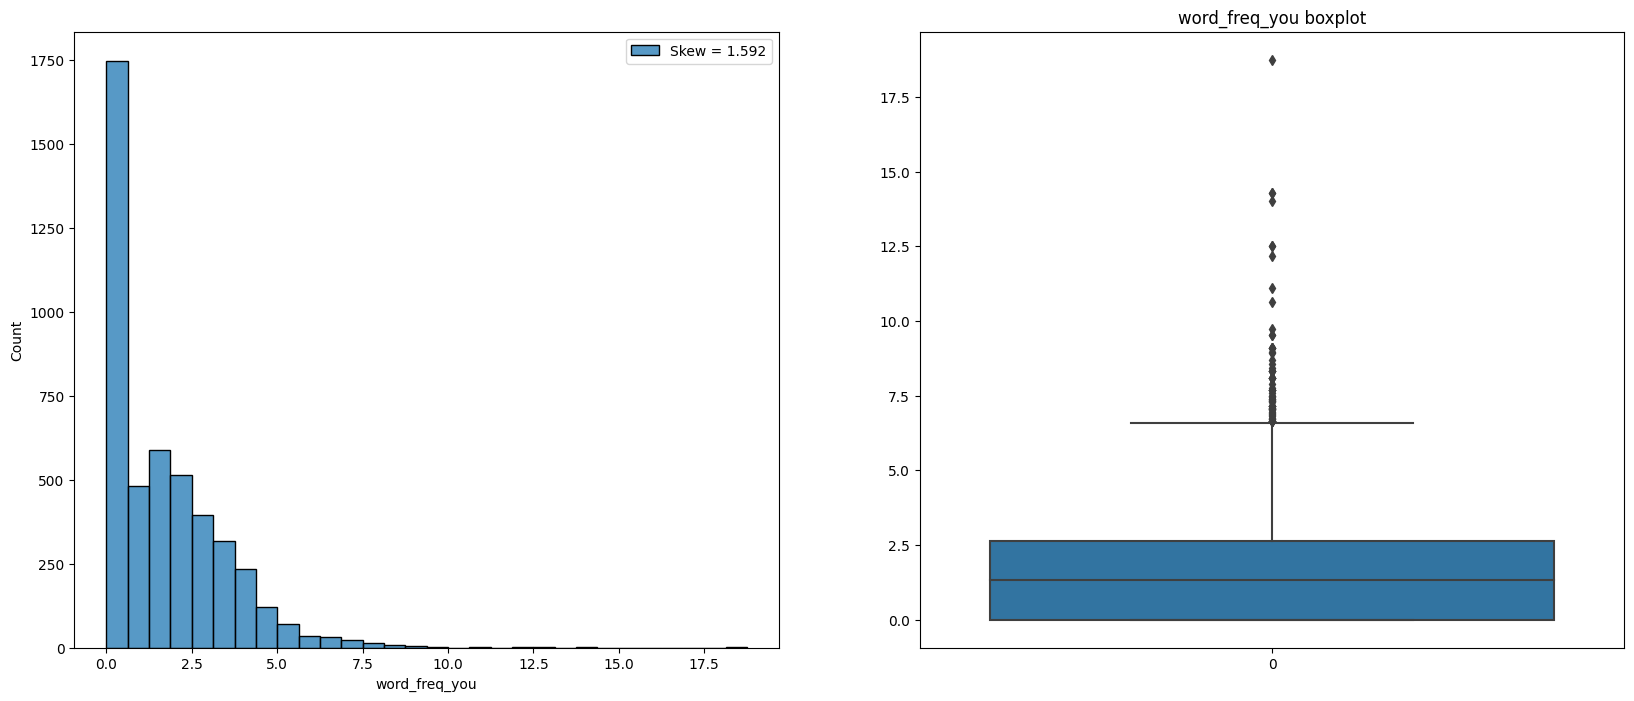

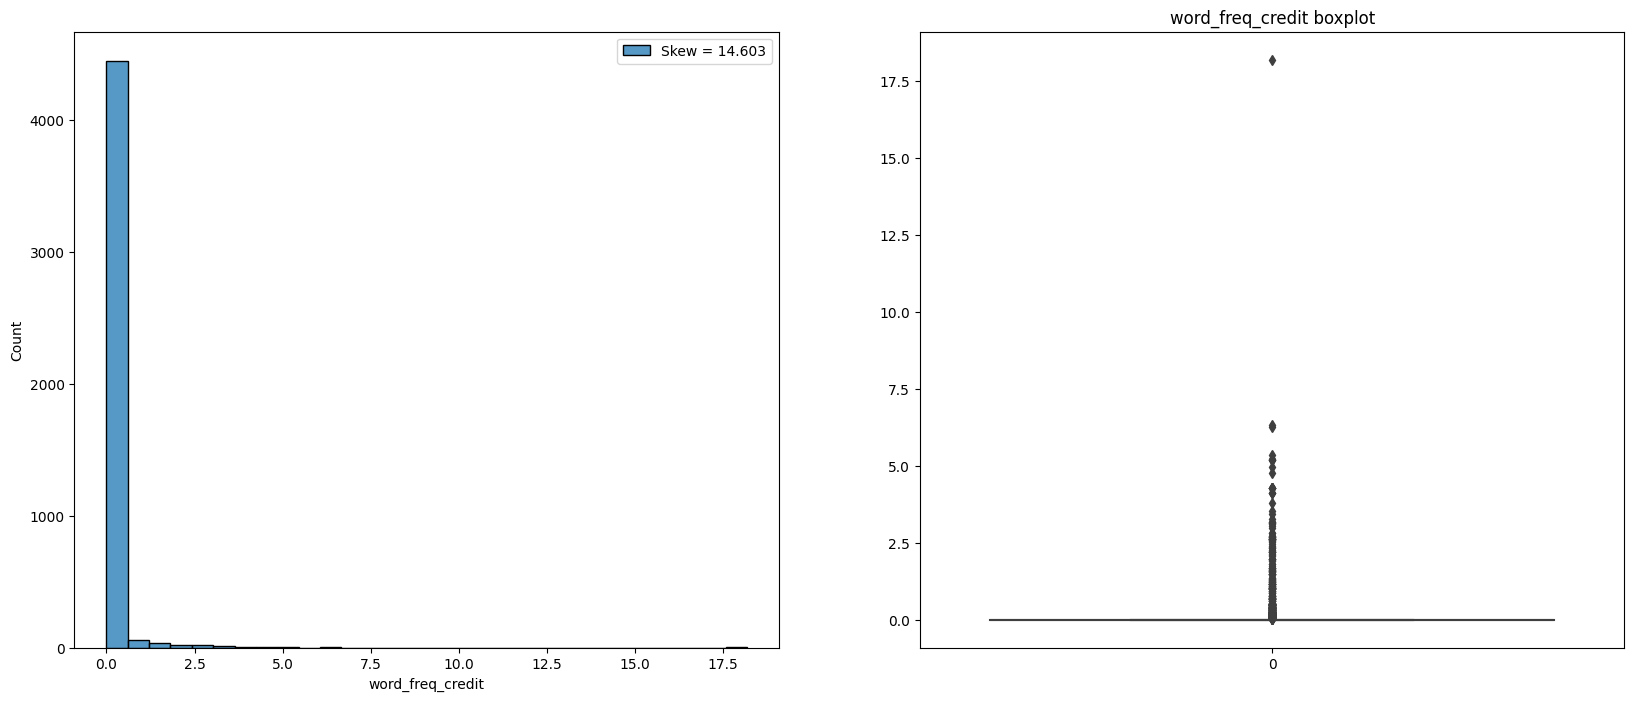

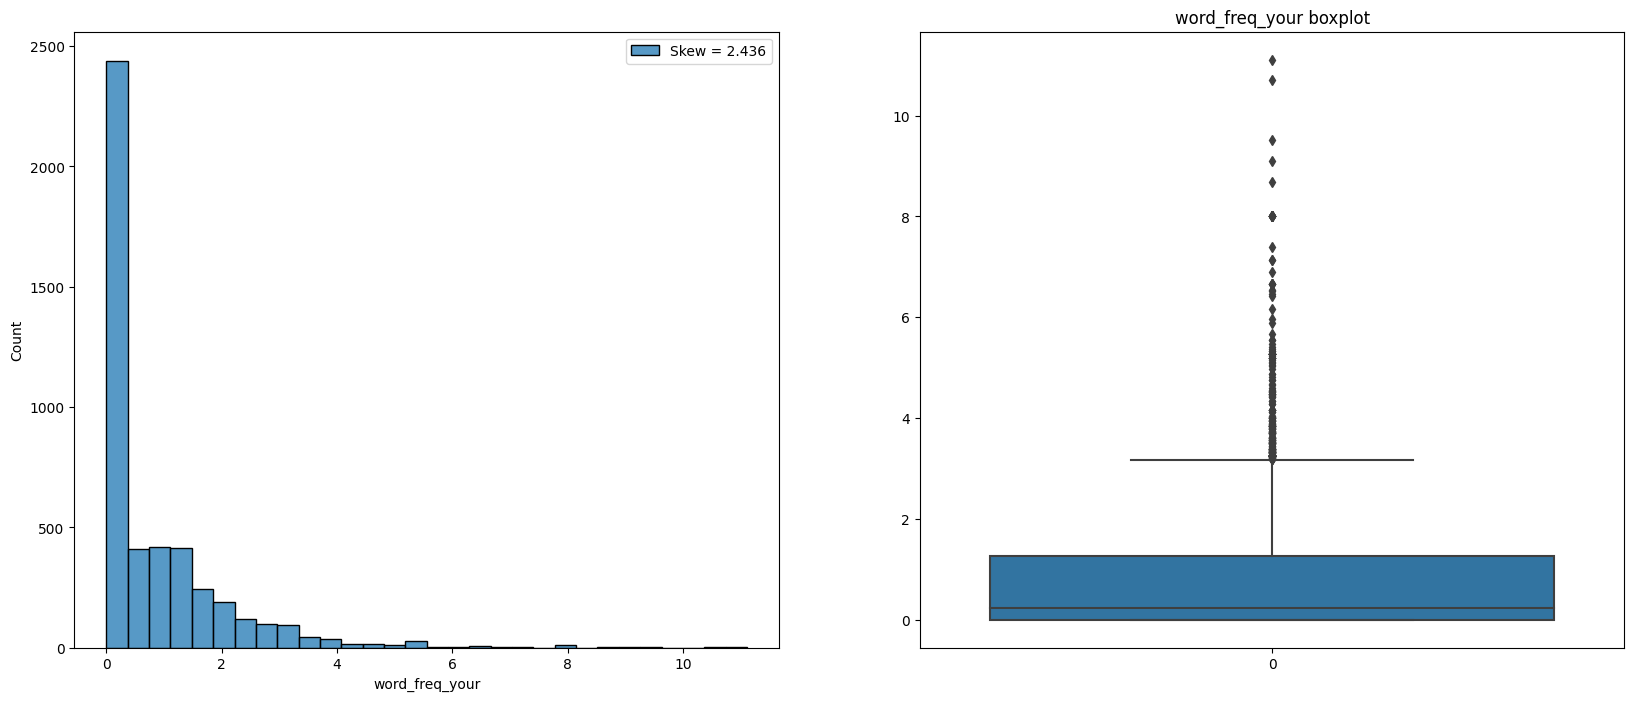

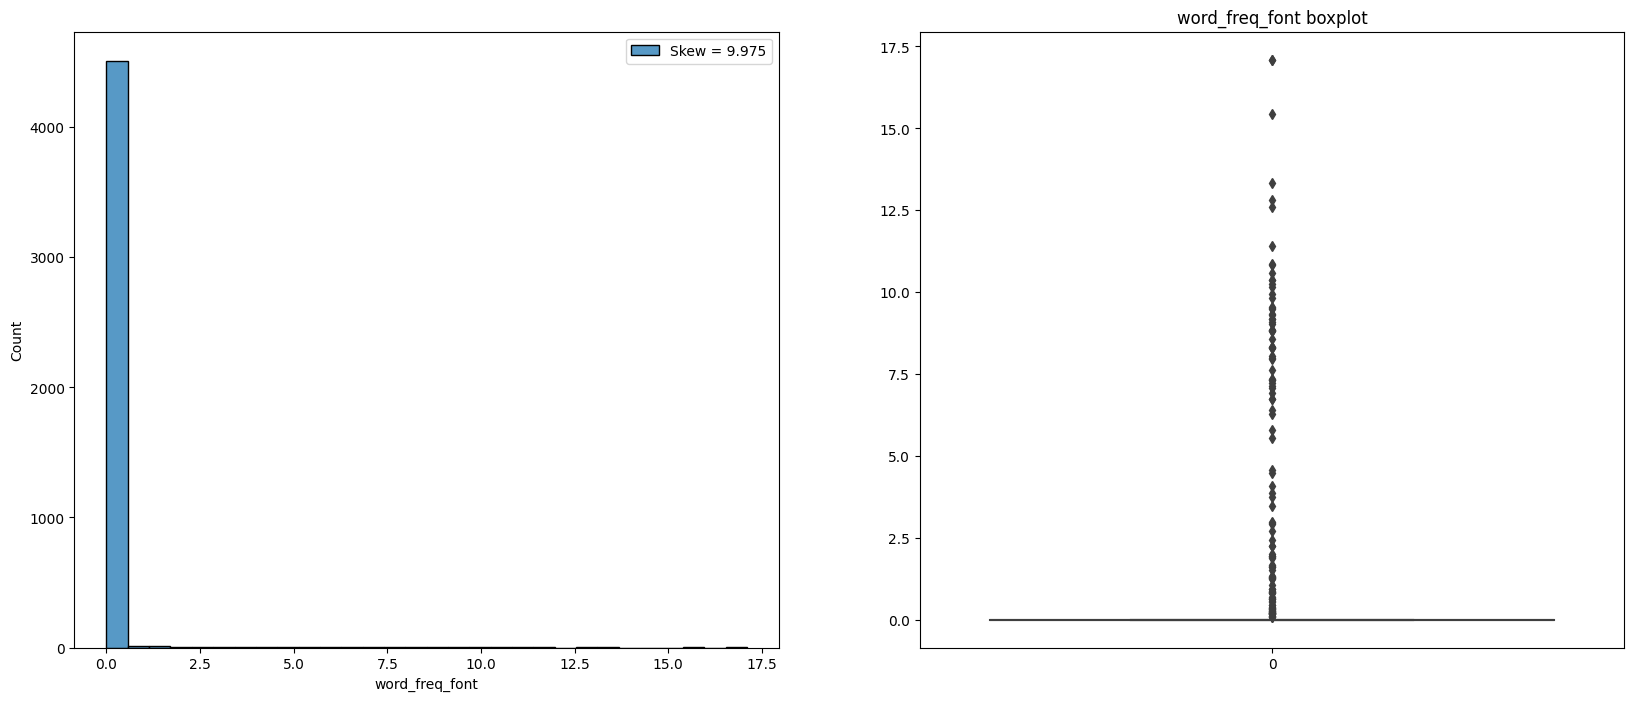

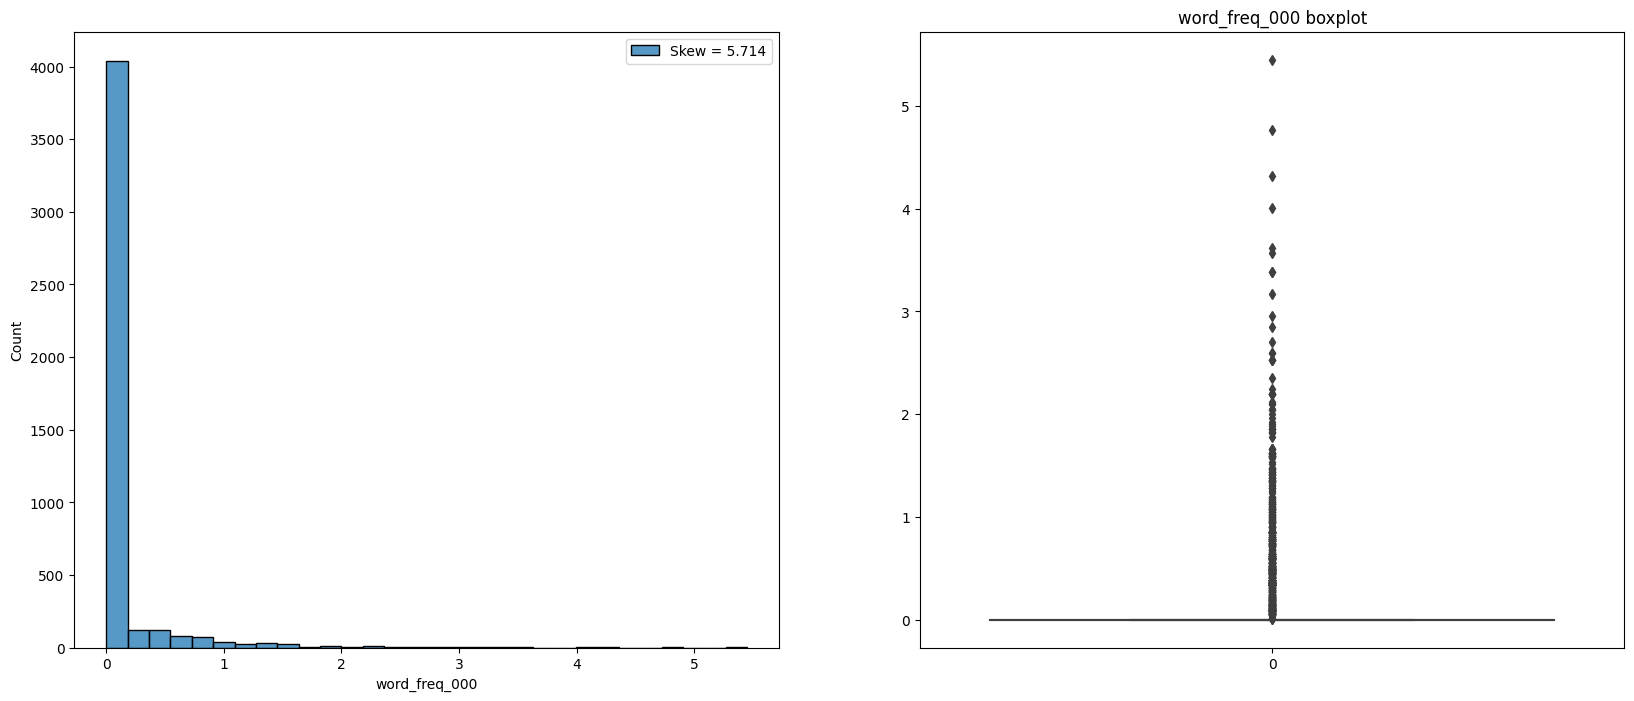

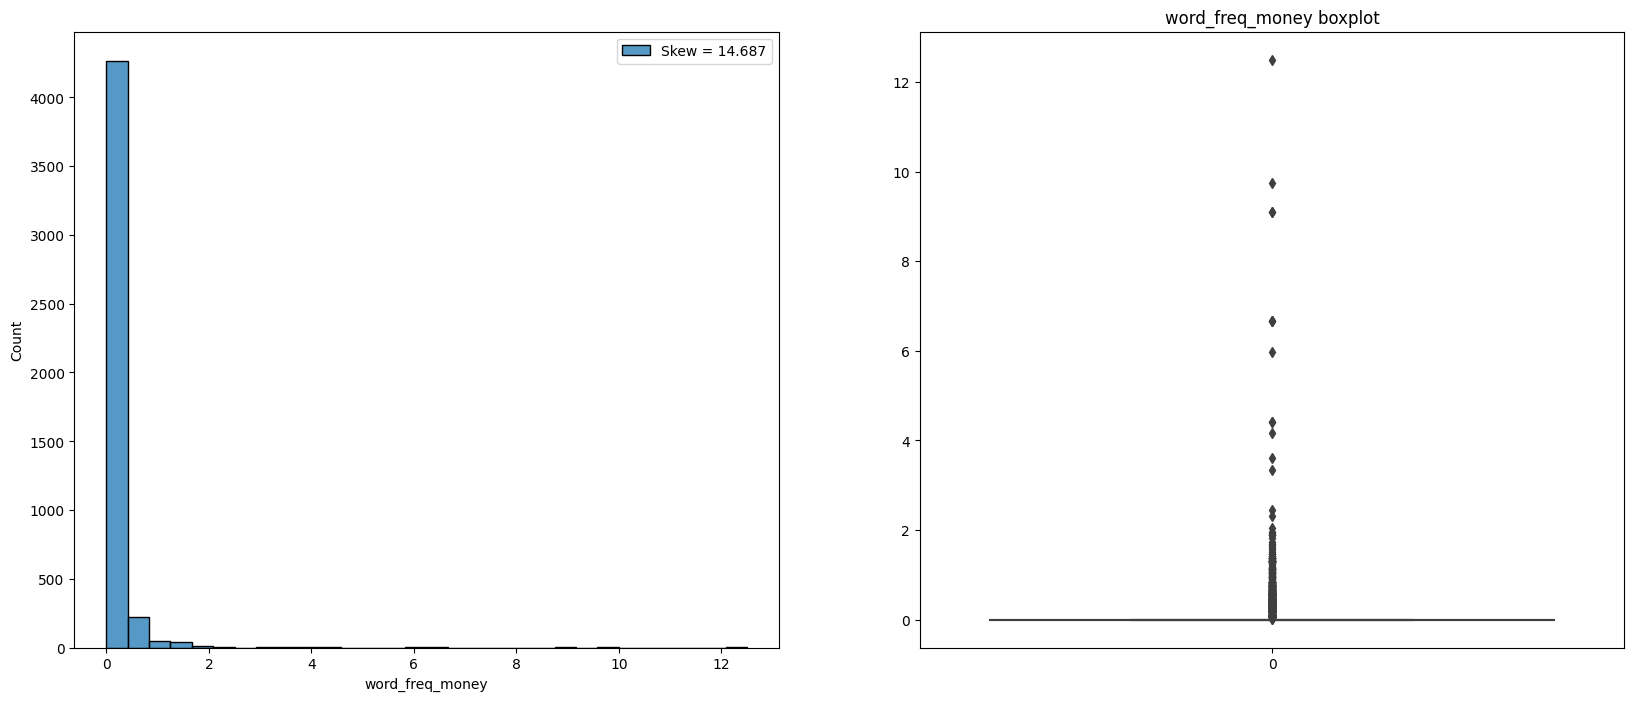

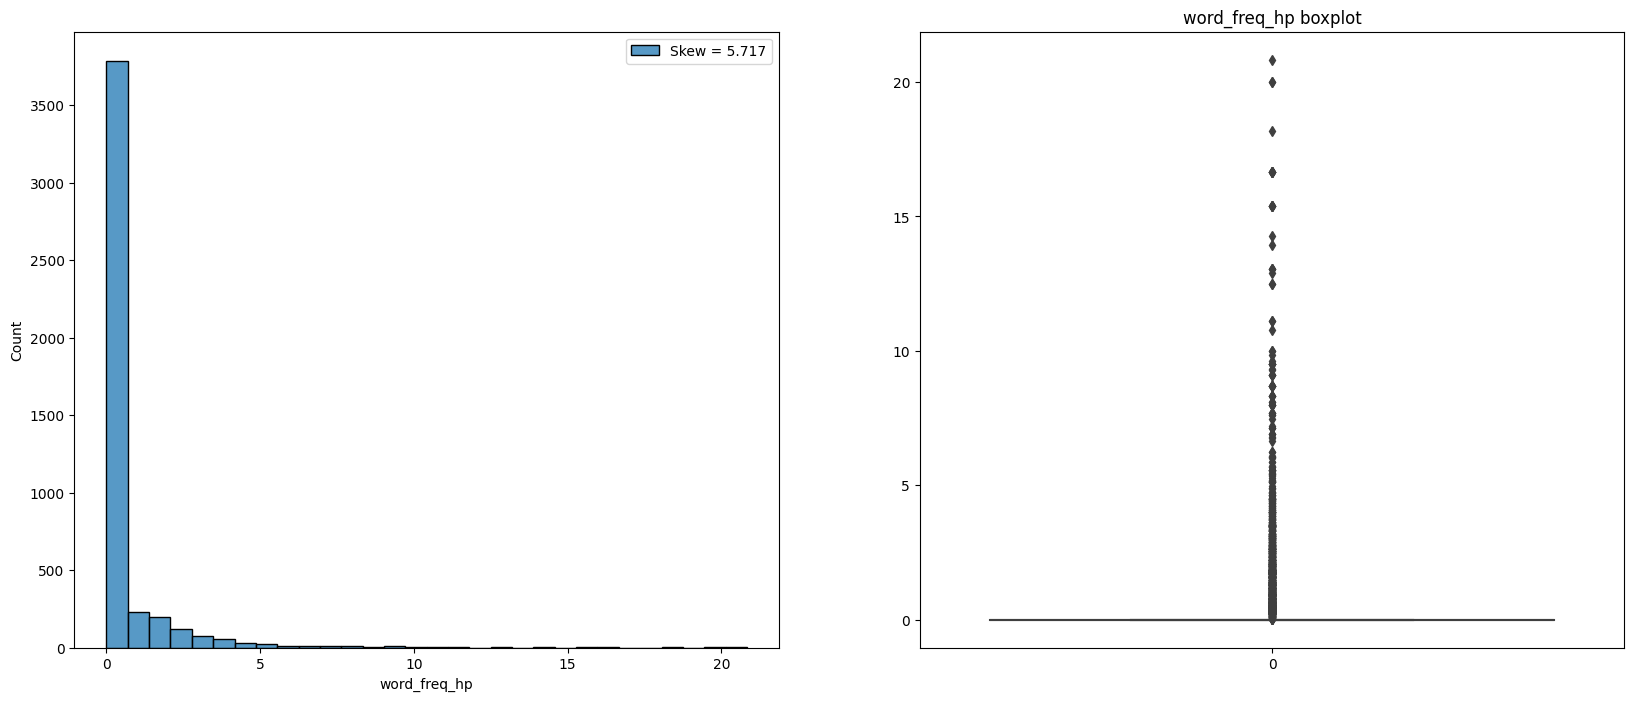

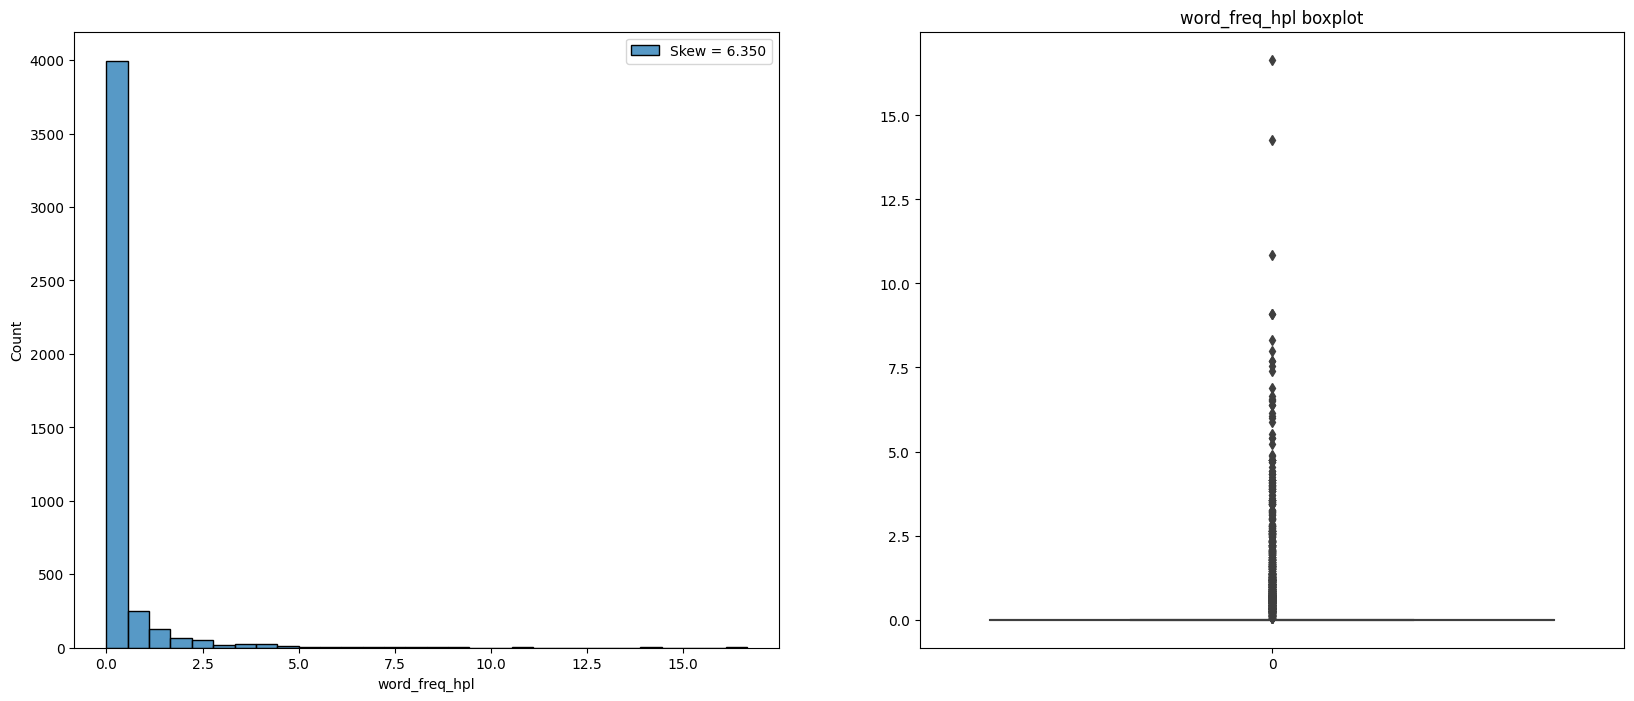

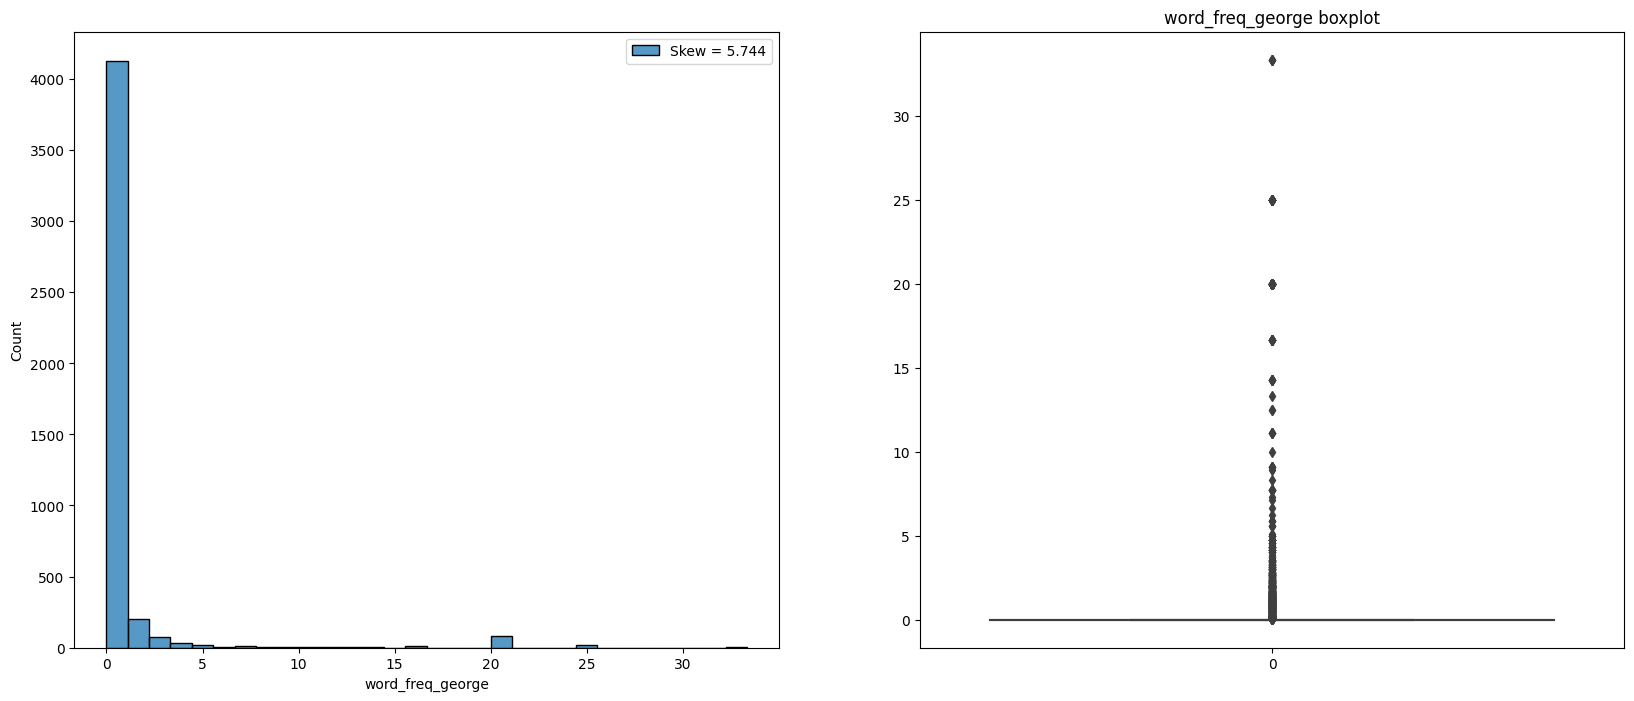

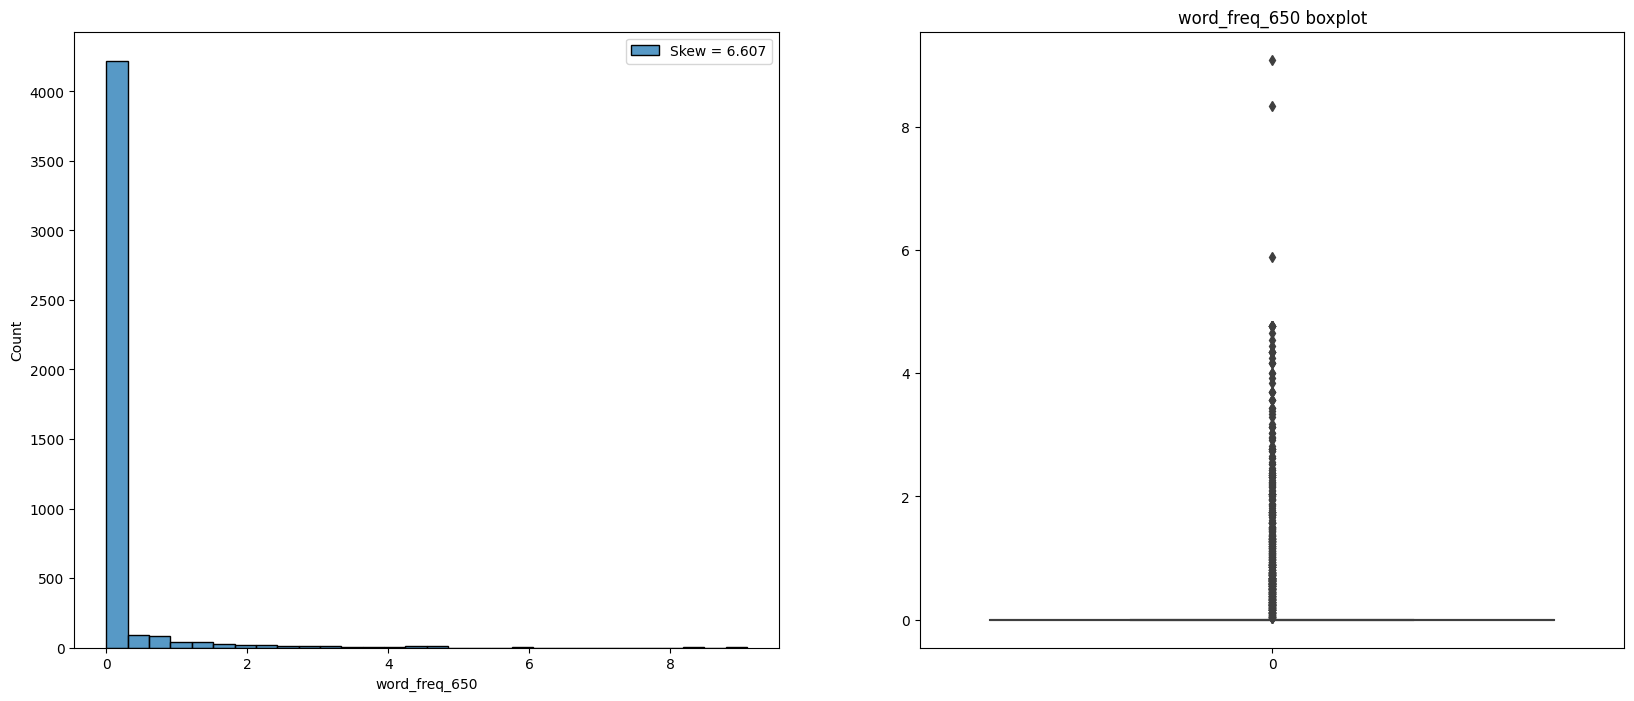

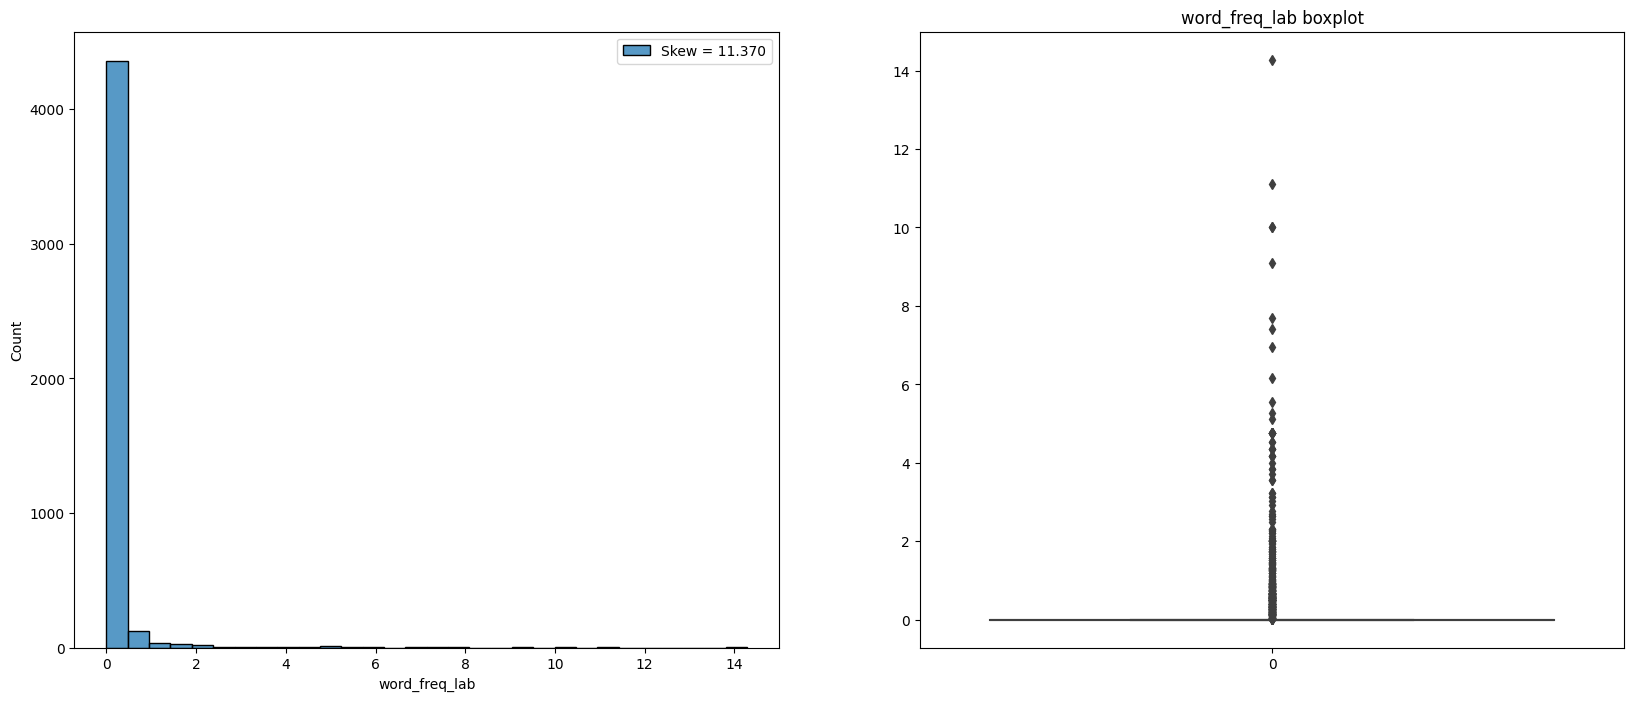

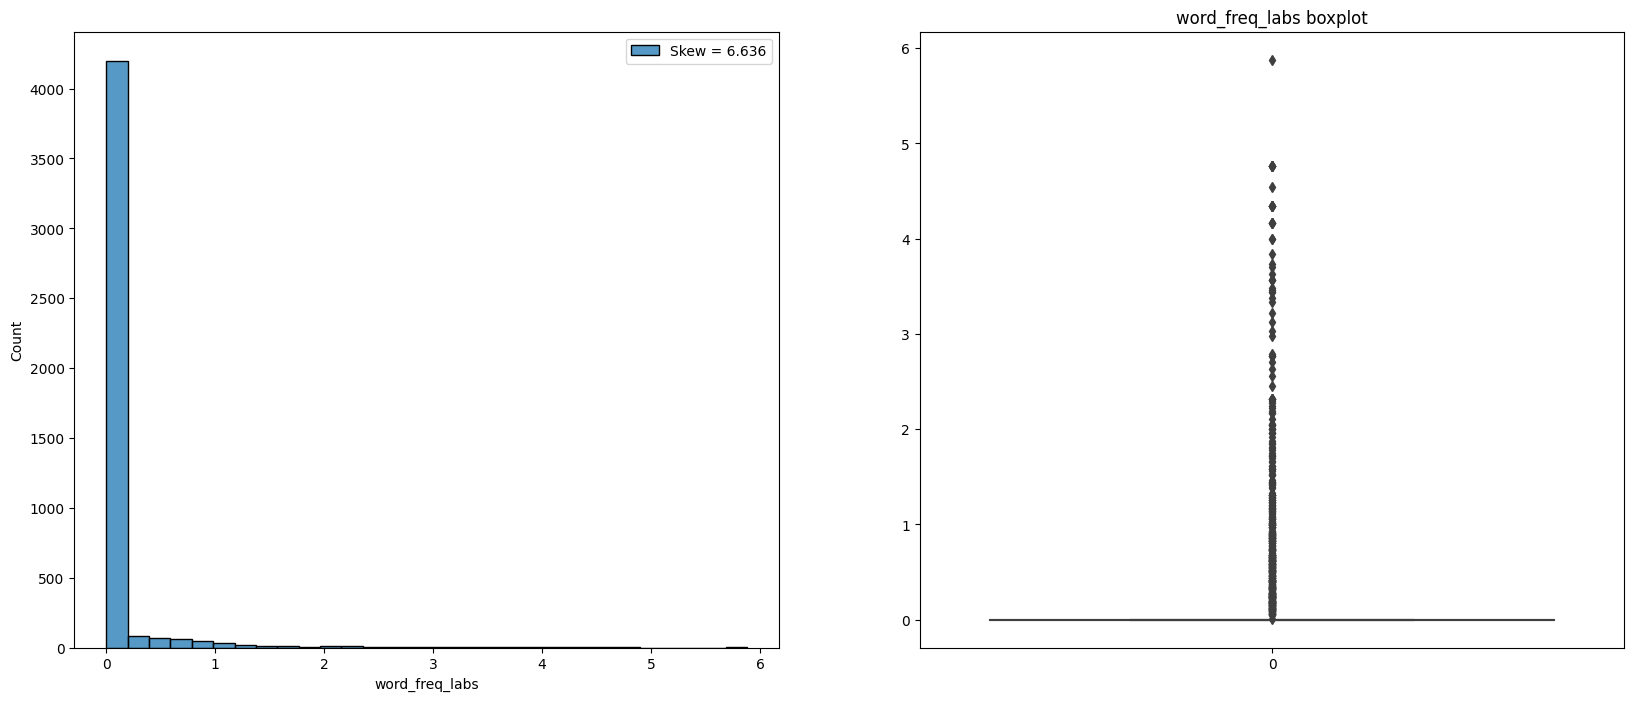

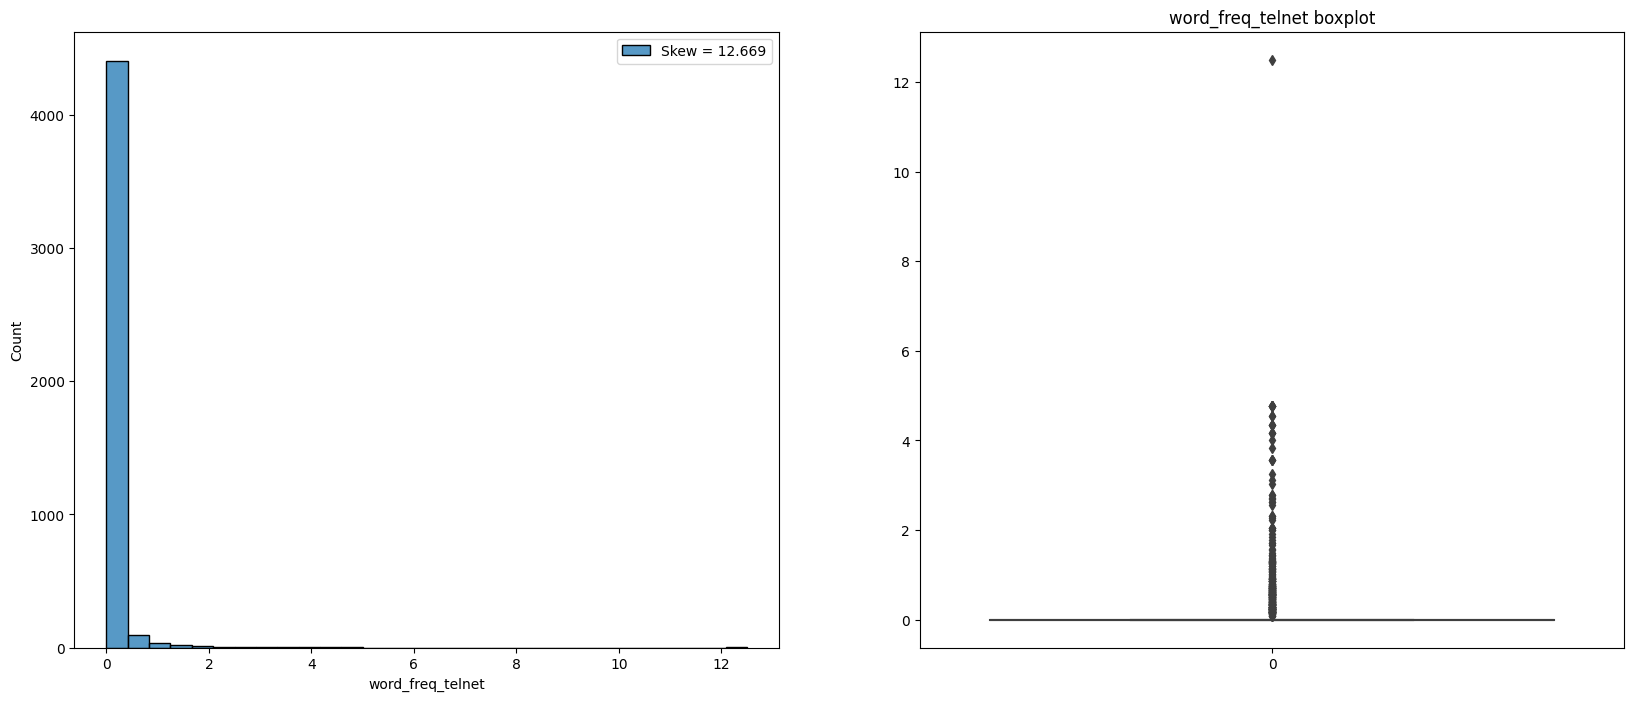

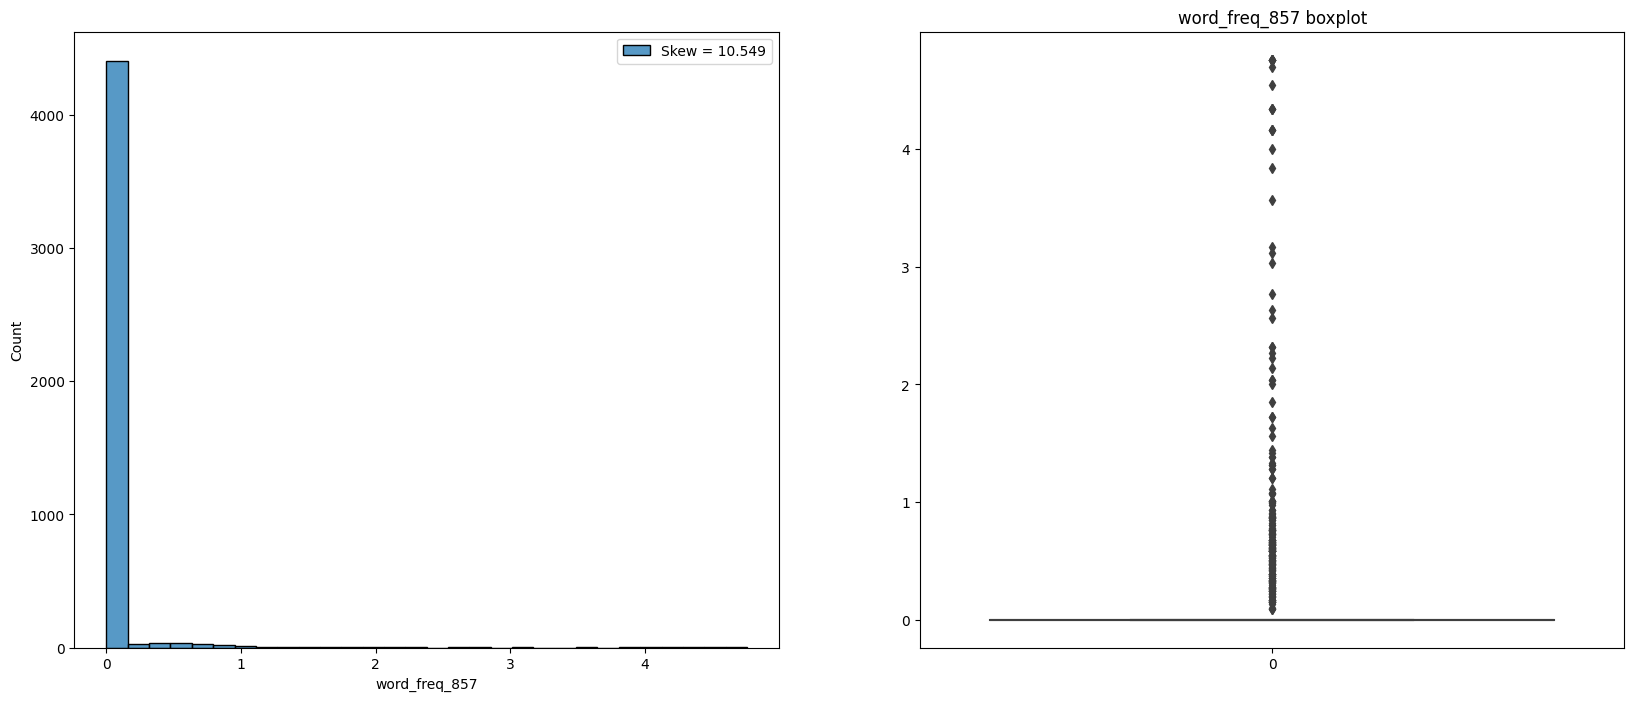

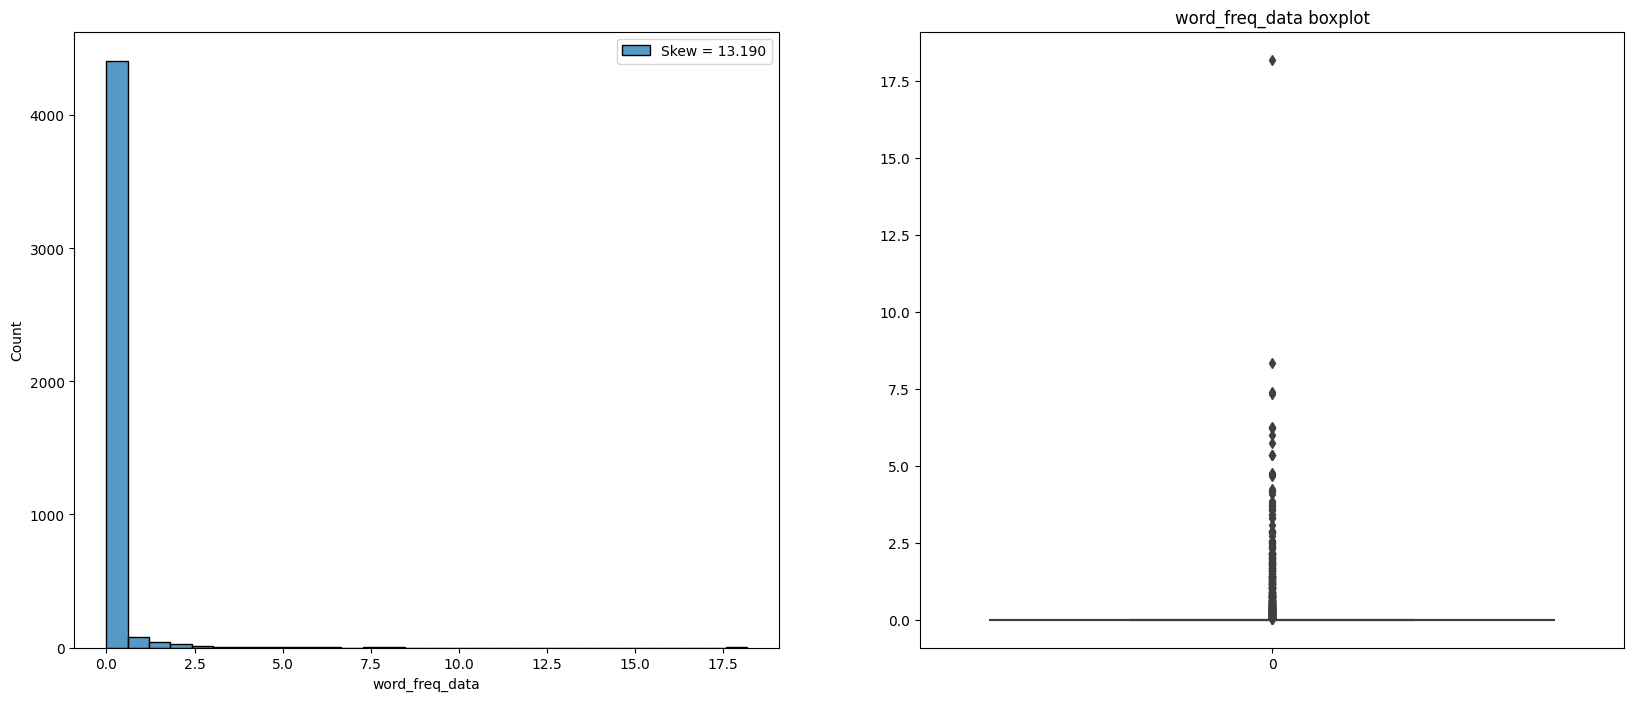

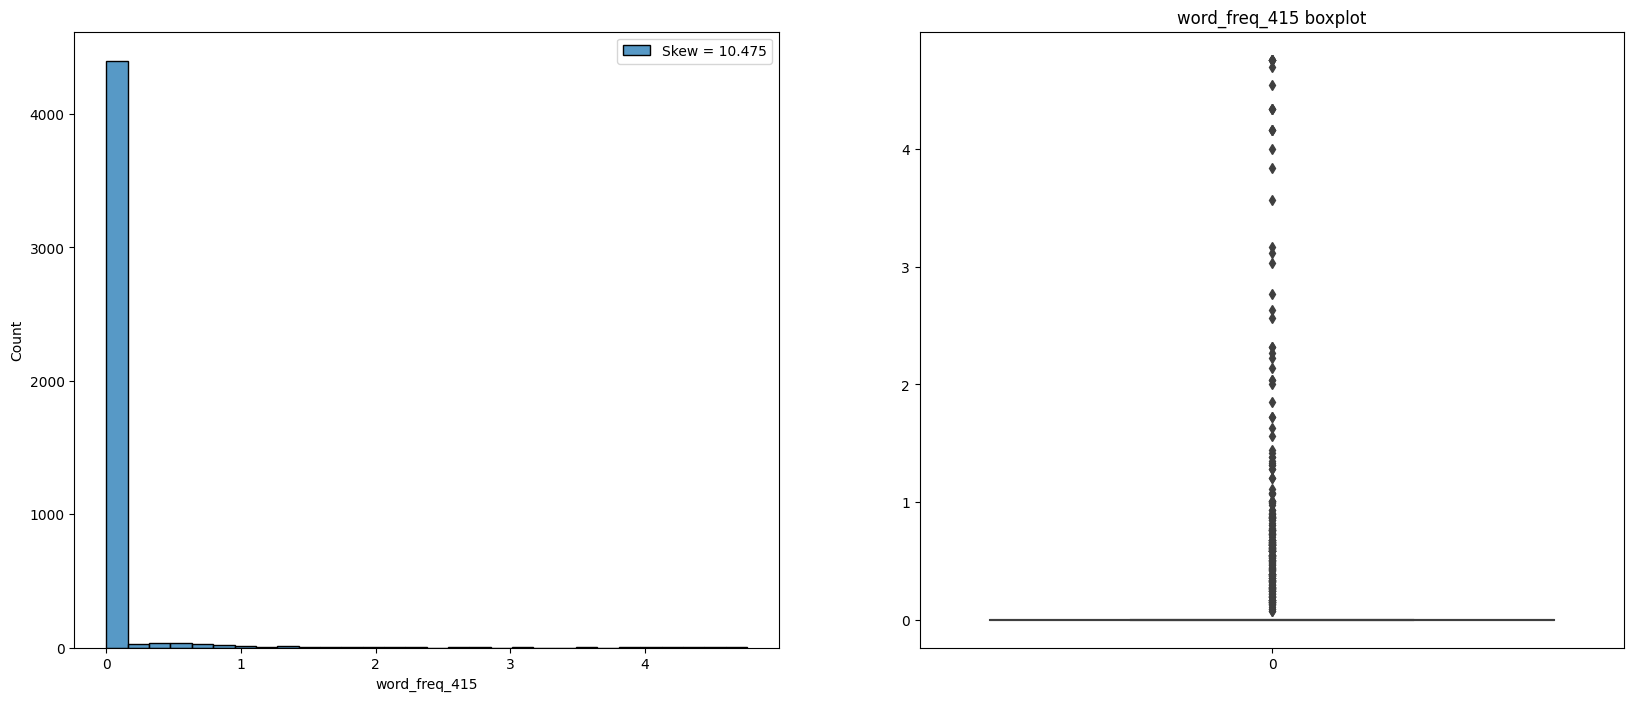

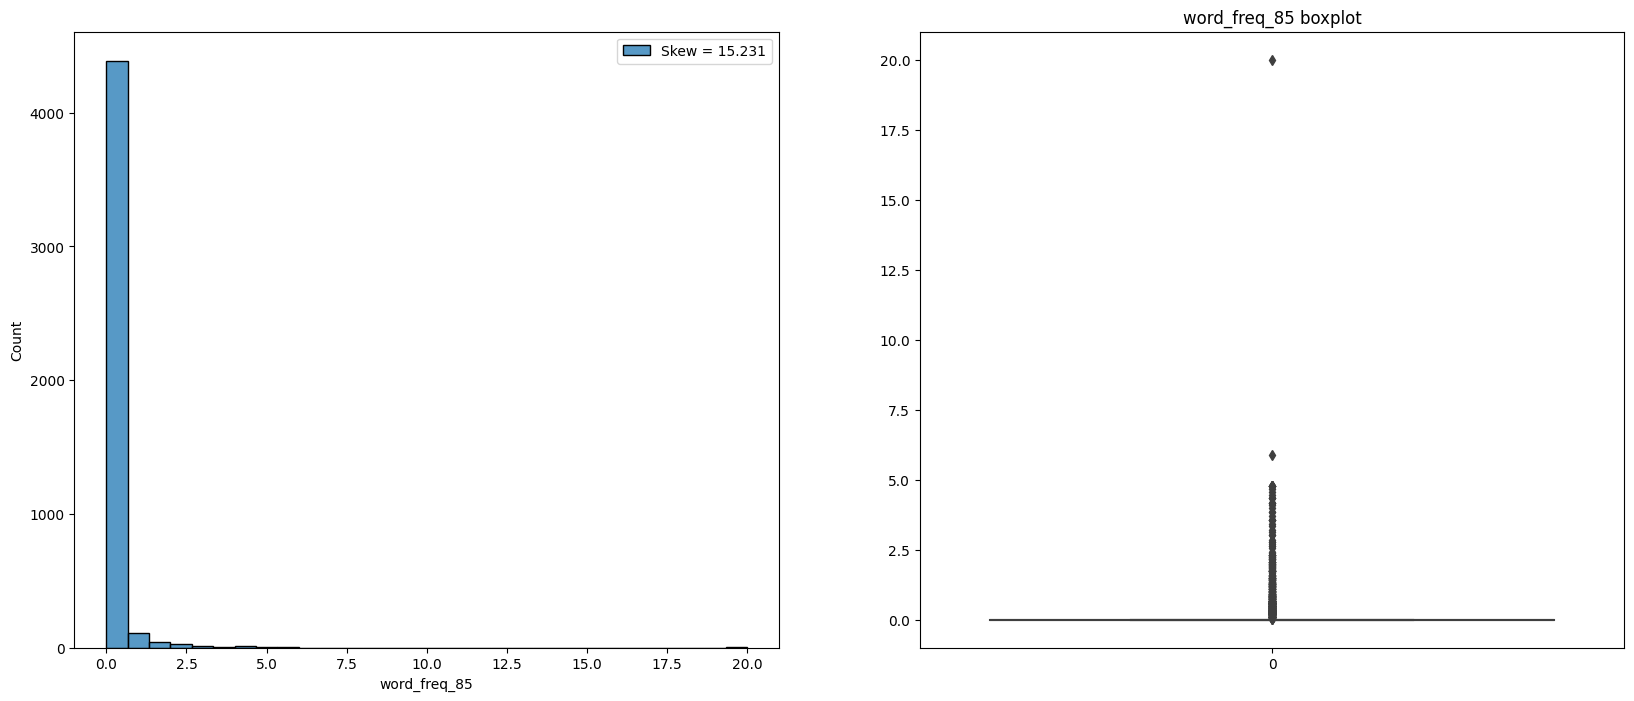

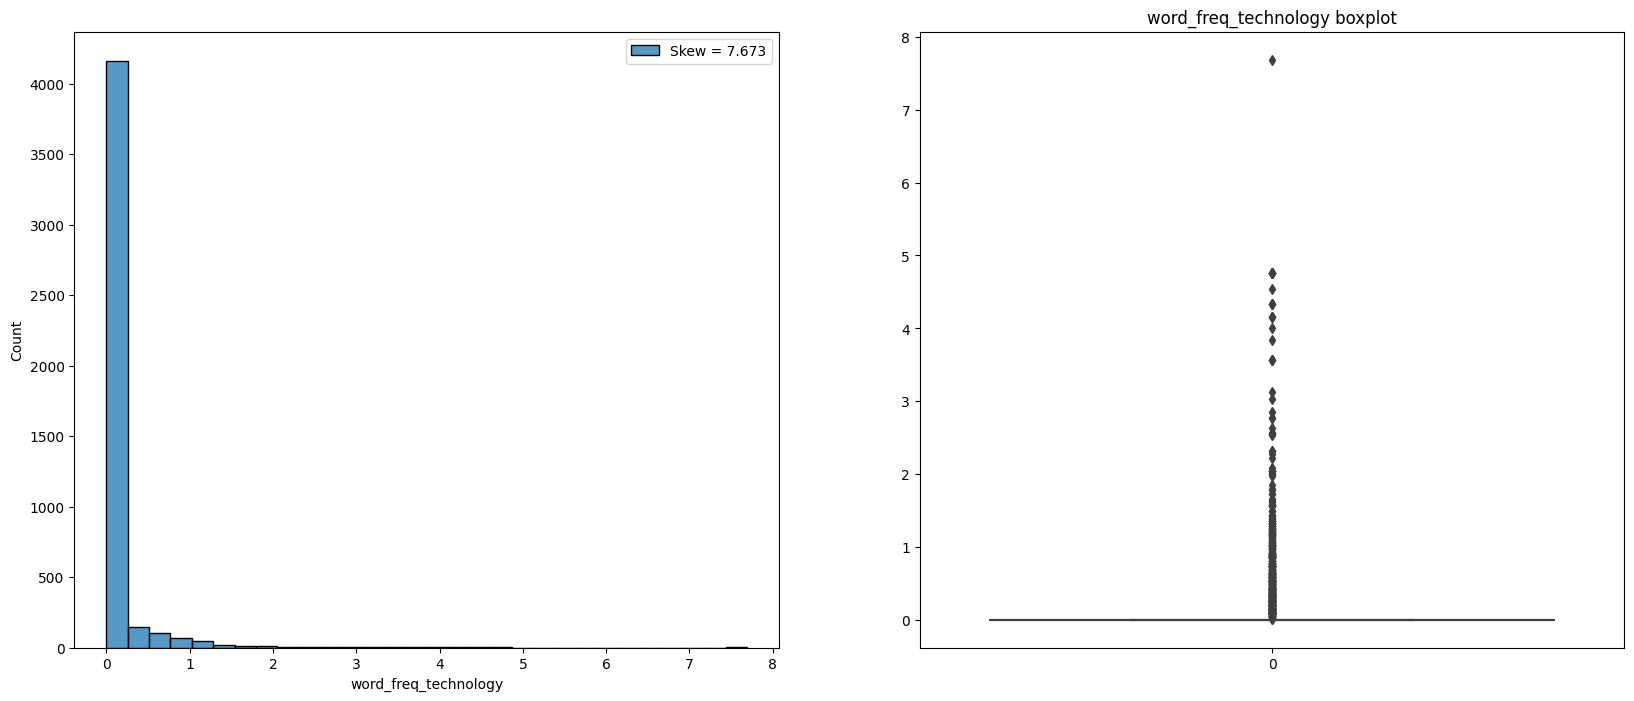

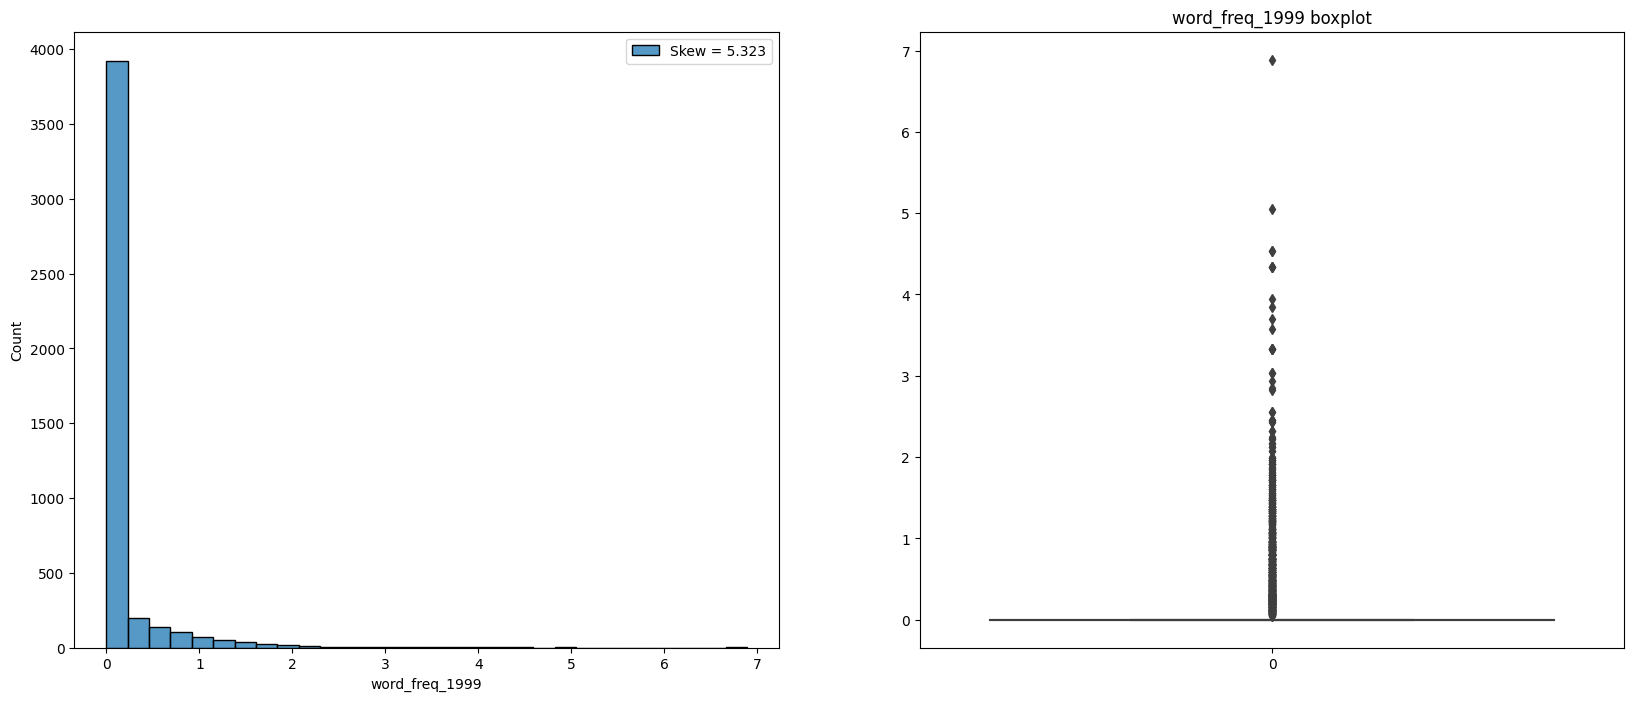

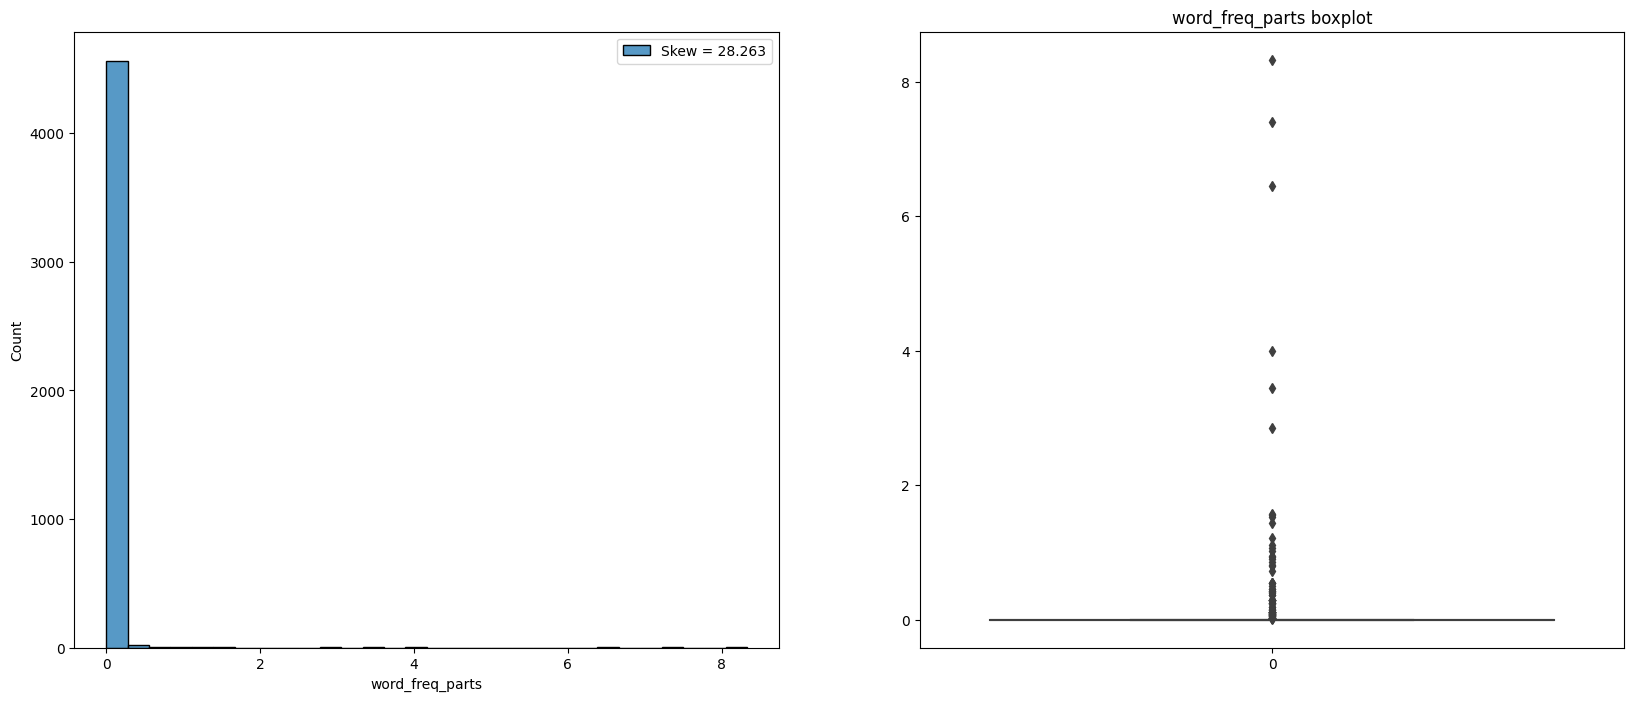

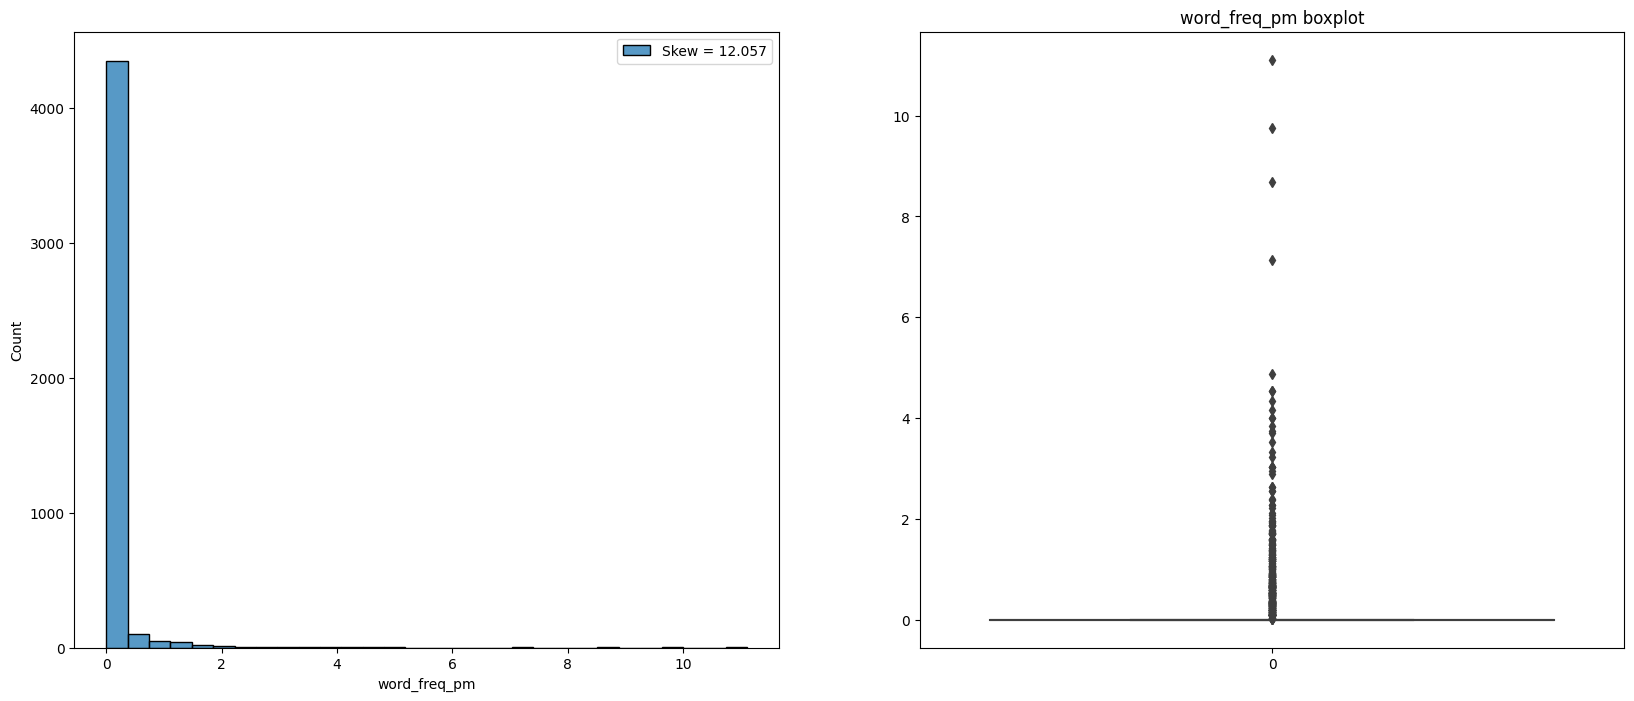

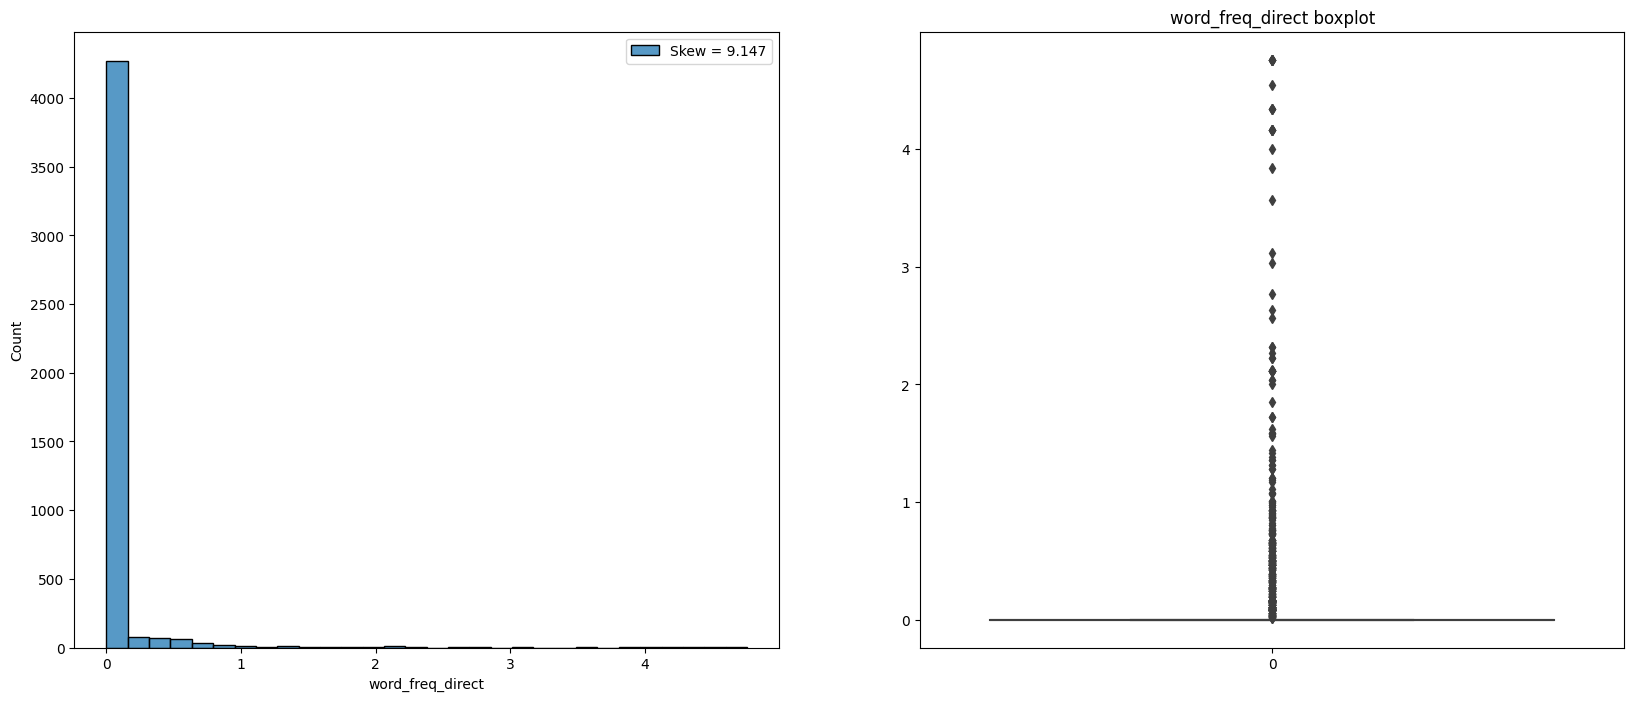

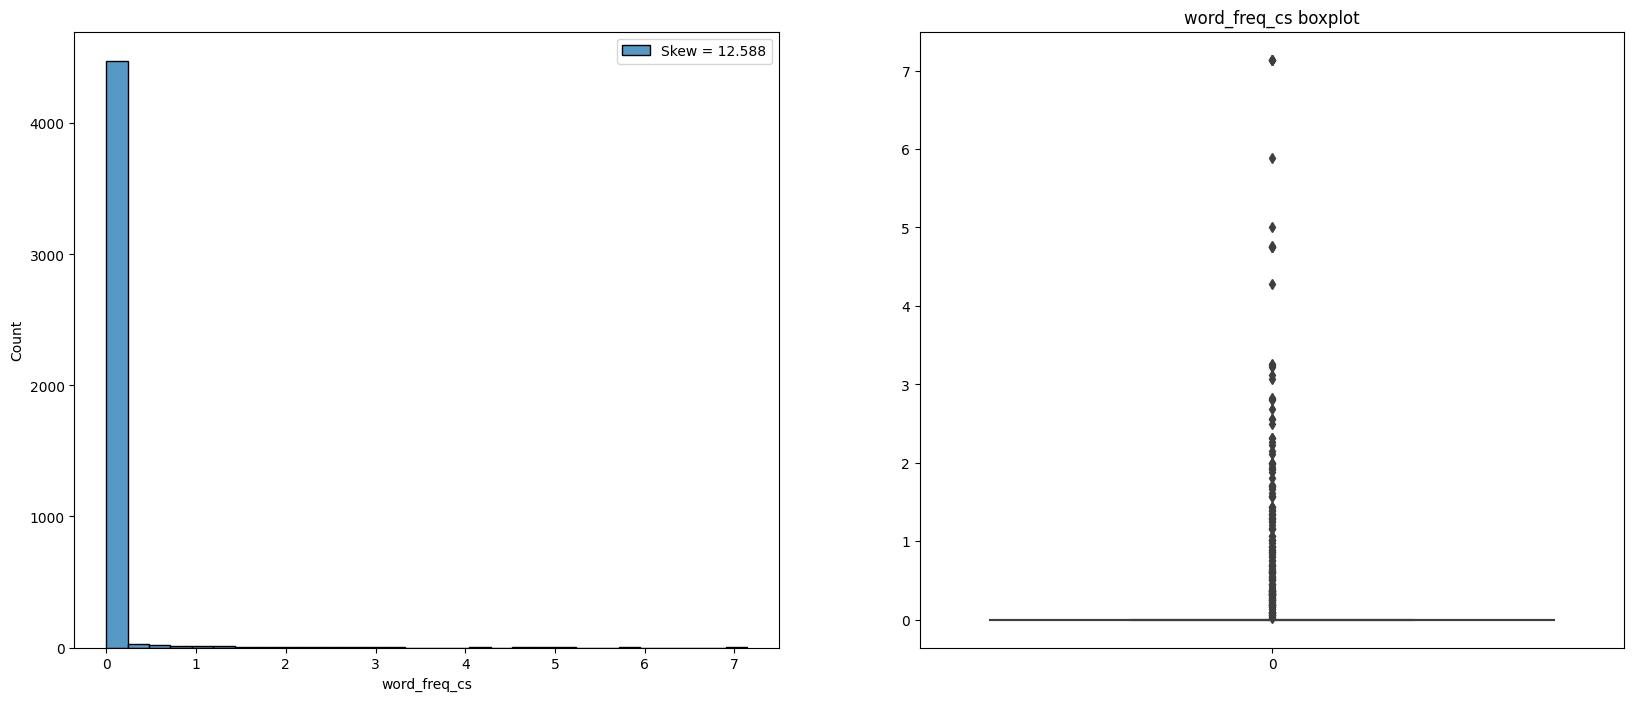

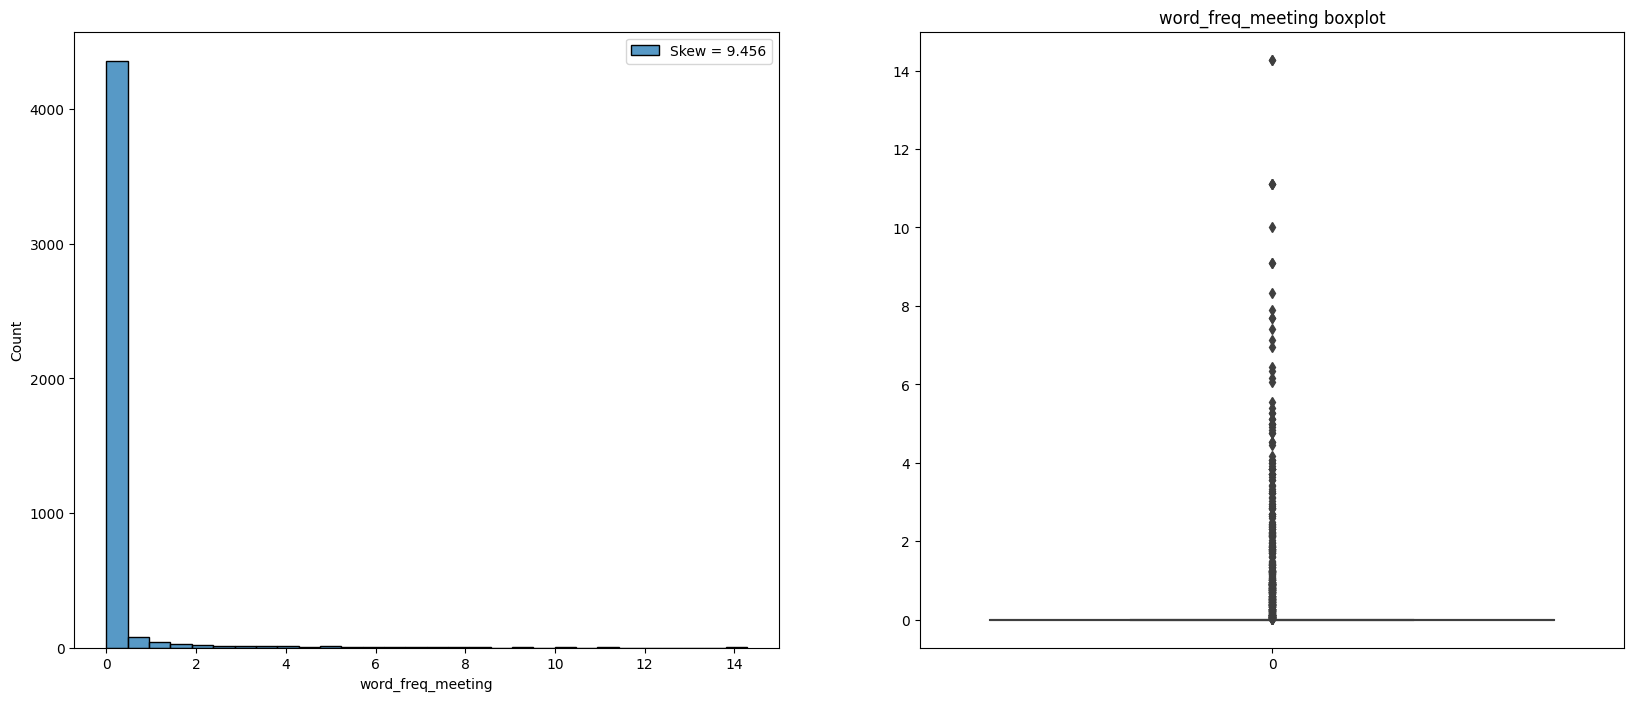

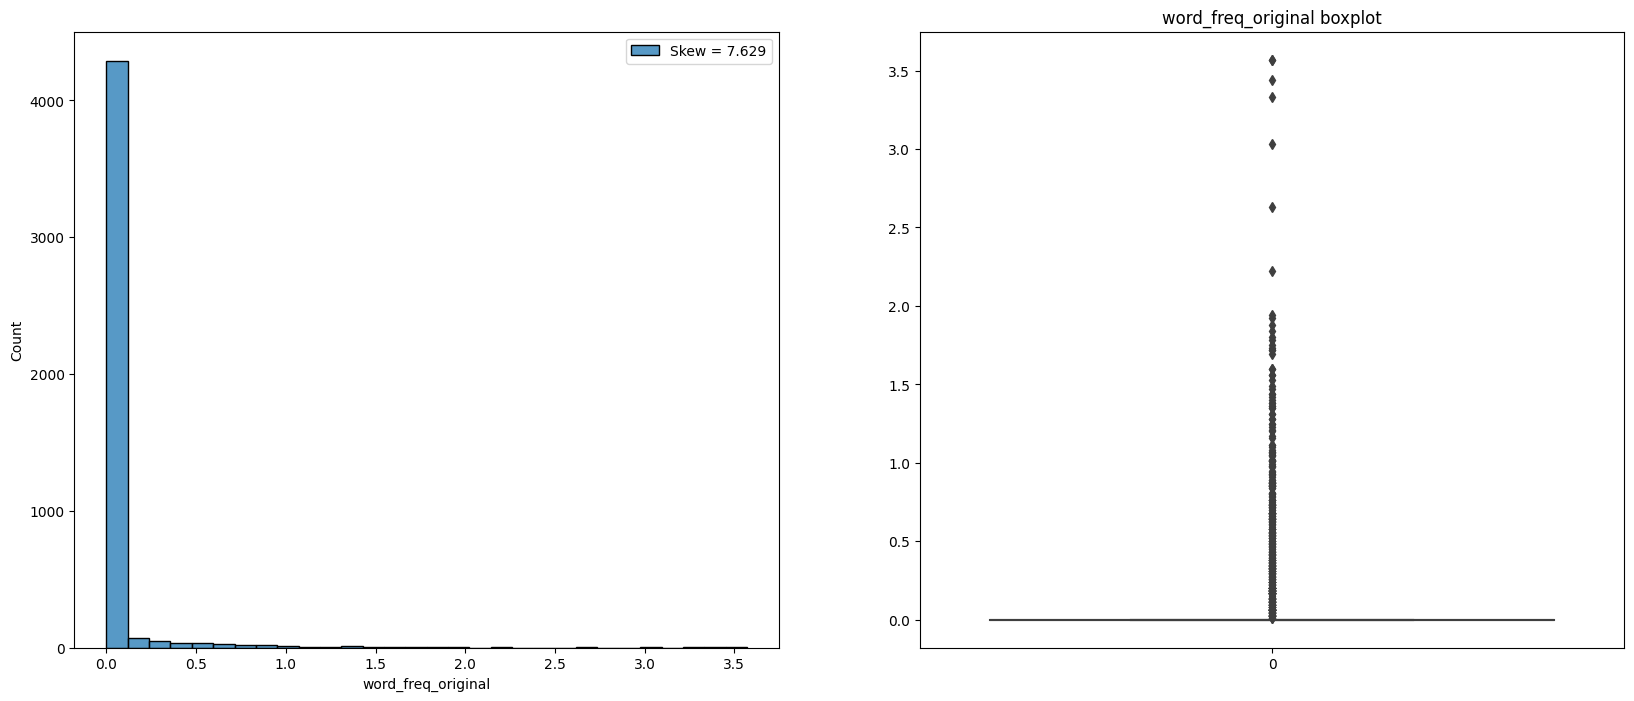

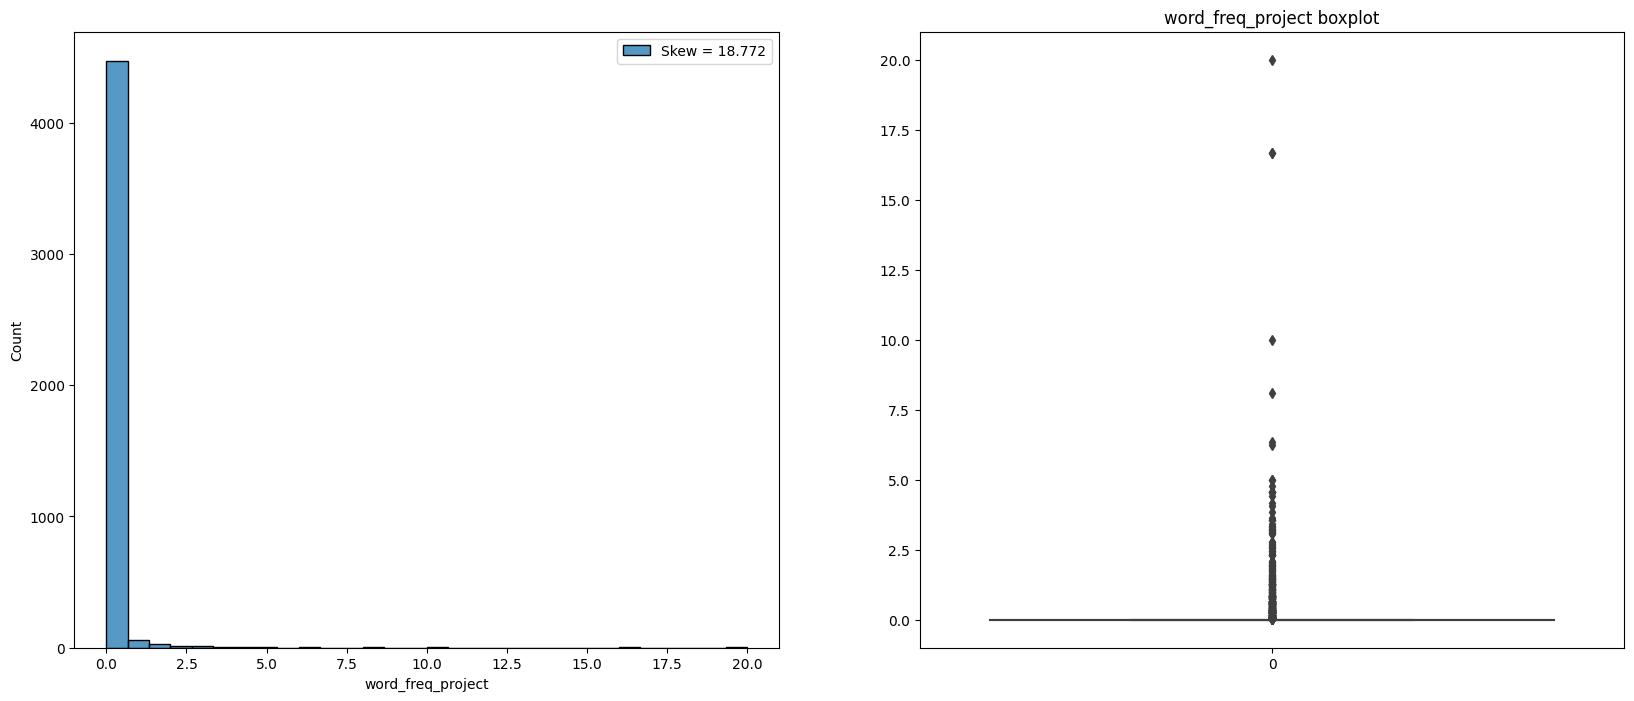

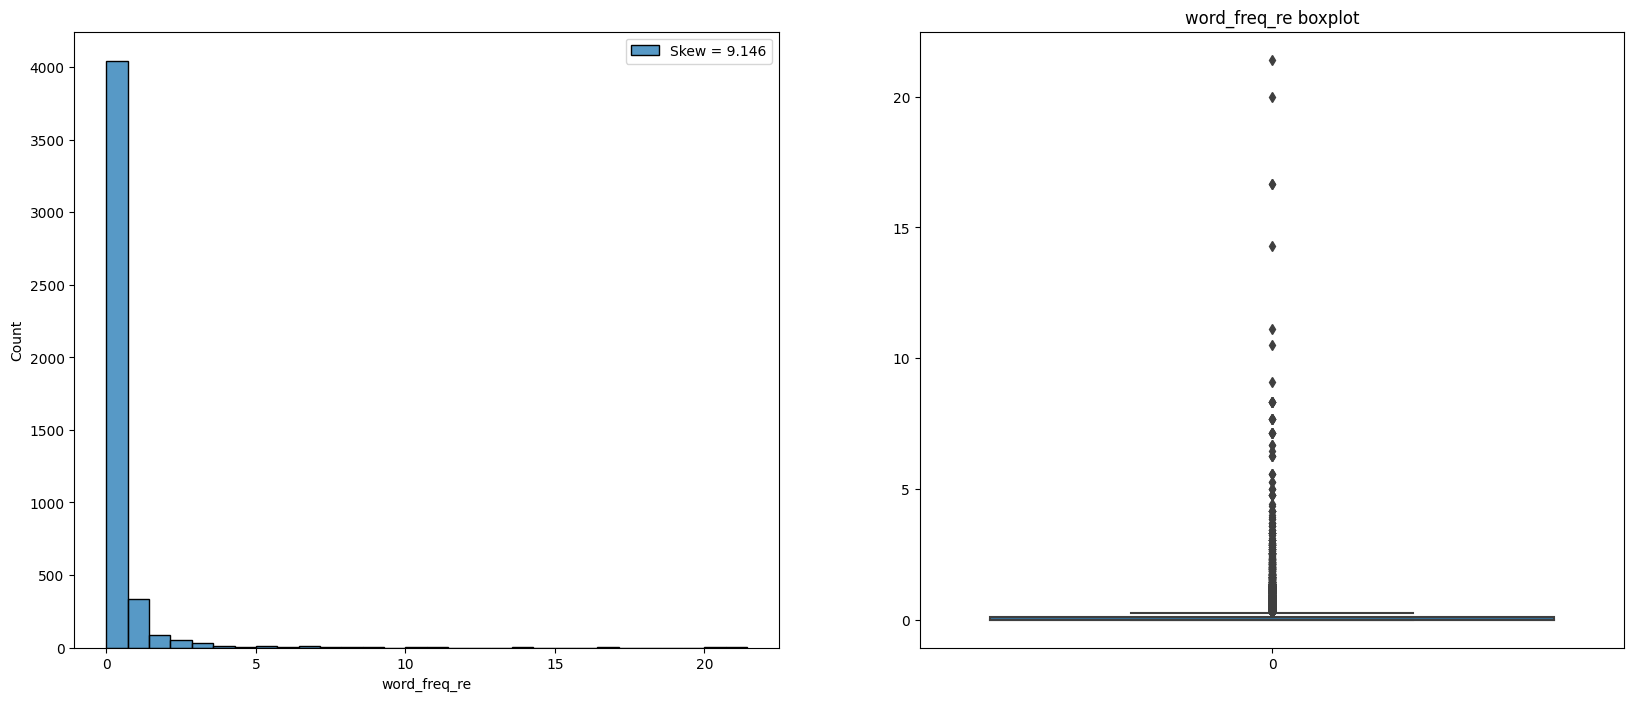

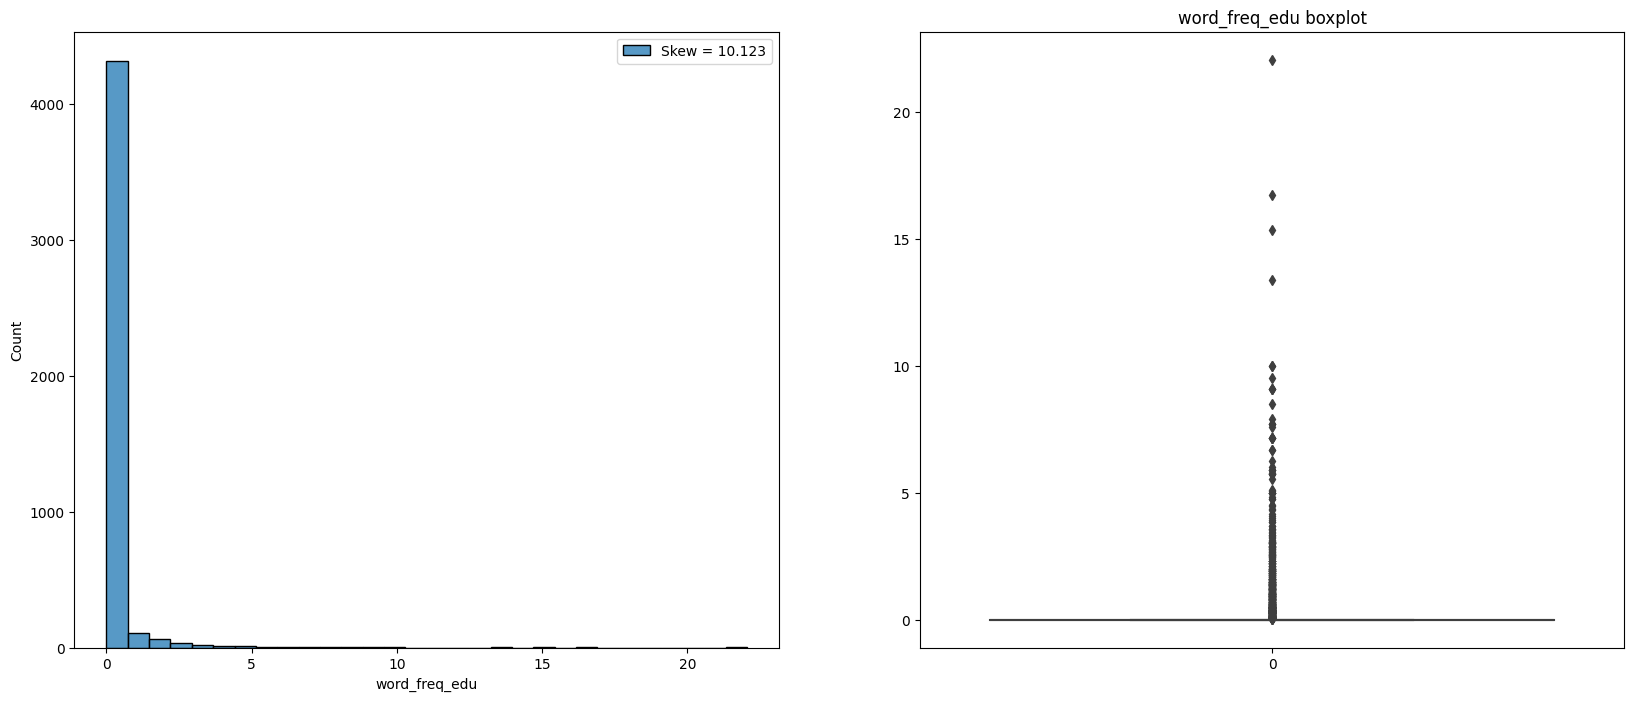

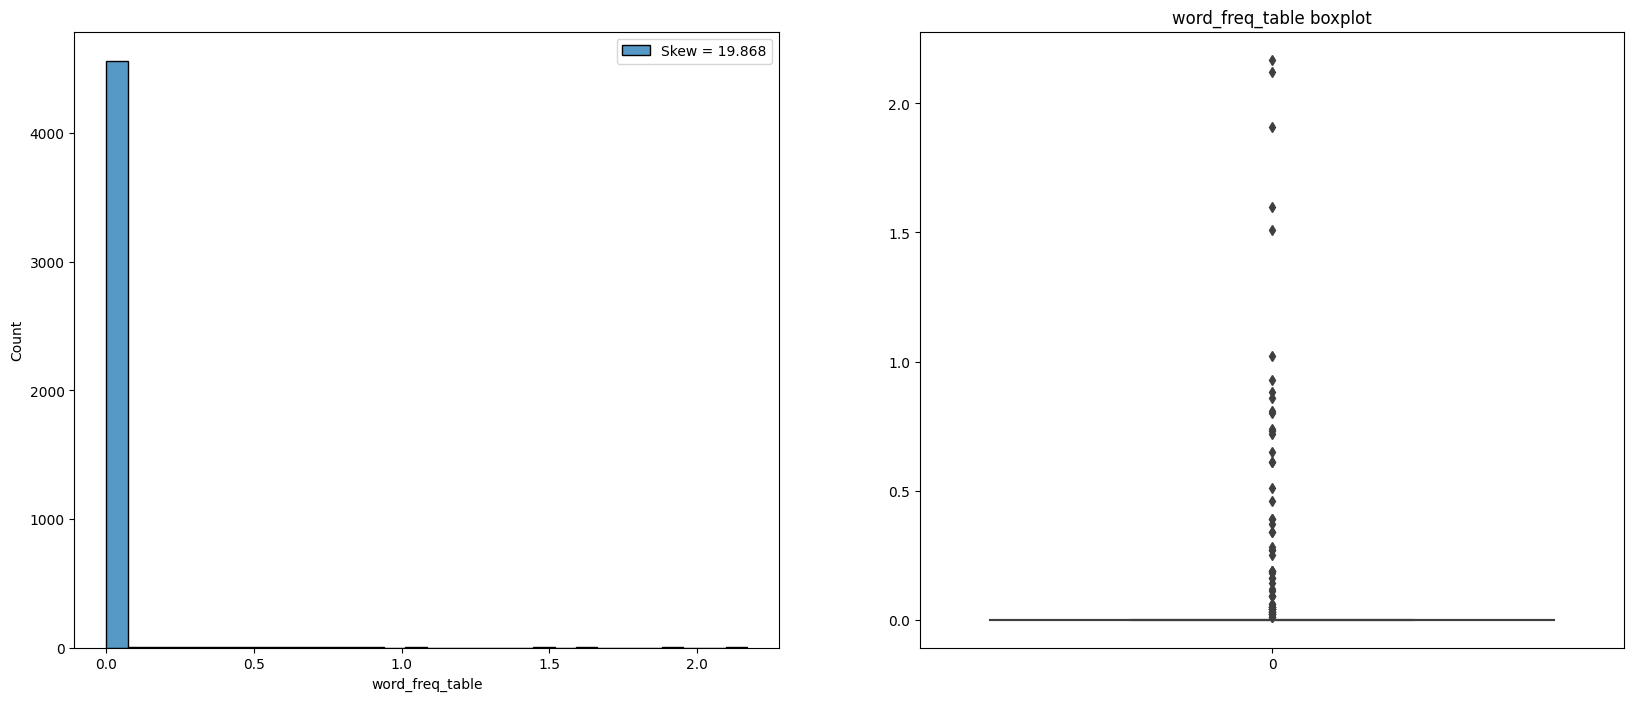

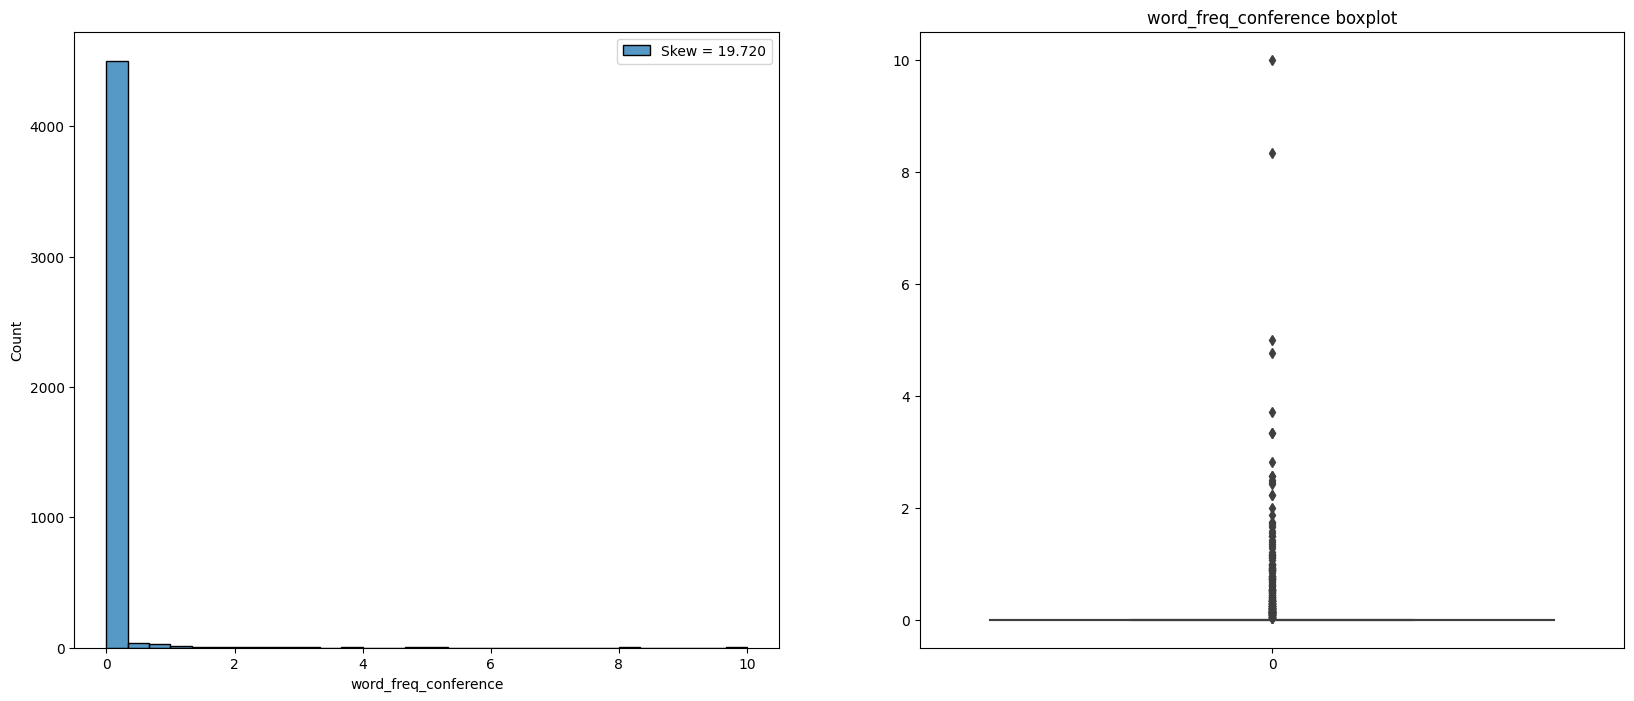

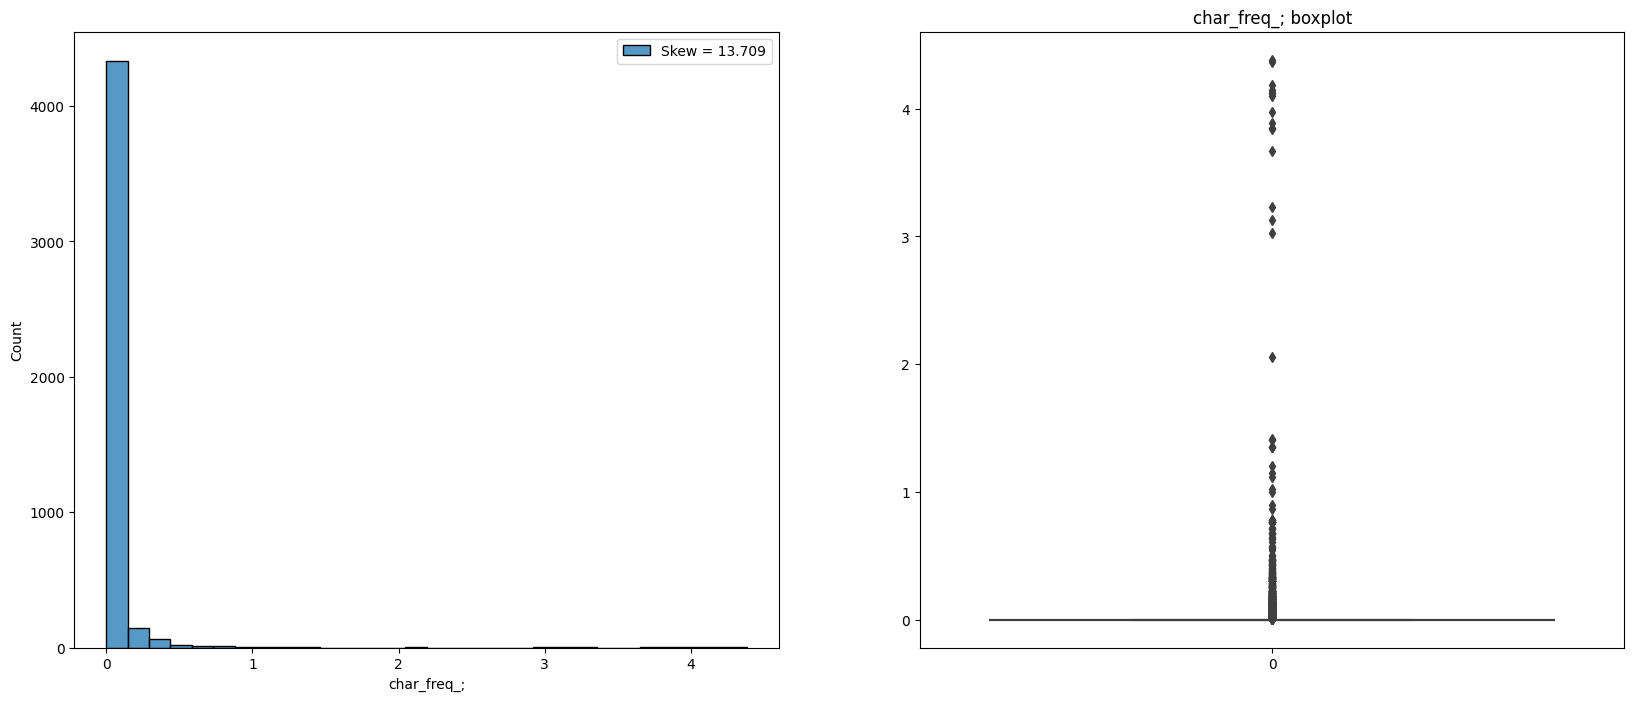

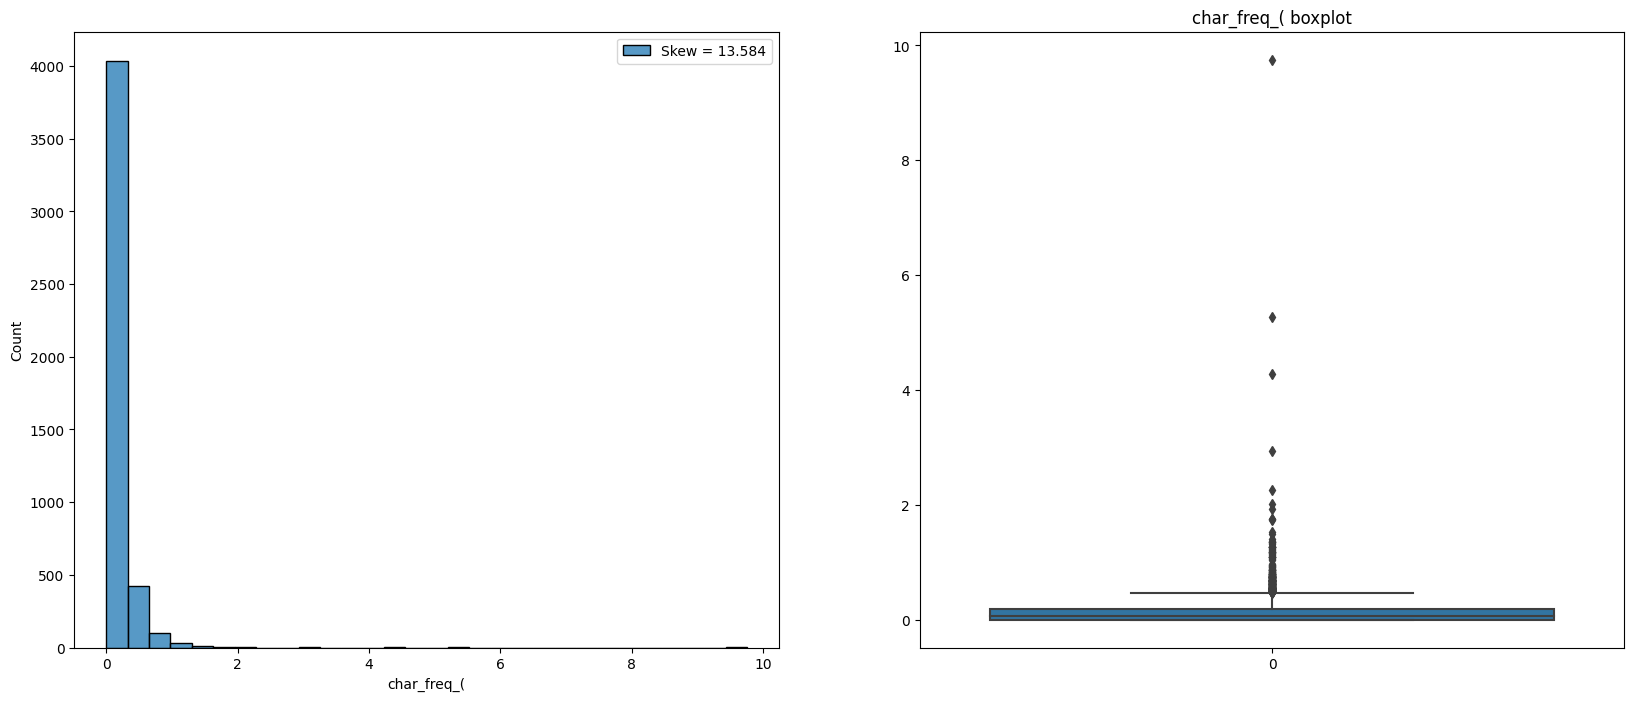

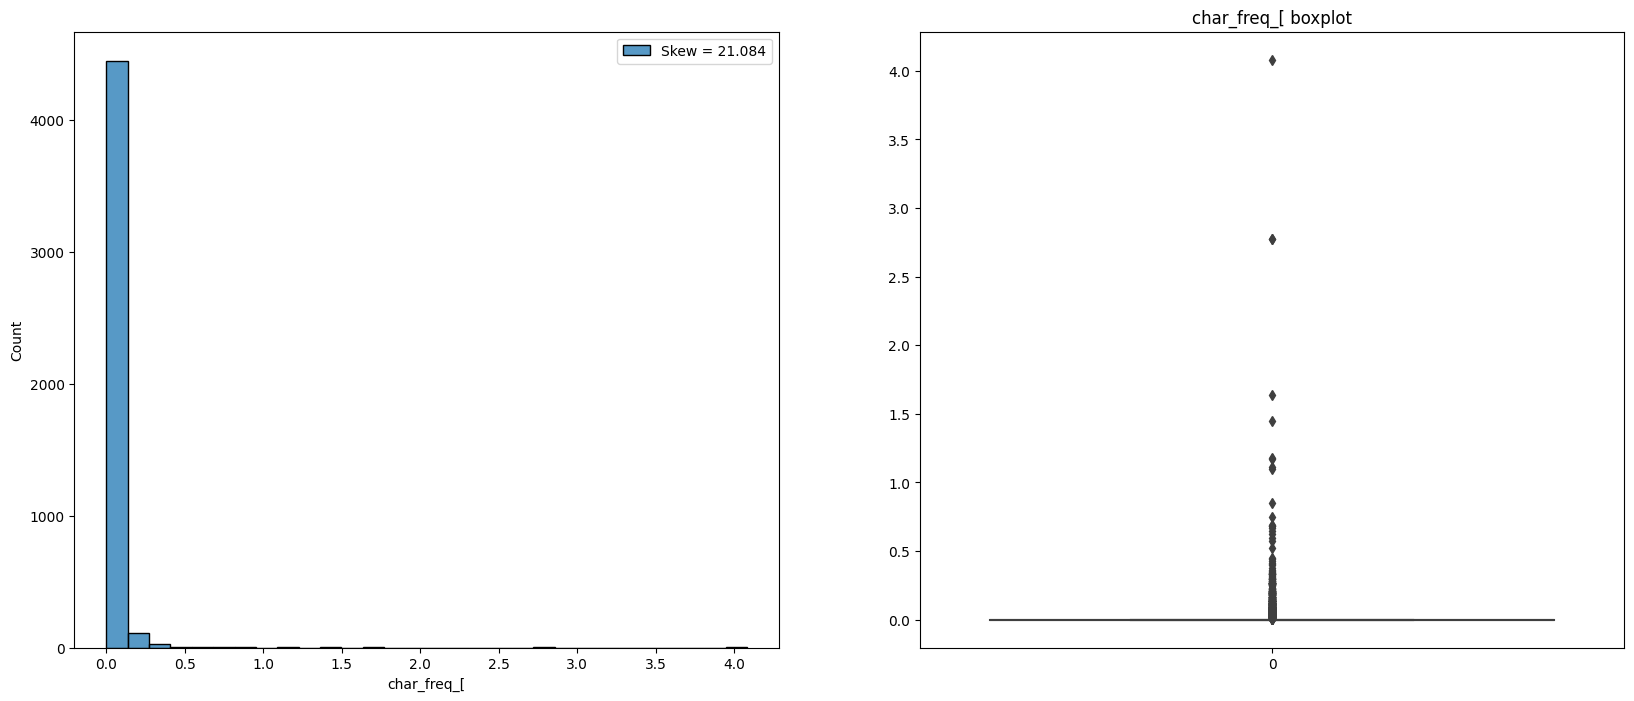

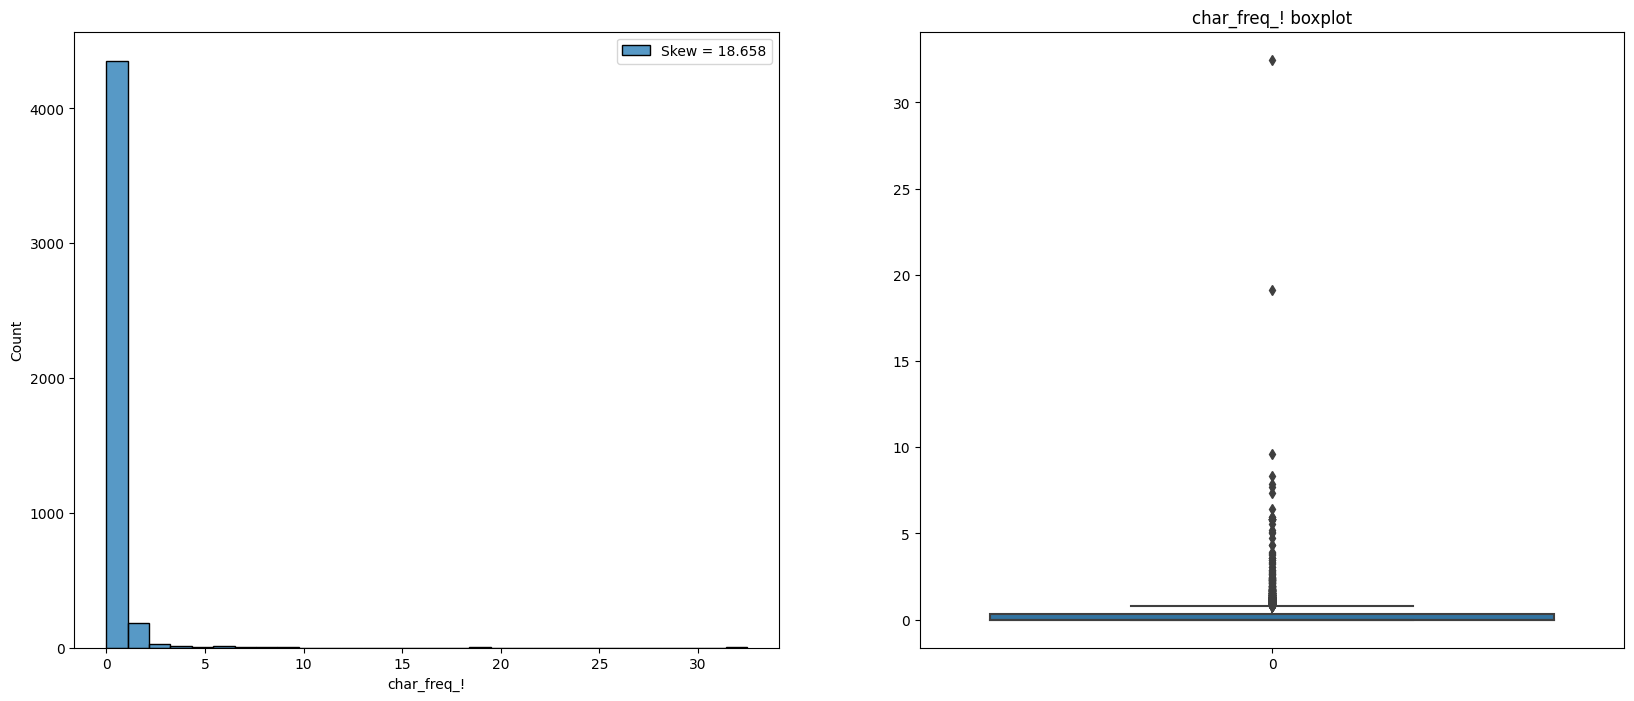

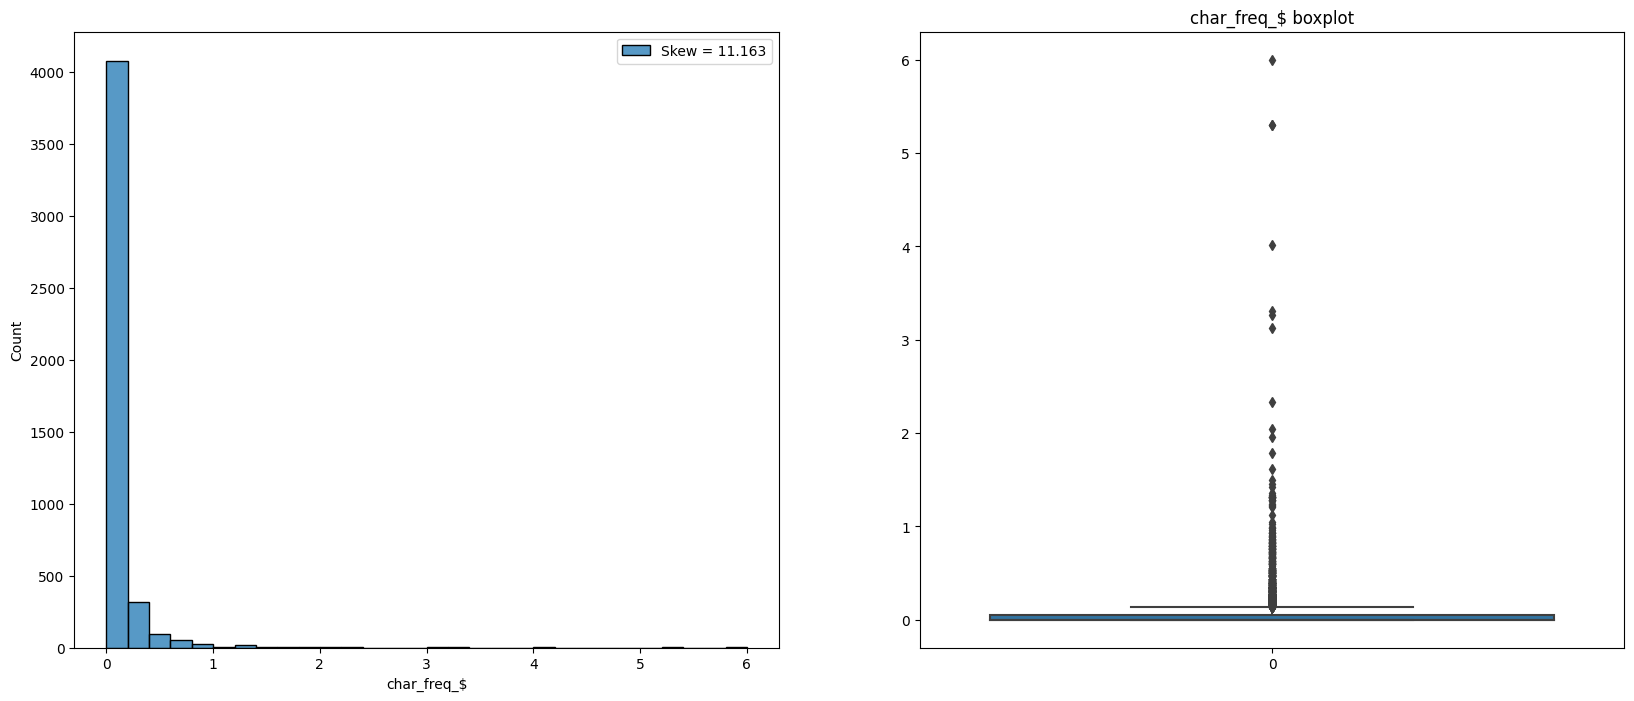

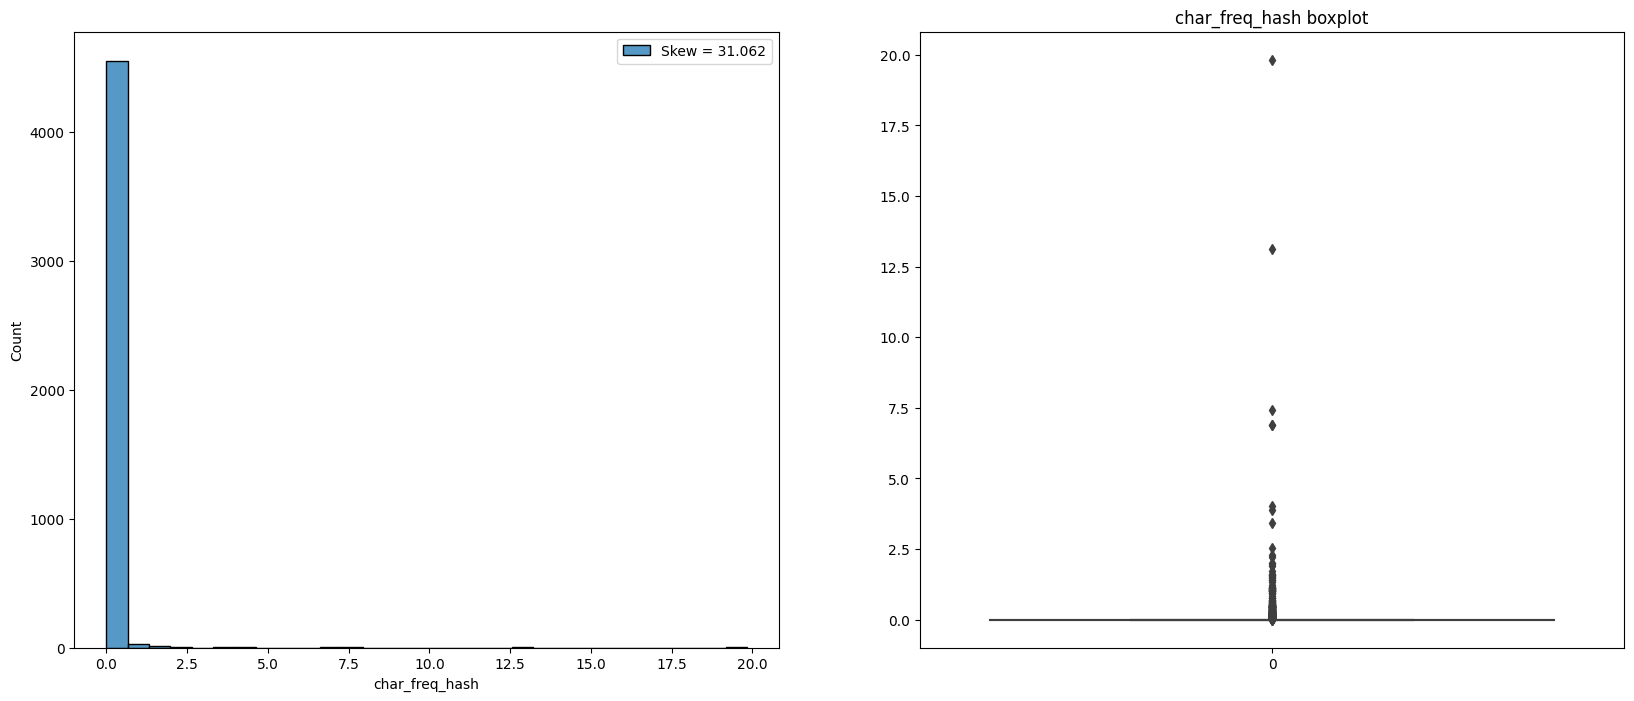

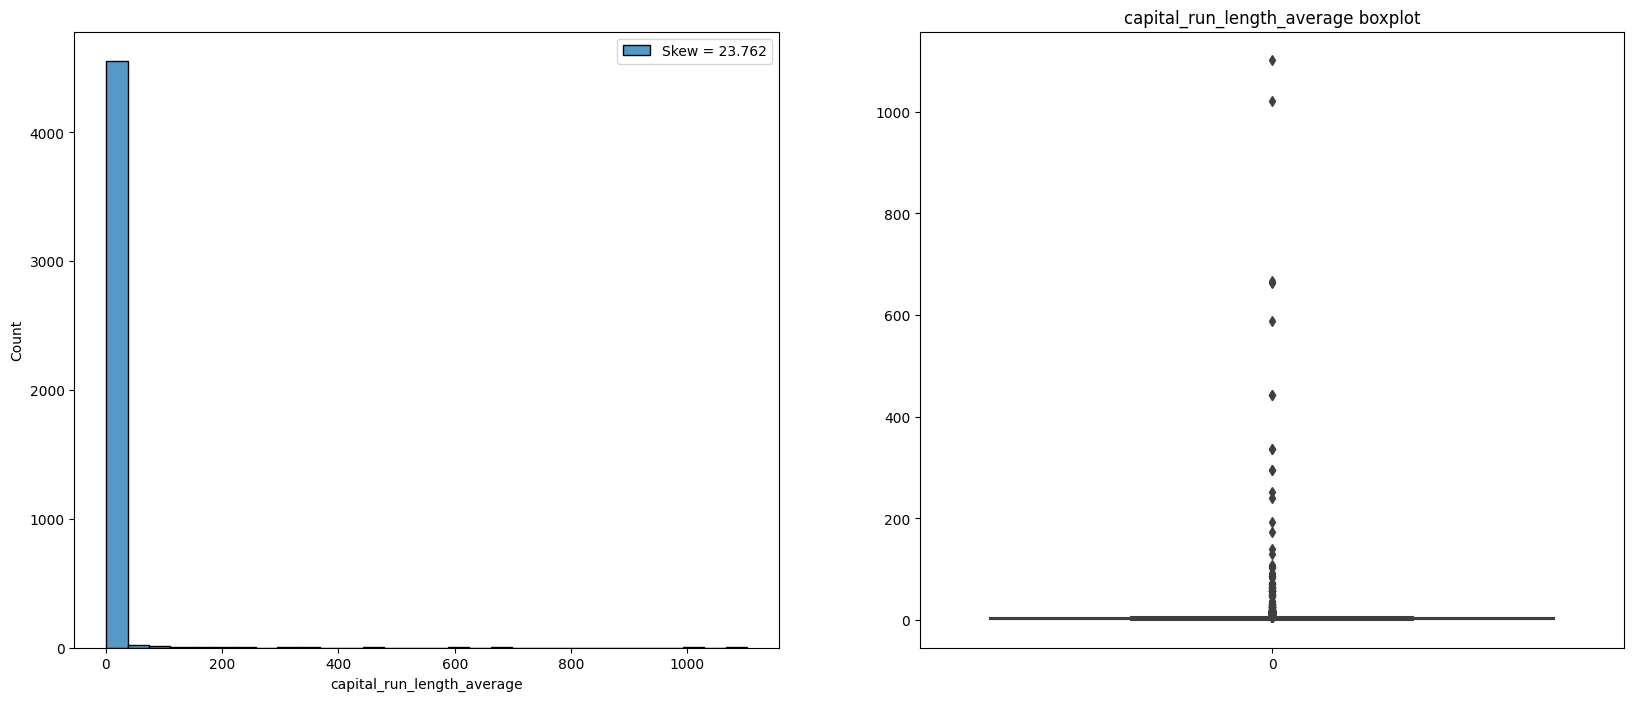

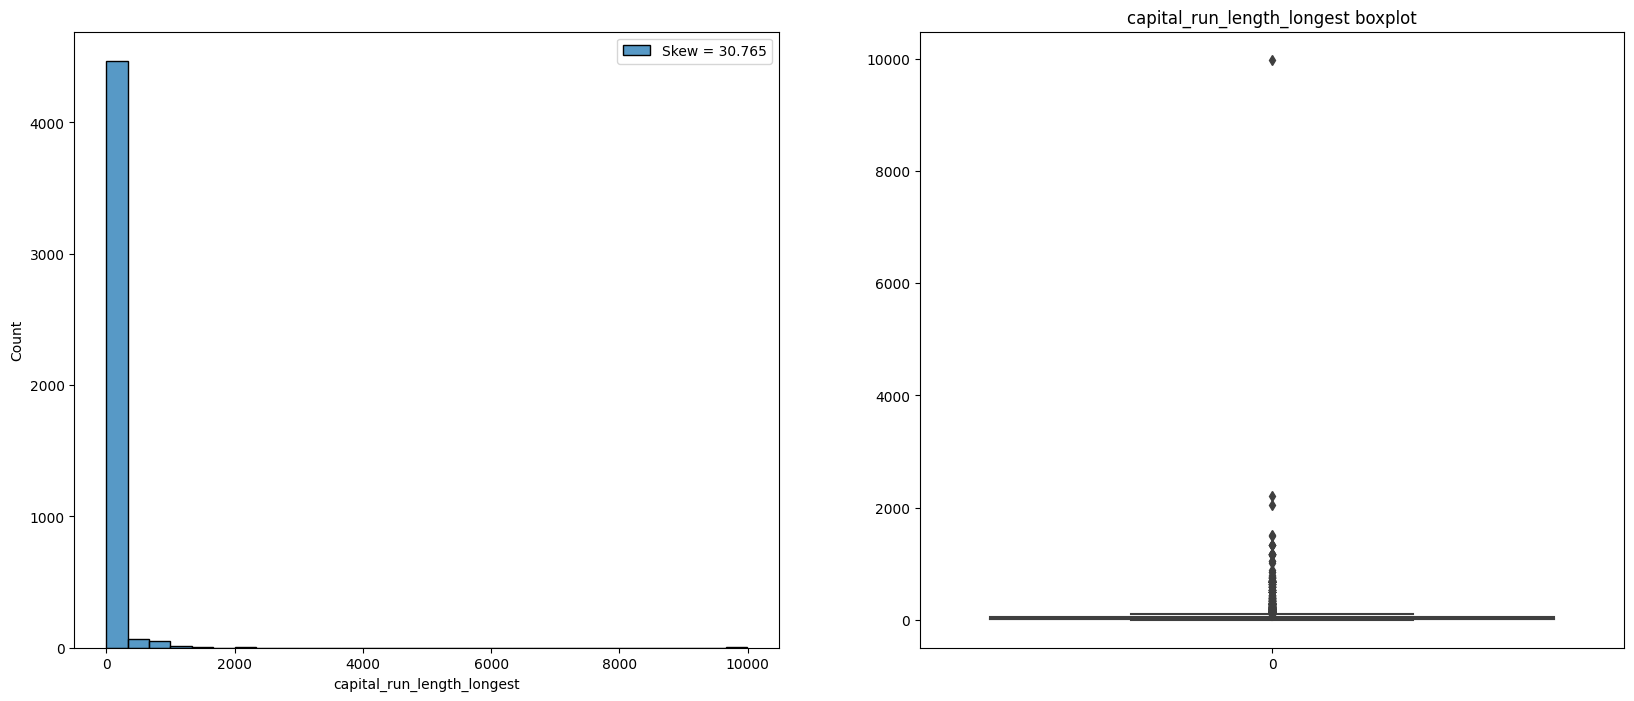

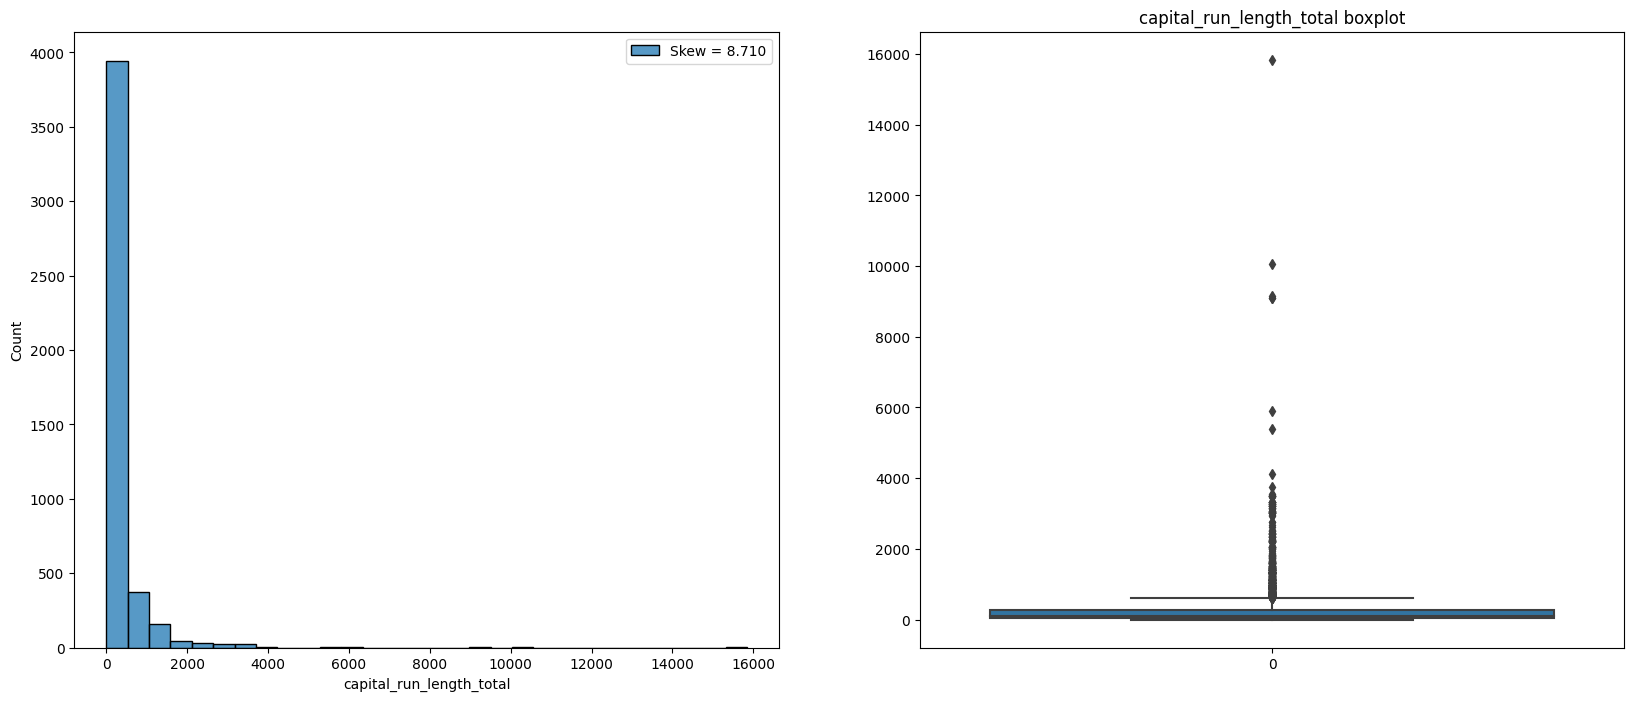

In [8]:
for feat in columns[:-1]:
  fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
  skew = df[feat].skew()
  sns.histplot(df[feat], kde=False, label=f"Skew = {skew:.3f}", bins=30, ax=ax1)
  ax1.legend(loc="best")
  sns.boxplot(df[feat], ax=ax2)
  ax2.set_title(f"{feat} boxplot")

In [9]:
X = df.drop('spam', axis=1).values
Y = df['spam'].values

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [ ]:
model = SGDClassifier(random_state=42)
model.fit(x_train_sc, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_preds = model.predict(x_test_sc)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       531
           1       0.88      0.84      0.86       390

    accuracy                           0.88       921
   macro avg       0.88      0.88      0.88       921
weighted avg       0.88      0.88      0.88       921



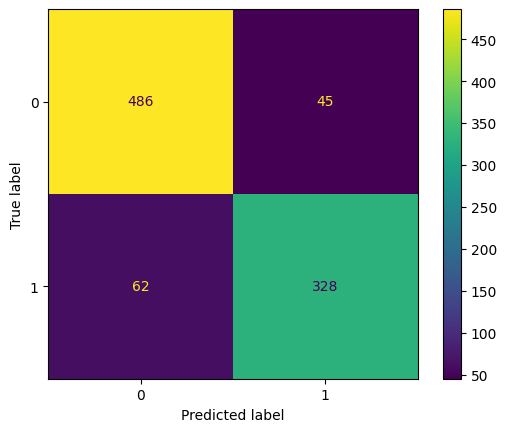

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## With PCA

In [ ]:
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

pca = PCA(random_state=42)

pca.fit(x_train_sc)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

pca_results = pd.DataFrame({
    "component": [i+1 for i in range(0, len(cum_var_exp))],
    "cumulative_variance": [var for var in cum_var_exp]
})

exp_var_threshold = 0.8

valid_pca_results = pca_results[pca_results['cumulative_variance'] > exp_var_threshold]

print(f"Components with cumulative variance over threshold of {exp_var_threshold}")
valid_pca_results.head()

Components with cumulative variance over threshold of 0.8


,component,cumulative_variance
34,35,0.810410
35,36,0.823572
36,37,0.836541
37,38,0.849194
38,39,0.861612


In [ ]:
n_components = int(valid_pca_results.iloc[0]["component"])
print(f"Selected components: {n_components}")

Selected components: 35


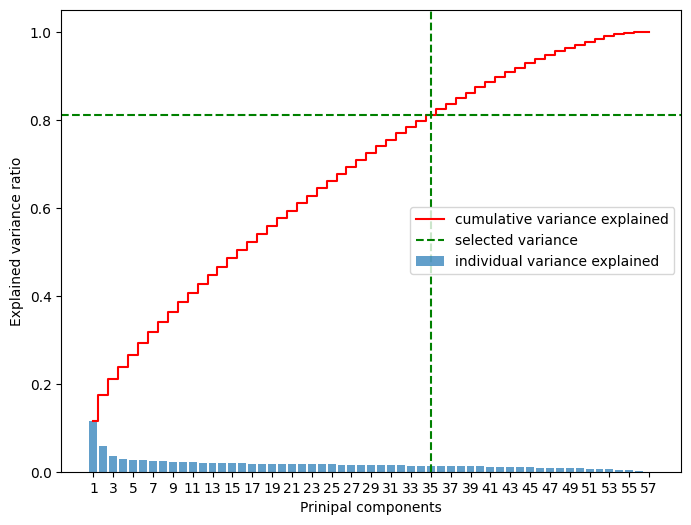

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cum_var_exp) + 1), var_exp, align="center", label="individual variance explained", alpha=0.7)
plt.step(range(1, len(cum_var_exp) + 1), cum_var_exp, where="mid", label="cumulative variance explained", color="red")
plt.ylabel("Explained variance ratio")
plt.xlabel("Prinipal components")
plt.xticks(np.arange(1, len(var_exp) + 1, 2))

plt.axhline(y=valid_pca_results.iloc[0]["cumulative_variance"], color='g', linestyle='--', label="selected variance")
plt.axvline(x=n_components, color='g', linestyle='--')

plt.legend(loc="center right")

plt.show()

In [ ]:
pca = PCA(n_components=n_components, random_state=42)
x_train_pca = pca.fit_transform(x_train_sc)
x_test_pca = pca.transform(x_test_sc)

In [ ]:
model = SGDClassifier(random_state=42)
model.fit(x_train_pca, y_train)

SGDClassifier(random_state=42)

In [ ]:
y_preds = model.predict(x_test_pca)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       531
           1       0.93      0.87      0.90       390

    accuracy                           0.92       921
   macro avg       0.92      0.91      0.92       921
weighted avg       0.92      0.92      0.92       921



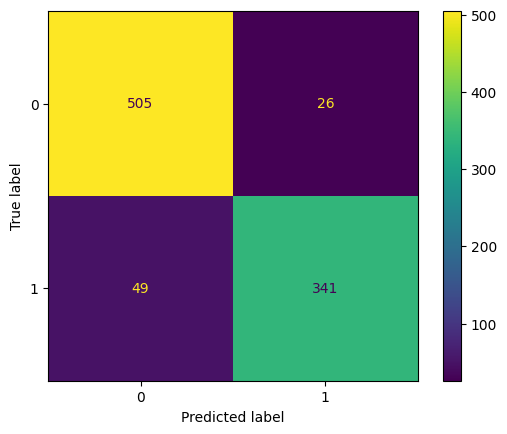

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## GridSearch and KFold

In [11]:
sc = StandardScaler()
pca = PCA(random_state=42)
model = SGDClassifier(loss='log_loss', learning_rate='constant', random_state=42)

steps = [
    ("scaler", sc),
    ("pca", pca),
    ("model", model)
]

pipe = Pipeline(steps)

folds = KFold(n_splits=5, shuffle=True, random_state=42)


params = {
    "pca__n_components": [30, 35, 40, 45],
    "model__alpha": [0.1, 1, 10, 100], # lmd
    "model__penalty": ["l1", "l2"],
    "model__eta0": [1e-4, 1e-3, 1e-2, 1e-1] #lr
}

In [12]:
search = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=folds,
    scoring="accuracy",
    verbose=3,
    return_train_score=True
  )

search.fit(x_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV 1/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=30;, score=(train=0.854, test=0.874) total time=   0.4s
[CV 2/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=30;, score=(train=0.856, test=0.857) total time=   0.2s
[CV 3/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=30;, score=(train=0.858, test=0.849) total time=   0.3s
[CV 4/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=30;, score=(train=0.862, test=0.838) total time=   0.3s
[CV 5/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=30;, score=(train=0.855, test=0.859) total time=   0.4s
[CV 1/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca__n_components=35;, score=(train=0.854, test=0.874) total time=   0.6s
[CV 2/5] END model__alpha=0.1, model__eta0=0.0001, model__penalty=l1, pca

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(random_state=42)),
                                       ('model',
                                        SGDClassifier(learning_rate='constant',
                                                      loss='log_loss',
                                                      random_state=42))]),
             param_grid={'model__alpha': [0.1, 1, 10, 100],
                         'model__eta0': [0.0001, 0.001, 0.01, 0.1],
                         'model__penalty': ['l1', 'l2'],
                         'pca__n_components': [30, 35, 40, 45]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [13]:
best_score = search.best_score_
best_params = search.best_params_

print(f"The highest test accuracy is {best_score} with {best_params} ")

The highest test accuracy is 0.8953804347826086 with {'model__alpha': 0.1, 'model__eta0': 0.0001, 'model__penalty': 'l2', 'pca__n_components': 40} 


In [14]:
sc = StandardScaler()
best_pca = PCA(n_components=best_params["pca__n_components"], random_state=42)
best_model = SGDClassifier(learning_rate="constant", eta0=best_params["model__eta0"], alpha=best_params["model__alpha"], penalty=best_params["model__penalty"], random_state=42)

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
joblib.dump(sc, 'scaler.joblib')

x_train_pca = best_pca.fit_transform(x_train_sc)
x_test_pca = best_pca.transform(x_test_sc)
joblib.dump(best_pca, 'best_pca.joblib')

best_model.fit(x_train_pca, y_train)
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [15]:
y_preds = best_model.predict(x_test_pca)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.91       531
           1       0.93      0.82      0.87       390

    accuracy                           0.90       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.90      0.90      0.90       921



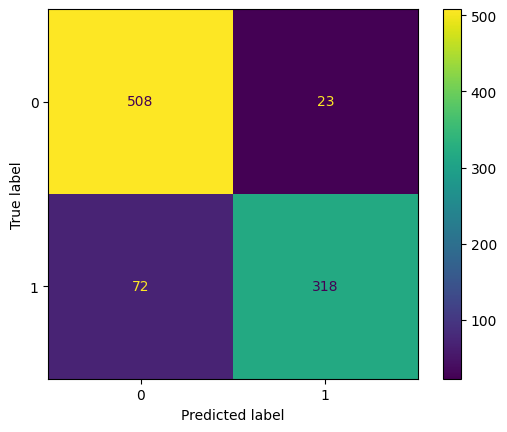

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

## Custom Logistic Regression

In [17]:
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)

class LogisticRegression:

  def __init__(self, learning_rate=1e-2, n_steps=200, n_features=1, lmd=1):
    self.n_features = n_features + 1
    self.learning_rate = learning_rate
    self.n_steps = n_steps
    self.theta = np.random.rand(self.n_features)
    self.lmd = lmd

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def fit(self, X, y, X_test, y_test):
    m = len(X)
    X = np.c_[np.ones(X.shape[0]), X]
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    cost_history = np.zeros(self.n_steps)
    cost_history_test = np.zeros(self.n_steps)

    for step in range(0, self.n_steps):
      preds = self.sigmoid(np.dot(X, self.theta))
      preds_test = self.sigmoid(np.dot(X_test, self.theta))

      for sample in range(0, m):
        old_theta = self.theta
        self.theta = old_theta - (self.learning_rate * (self.sigmoid(old_theta * X[sample]) - y[sample]) * X[sample])
        self.theta[1:] = self.theta[1:] - (self.learning_rate * self.lmd * old_theta[1:])

      cost_history[step] = - (1 / m) * (np.dot(y.T, np.log(preds)) + np.dot((1 - y).T, np.log(1 - preds))) + (self.lmd / (2*m)) * np.sum(np.square(self.theta[1:]))
      cost_history_test[step] = - (1 / m) * (np.dot(y_test.T, np.log(preds_test)) + np.dot((1 - y_test).T, np.log(1 - preds_test))) + (self.lmd / (2*m)) * np.sum(np.square(self.theta[1:]))

    return cost_history, cost_history_test

  def predict(self, X):
    Xpred = np.c_[np.ones(X.shape[0]), X]
    a = self.sigmoid(np.dot(Xpred, self.theta))
    return np.round(a)

In [18]:
sc = StandardScaler()
best_pca = PCA(n_components=best_params["pca__n_components"], random_state=42)

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

x_train_pca = best_pca.fit_transform(x_train_sc)
x_test_pca = best_pca.transform(x_test_sc)

model = LogisticRegression(learning_rate=best_params["model__eta0"], lmd=best_params["model__alpha"], n_features=x_train_pca.shape[1], n_steps=50)
cost_history, cost_history_test = model.fit(x_train_pca, y_train, x_test_pca, y_test)

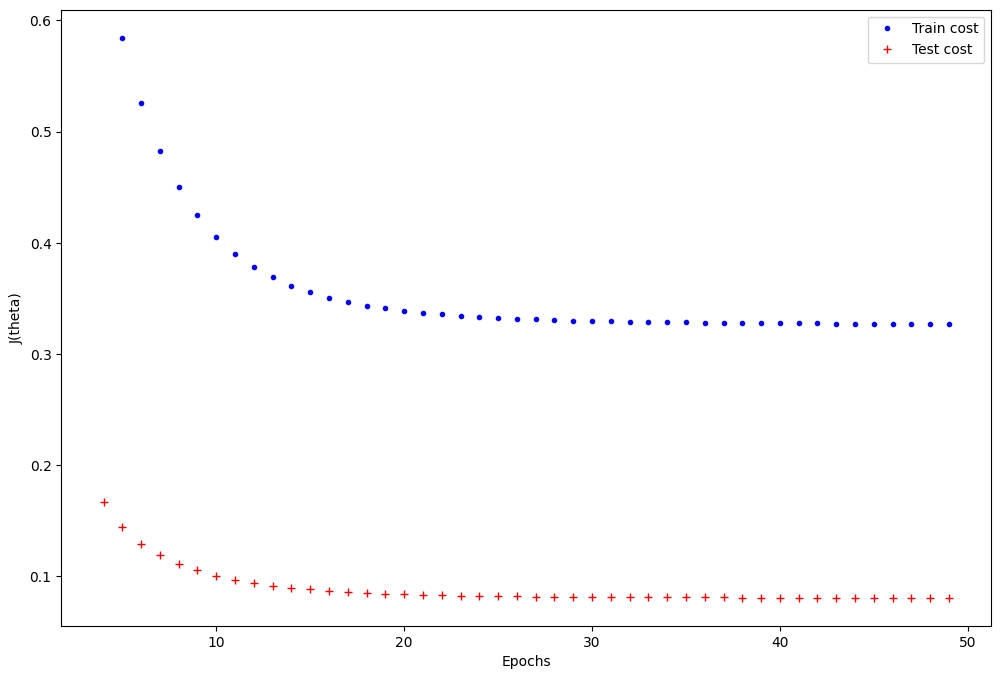

In [19]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Epochs')
c, = ax.plot(range(model.n_steps), cost_history, 'b.')
cv, = ax.plot(range(model.n_steps), cost_history_test, 'r+')
c.set_label('Train cost')
cv.set_label('Test cost')
ax.legend()

plt.show()

In [20]:
y_preds = model.predict(x_test_pca)
print(f"Classification Report:")
print(classification_report(y_test, y_preds))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       531
           1       0.91      0.84      0.87       390

    accuracy                           0.89       921
   macro avg       0.90      0.89      0.89       921
weighted avg       0.89      0.89      0.89       921



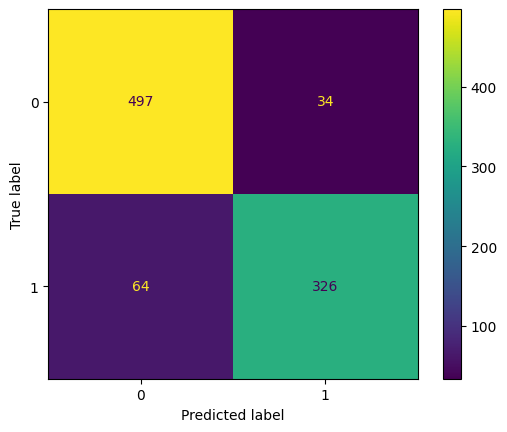

In [21]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)